# **Eurorepo.**
Información acerca de la documentación de incidentes de ciberseguridad en los que se comprometen infraestructuras críticas. Incluye detalles sobre ataques, como el tipo de ataque (secuestro de cuentas, robo de datos), las fechas de inicio y fin, las víctimas (empresas, individuos), y enlaces a fuentes que reportan el incidente.

## Importación de librerias.

In [4510]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import hashlib

# Ajustar configuraciones de Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Importación e información del dataframe.

In [4511]:
df = pd.read_csv("data\EUROREPO.csv", index_col=0)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\3684845054.py:1: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("data\EUROREPO.csv", index_col=0)


name                                        description start_date       end_date                                 inclusion_criteria                         inclusion_criteria_subcode               source_incident_detection_disclosure                      incident_type                                      receiver_name                                   receiver_country                                    receiver_region                                  receiver_category                          receiver_category_subcode                                     initiator_name initiator_country                                 initiator_category                         initiator_category_subcode  number_of_attributions                  attribution_ID                                   attribution_date                                   attribution_type                                  attribution_basis attributing_actor attribution_it_company attributing_country  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available  Attack conducted by non-state group / non-stat...                                                NaN                     Incident disclosed by attacker                         Disruption                                                NaN                                        Afghanistan                                        ASIA; SASIA                            Critical infrastructure                                             Health                                      Not available           Unknown                                    Non-state-group                                      Hacktivist(s)                     1.0                            8661                                                NaT  Self-attribution in the course of the attack (...                                  Attacker confirms               NaN          Not available                 NaN   
11                   Titan Rain  Titan Rain was the designation given by the fe...   1/1/2003  Not available  Attack conducted by non-state group / non-stat...  Attack conducted by a state-affiliated group (...  Incident disclosed by media (without further i...                         Data theft                                        None - None                      United States; United Kingdom      NATO; NORTHAM - EUROPE; NATO; EU(MS); NORTHEU  State institutions / political system; State i...  Government / ministries; Military; Defence ind...                                                NaN             China       Non-state actor, state-affiliation suggested                                                NaN                     2.0                          11; 12           2005-01-01 00:00:00; 2005-01-01 00:00:00  Anonymous statement in media report (e.g., Reu...  Attribution by receiver government / state ent...               NaN                    NaN                 NaN   
19  PoseidonGroup: The Boutique  Kaspersky 

In [4512]:
df.shape

(1215, 82)

In [4513]:
df.dtypes

name                         object
description                  object
start_date                   object
end_date                     object
inclusion_criteria           object
                             ...   
legal_response_indicator     object
casualties                  float64
sources_url                  object
added_to_DB                  object
updated_at                   object
Length: 82, dtype: object

In [4514]:
df.columns

Index(['name', 'description', 'start_date', 'end_date', 'inclusion_criteria', 'inclusion_criteria_subcode', 'source_incident_detection_disclosure', 'incident_type', 'receiver_name', 'receiver_country', 'receiver_region', 'receiver_category', 'receiver_category_subcode', 'initiator_name', 'initiator_country', 'initiator_category', 'initiator_category_subcode', 'number_of_attributions', 'attribution_ID', 'attribution_date', 'attribution_type', 'attribution_basis', 'attributing_actor', 'attribution_it_company', 'attributing_country', 'attributed_initiator', 'attributed_initiator_country', 'attributed_initiator_category', 'sources_attribution', 'cyber_conflict_issue', 'offline_conflict_issue', 'offline_conflict_issue_subcode', 'offline_conflict_intensity', 'offline_conflict_intensity_subcode', 'number_of_political_responses', 'political_response_date', 'political_response_type', 'political_response_type_subcode', 'political_response_country', 'political_response_actor', 'zero_days',
      

Este es un desglose de lo que trata cada columna del DataFrame.

1. **Name**: Nombre del incidente o evento relacionado.
2. **Description**: Descripción detallada del incidente o evento.
3. **Start date**: Fecha de inicio del incidente o conflicto.
4. **End date**: Fecha de finalización del incidente o conflicto (si aplica).
5. **Inclusion criteria**: Criterios utilizados para incluir el incidente en la base de datos.
6. **Inclusion criteria subcode**: Subcódigo que especifica los criterios de inclusión.
7. **Source incident detection disclosure**: Fuente de detección o divulgación del incidente.
8. **Incident type**: Tipo de incidente o ataque.
9. **Receiver name**: Nombre de la entidad que recibe o sufre el ataque.
10. **Receiver country**: País de la entidad que recibe el ataque.
11. **Receiver region**: Región geográfica del receptor del ataque.
12. **Receiver category**: Categoría de la entidad receptora del ataque.
13. **Receiver category subcode**: Subcódigo de la categoría de la entidad receptora.
14. **Initiator name**: Nombre de la entidad que inicia o perpetra el ataque.
15. **Initiator country**: País de la entidad iniciadora del ataque.
16. **Initiator category**: Categoría de la entidad iniciadora del ataque.
17. **Initiator category subcode**: Subcódigo de la categoría de la entidad iniciadora.
18. **Number of attributions**: Número de atribuciones o asignaciones del ataque a un actor.
19. **Attribution ID**: ID de la atribución del incidente.
20. **Attribution date**: Fecha en que se realizó la atribución del ataque.
21. **Attribution type**: Tipo de atribución realizada (e.g., política, técnica).
22. **Attribution basis**: Base sobre la cual se realizó la atribución (evidencia, análisis).
23. **Attributing actor**: Actor o entidad que hizo la atribución del incidente.
24. **Attribution it company**: Compañía tecnológica involucrada en la atribución del ataque.
25. **Attributing country**: País del actor que hizo la atribución del incidente.
26. **Attributed initiator**: Entidad a la que se le atribuye la autoría del ataque.
27. **Attributed initiator country**: País del iniciador atribuido.
28. **Attributed initiator category**: Categoría del iniciador atribuido.
29. **Sources attribution**: Fuentes que respaldan la atribución del ataque.
30. **Cyber conflict issue**: Temas o problemas relacionados con el conflicto cibernético.
31. **Offline conflict issue**: Temas o problemas del conflicto fuera del ciberespacio.
32. **Offline conflict issue subcode**: Subcódigo que detalla el problema de conflicto offline.
33. **Offline conflict intensity**: Intensidad del conflicto fuera del ciberespacio.
34. **Offline conflict intensity subcode**: Subcódigo para la intensidad del conflicto offline.
35. **Number of political responses**: Número de respuestas políticas al incidente.
36. **Political response date**: Fecha de la respuesta política.
37. **Political response type**: Tipo de respuesta política.
38. **Political response type subcode**: Subcódigo de la respuesta política.
39. **Political response country**: País que realizó la respuesta política.
40. **Political response actor**: Actor o entidad que realizó la respuesta política.
41. **Zero days**: Indicador de si se usó una vulnerabilidad "zero-day" (día cero) en el ataque.
42. **Zero days subcode**: Subcódigo relacionado con vulnerabilidades de día cero.
43. **MITRE initial access**: Técnica inicial de acceso según la clasificación MITRE ATT&CK.
44. **MITRE impact**: Impacto según la clasificación MITRE ATT&CK.
45. **User interaction**: Indicador de si hubo interacción con usuarios (p.ej., phishing).
46. **Has disruption**: Si el incidente provocó alguna interrupción o no.
47. **Data theft**: Indicador de si hubo robo de datos.
48. **disruption**: Detalle sobre la interrupción causada por el incidente.
49. **Hijacking**: Indicador de si hubo secuestro de sistemas o servicios.
50. **Physical effects spatial**: Efectos físicos a nivel espacial debido al incidente.
51. **Physical effects temporal**: Efectos físicos a nivel temporal causados por el incidente.
52. **Unweighted cyber intensity**: Intensidad cibernética sin ponderar.
53. **Target multiplier**: Multiplicador de objetivos afectados por el incidente.
54. **Weighted cyber intensity**: Intensidad cibernética ponderada.
55. **Impact indicator**: Indicador general del impacto del incidente.
56. **Impact indicator value**: Valor del indicador de impacto.
57. **Functional impact**: Impacto funcional causado por el incidente.
58. **Intelligence impact**: Impacto sobre la inteligencia o recolección de datos.
59. **Political impact affected entities**: Entidades afectadas por el impacto político.
60. **Political impact affected entities exact value**: Valor exacto de las entidades afectadas políticamente.
61. **Political impact third countries**: Terceros países afectados por el incidente.
62. **Political impact third countries exact value**: Valor exacto de terceros países afectados políticamente.
63. **Economic impact**: Impacto económico del incidente.
64. **Economic impact exact value**: Valor exacto del impacto económico.
65. **Economic impact currency**: Moneda utilizada para medir el impacto económico.
66. **State responsibility indicator**: Indicador de responsabilidad estatal en el incidente.
67. **IL breach indicator**: Indicador de si hubo una violación del derecho internacional.
68. **IL breach indicator subcode**: Subcódigo relacionado con la violación del derecho internacional.
69. **Evidence for sanctions indicator**: Indicador de evidencia que justifique sanciones.
70. **Number of legal responses**: Número de respuestas legales al incidente.
71. **Legal response date**: Fecha de las respuestas legales.
72. **Legal response type**: Tipo de respuesta legal.
73. **Legal response type subcode**: Subcódigo del tipo de respuesta legal.
74. **Legal response country**: País que realizó la respuesta legal.
75. **Legal response actor**: Actor o entidad que realizó la respuesta legal.
76. **Legal attribution reference**: Referencia a la atribución legal del ataque.
77. **Legal attribution reference subcode**: Subcódigo de la referencia de atribución legal.
78. **Legal Response Indicator**: Indicador de la existencia de una respuesta legal.
79. **Casualities**: Número de bajas o víctimas relacionadas con el incidente.
80. **Sources URL**: URLs o fuentes que documentan el incidente.
81. **Added to DB**: Fecha en que el incidente fue añadido a la base de datos.
82. **Updated at**: Fecha de la última actualización del registro en la base de datos.

Debemos de conocer bien esta diferencia para proseguir:
En este contexto, los términos **receiver**, **attribution**, y **attributed** se refieren a diferentes roles o aspectos dentro del ciclo de un incidente o ataque cibernético. Aquí está la explicación de cada uno:

1. **Receiver (Receptor)**:
- El **receiver** o receptor es la **entidad objetivo** del ataque. Este puede ser un país, una organización, una institución o un individuo que está en el lado que **recibe** el ataque o la amenaza cibernética.

2. **Attribution (Atribución)**:
- El término **attribution** hace referencia a la **identificación del autor o actor** que está detrás del ataque. En ciberseguridad, la atribución es el proceso de determinar quién o qué está detrás de una actividad maliciosa.

3. **Attributed (Atribuido)**:
- **Attributed** se refiere a la entidad que ha sido **acusada o identificada como responsable** del ataque. Es el actor, país, grupo o persona a quien se le asigna la responsabilidad del incidente.

**Resumen:**
- **Receiver** es quien **recibe** el ataque.
- **Attribution** es el **proceso de identificar** quién está detrás del ataque.
- **Attributed** se refiere a la **entidad acusada o identificada** como responsable del ataque.

### **Inclusion** e **Incident**.

In [4515]:
df_1 = df.filter(regex='^inclusion|incident', axis=1)
df_1

inclusion_criteria                         inclusion_criteria_subcode               source_incident_detection_disclosure                                      incident_type
ID                                                                                                                                                                                                              
8     Attack conducted by non-state group / non-stat...                                                NaN                     Incident disclosed by attacker                                         Disruption
11    Attack conducted by non-state group / non-stat...  Attack conducted by a state-affiliated group (...  Incident disclosed by media (without further i...                                         Data theft
19    Attack on (inter alia) political target(s), no...                                                NaN          Incident disclosed by IT-security company                  Data theft; Hijacking with Misuse
22    Attack conducted by nation state (generic “sta...                                                NaN  Incident disclosed by third-party-actor (e.g.,...                                         Data theft
25    Attack conducted by nation state (generic “sta...                                                NaN          Incident disclosed by IT-security company                                         Data theft
...                                                 ...                                                ...                                                ...                                                ...
3717        Attack on critical infrastructure target(s)                                                NaN                       Incident disclosed by victim                             Disruption; Ransomware
3719        Attack on critical infrastructure target(s)                                                NaN                     Incident disclosed by attacker  Data theft; Disruption; Hijacking with Misuse;...
3720        Attack on critical infrastructure target(s)                                                NaN                     Incident disclosed by attacker                              Hijacking with Misuse
3721        Attack on critical infrastructure target(s)                                                NaN          Incident disclosed by IT-security company                  Data theft; Hijacking with Misuse
3723        Attack on critical infrastructure target(s)                                                NaN                       Incident disclosed by victim                           Hijacking without Misuse

[1215 rows x 4 columns]

In [4516]:
df_1.isnull().sum()

inclusion_criteria                        1
inclusion_criteria_subcode              959
source_incident_detection_disclosure     22
incident_type                             3
dtype: int64

In [4517]:
df.drop(['inclusion_criteria', 'inclusion_criteria_subcode'], axis=1, inplace=True)

In [4518]:
df.dropna(subset=['incident_type', 'source_incident_detection_disclosure'], inplace=True) #pocas filas con nulos.

### **Receiver.**

In [4519]:
df_1 = df.filter(regex='receiver', axis=1)
df_1

receiver_name                                   receiver_country                                    receiver_region                                  receiver_category                          receiver_category_subcode
ID                                                                                                                                                                                                                                                                 
8                                                   NaN                                        Afghanistan                                        ASIA; SASIA                            Critical infrastructure                                             Health
11                                          None - None                      United States; United Kingdom      NATO; NORTHAM - EUROPE; NATO; EU(MS); NORTHEU  State institutions / political system; State i...  Government / ministries; Military; Defence ind...
19       None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  NATO; NORTHAM - SOUTHAM - EUROPE; NATO; EU(MS)...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...
22                                                  NaN                                             Russia                          EUROPE; EASTEU; CSTO; SCO                            Critical infrastructure                                     Transportation
25    None - None - None - None - None - None - None...  United States; Canada; Korea, Republic of; Tai...  NATO; NORTHAM - NATO; NORTHAM - ASIA; SCS; NEA...  State institutions / political system; Interna...  Government / ministries; ; Energy; Telecommuni...
...                                                 ...                                                ...                                                ...                                                ...                                                ...
3717                                             Lagoon                                      New Caledonia                                                NaN                            Critical infrastructure                                 Telecommunications
3719                                  Hoerbiger Holding                                        Switzerland                                     EUROPE; WESTEU                            Critical infrastructure                             Critical Manufacturing
3720                                        McDonald’s                                       United States                                      NATO; NORTHAM                            Critical infrastructure                                               Food
3721      Not available - Not available - Not available             Not available; Canada; Europe (region)                                 - NATO; NORTHAM -       Unknown - Education - Critical infrastructure                                          -  - Food
3723  Sean "Dragoneer" Piche (Founder of Fur Affinit...                     United States; Global (region)                                   NATO; NORTHAM -   End user(s) / specially protected groups - Cri...                                 - Digital Provider

[1191 rows x 5 columns]

In [4520]:
df_1.isnull().sum()

receiver_name                183
receiver_country               1
receiver_region               69
receiver_category              0
receiver_category_subcode     11
dtype: int64

Optamos por eliminar la **región** ya que va a dividirse por continentes.

In [4521]:
df.drop(['receiver_region'], axis=1, inplace=True)

In [4522]:
df.dropna(subset=['receiver_country', 'receiver_category_subcode'], inplace=True) #pocas filas con nulos.

In [4523]:
df['receiver_name'].fillna('Unknown receiver', inplace=True)

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\990114460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['receiver_name'].fillna('Unknown receiver', inplace=True)


### **Initiator.**

In [4524]:
df_1 = df.filter(regex='^initiator', axis=1)
df_1

initiator_name initiator_country                                 initiator_category                         initiator_category_subcode
ID                                                                                                                                                                             
8                                         Not available           Unknown                                    Non-state-group                                      Hacktivist(s)
11                                                  NaN             China       Non-state actor, state-affiliation suggested                                                NaN
19                                       Poseidon Group            Brazil                                    Non-state-group  Private technology companies / hacking for hir...
22                                   NSA/Equation Group     United States                                              State                                                NaN
25    APT1/Comment Crew/Comment Panda/Byzantine Cand...      China; China  Non-state actor, state-affiliation suggested; ...                       ; Criminal(s); ; Criminal(s)
...                                                 ...               ...                                                ...                                                ...
3717                                      Not available     Not available                                      Not available                                                NaN
3719                  Akira Ransomware Group/Storm-1567     Not available                                    Non-state-group                                        Criminal(s)
3720                                      Not available     Not available                                      Not available                                                NaN
3721                                      Not available     Not available                                      Not available                                                NaN
3723                                      Not available     Not available                                      Not available                                                NaN

[1179 rows x 4 columns]

In [4525]:
df_1.isnull().sum()

initiator_name                108
initiator_country               1
initiator_category              1
initiator_category_subcode    731
dtype: int64

In [4526]:
df.drop(['initiator_category_subcode'], axis=1, inplace=True)

In [4527]:
df.dropna(subset=['initiator_country', 'initiator_category'], inplace=True) #pocas filas con nulos.

In [4528]:
df['initiator_name'].fillna('Unknown initiator', inplace=True)

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\3363404068.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['initiator_name'].fillna('Unknown initiator', inplace=True)


### **Attribution** y **Attributing**.

In [4529]:
df_1 = df.filter(regex='^attribut|number_of_attributions', axis=1)
df_1

number_of_attributions                  attribution_ID                                   attribution_date                                   attribution_type                                  attribution_basis       attributing_actor attribution_it_company attributing_country                               attributed_initiator                       attributed_initiator_country                      attributed_initiator_category
ID                                                                                                                                                                                                                                                                                                                                                                                                                                               
8                        1.0                            8661                                                NaT  Self-attribution in the course of the attack (...                                  Attacker confirms                     NaN          Not available                 NaN                                      Not available                                            Unknown                                    Non-state-group
11                       2.0                          11; 12           2005-01-01 00:00:00; 2005-01-01 00:00:00  Anonymous statement in media report (e.g., Reu...  Attribution by receiver government / state ent...                     NaN                    NaN                 NaN                                                NaN                                       China; China  Non-state actor, state-affiliation suggested; ...
19                       1.0                            6712                                                NaT  Technical report (e.g., by IT-companies, Citiz...          IT-security community attributes attacker                     NaN                    NaN                 NaN                                     Poseidon Group                                             Brazil                                    Non-state-group
22                       2.0                          27; 28           2013-01-01 00:00:00; 2013-01-01 00:00:00  Technical report (e.g., by IT-companies, Citiz...  Attribution by third-party; Media-based attrib...                     NaN                    NaN                 NaN             NSA/Equation Group; NSA/Equation Group                       United States; United States                                       State; State
25                       3.0  31; 31; 31; 31; 33; 33; 32; 32  2011-01-01 00:00:00; 2011-01-01 00:00:00; 2011...  Statement in media report and political statem...  IT-security community attributes attacker; IT-...          ; ; ; ; ; ; ;          ; ; ; ; ; ; ;       ; ; ; ; ; ; ;   APT1/Comment Crew/Comment Panda/Byzantine Cand...  China; China; China; China; China; China; Chin...  Non-state actor, state-affiliation suggested; ...
...                      ...                             ...                                                ...                                                ...                                                ...                     ...                    ...                 ...                                                ...                                                ...                                                ...
3717                     1.0                           20753                                                NaT                                      Not available                                      Not available           Not available          Not available       Not available                                      Not available                                      Not available                                      Not available
3719                     1.0                           20787                                     8/2

In [4530]:
df_1.isnull().sum()

number_of_attributions             0
attribution_ID                     0
attribution_date                   0
attribution_type                   0
attribution_basis                  1
attributing_actor                254
attribution_it_company           287
attributing_country              252
attributed_initiator             102
attributed_initiator_country       1
attributed_initiator_category      1
dtype: int64

In [4531]:
df.drop(['attribution_it_company'], axis=1, inplace=True)

In [4532]:
df.shape

(1178, 77)

In [4533]:
df.dropna(subset=['number_of_attributions', 'attribution_ID', 'attribution_date', 'attribution_type', 'attribution_basis'], inplace=True) #pocas filas con nulos.

A continuación, se eliminan las filas en las que más del 80% de los valores en estas columnas estén vacíos, garantizando que solo se conserven las filas con suficiente información relevante. Posteriormente, para las filas restantes, se tratan los valores nulos en todas las columnas del DataFrame: en las columnas numéricas, los valores nulos se reemplazan con la mediana, mientras que en las columnas categóricas se sustituyen por la moda (el valor más frecuente). Este enfoque asegura un conjunto de datos limpio y consistente para el análisis.

In [4534]:
columns_to_check = ['attributing_actor', 'attributing_country', 'attributed_initiator']

threshold = 0.8  # Porcentaje de nulos permitido
df = df[df[columns_to_check].isnull().mean(axis=1) < threshold]

In [4535]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Si es numérica
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
    else:  # Si es categórica u otro tipo
        mode_value = df[column].mode()[0]  # Primera moda
        df[column].fillna(mode_value, inplace=True)

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\1289223084.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\1289223084.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

### **Attributed**.

In [4536]:
df_1 = df.filter(regex='attributed|sources_attribution', axis=1)
df_1

attributed_initiator                       attributed_initiator_country                      attributed_initiator_category                                sources_attribution
ID                                                                                                                                                                                                              
8                                         Not available                                            Unknown                                    Non-state-group  https://www.dragos.com/year-in-review/#section...
19                                       Poseidon Group                                             Brazil                                    Non-state-group  https://www.dragos.com/year-in-review/#section...
22               NSA/Equation Group; NSA/Equation Group                       United States; United States                                       State; State  https://www.dragos.com/year-in-review/#section...
25    APT1/Comment Crew/Comment Panda/Byzantine Cand...  China; China; China; China; China; China; Chin...  Non-state actor, state-affiliation suggested; ...  https://eugene.kaspersky.com/2011/08/18/shady-...
26    APT10/Stone Panda/MenuPass Team/Cloud Hopper/R...                                       China; China  Non-state actor, state-affiliation suggested; ...  https://www.justice.gov/opa/press-release/file...
...                                                 ...                                                ...                                                ...                                                ...
3717                                      Not available                                      Not available                                      Not available  https://www.dragos.com/year-in-review/#section...
3719                  Akira Ransomware Group/Storm-1567                                      Not available                                    Non-state-group  https://www.security-incidents.de/assets/img/i...
3720                                      Not available                                      Not available                                      Not available  https://www.dragos.com/year-in-review/#section...
3721                                      Not available                                      Not available                                      Not available  https://www.dragos.com/year-in-review/#section...
3723                                      Not available                                      Not available                                      Not available  https://www.dragos.com/year-in-review/#section...

[1125 rows x 4 columns]

In [4537]:
df_1.isnull().sum()

attributed_initiator             0
attributed_initiator_country     0
attributed_initiator_category    0
sources_attribution              0
dtype: int64

In [4538]:
df.dropna(subset=['attributed_initiator', 'attributed_initiator_country', 'attributed_initiator_category', 'sources_attribution'], inplace=True)

### Conflict.

In [4539]:
df_1 = df.filter(regex='conflict', axis=1)
df_1

cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity offline_conflict_intensity_subcode
ID                                                                                                                                                                                  
8          System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                             HIIK 5
19                                   Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                             HIIK 5
22    System / ideology; International power                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                             HIIK 5
25                                   Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                             HIIK 5
26                       International power                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                             HIIK 5
...                                      ...                    ...                                                ...                        ...                                ...
3717                                 Unknown          Not available  Russia – Ukraine; Russia – Ukraine; Russia – U...              Not available                             HIIK 5
3719                                 Unknown          Not available  Russia – Ukraine; Russia – Ukraine; Russia – U...              Not available                             HIIK 5
3720                                 Unknown          Not available  Russia – Ukraine; Russia – Ukraine; Russia – U...              Not available                             HIIK 5
3721                                 Unknown          Not available  Russia – Ukraine; Russia – Ukraine; Russia – U...              Not available                             HIIK 5
3723                                 Unknown          Not available  Russia – Ukraine; Russia – Ukraine; Russia – U...              Not available                             HIIK 5

[1125 rows x 5 columns]

In [4540]:
df_1.isnull().sum()

cyber_conflict_issue                  0
offline_conflict_issue                0
offline_conflict_issue_subcode        0
offline_conflict_intensity            0
offline_conflict_intensity_subcode    0
dtype: int64

### **Political Response**.

In [4541]:
df_1 = df.filter(regex='political_response', axis=1)
df_1

number_of_political_responses political_response_date political_response_type political_response_type_subcode political_response_country political_response_actor
ID                                                                                                                                                                     
8                               0.0          1/26/2023 0:00           Not available               Awareness raising              Not available            Not available
19                              0.0          1/26/2023 0:00           Not available               Awareness raising              Not available            Not available
22                              0.0          1/26/2023 0:00           Not available               Awareness raising              Not available            Not available
25                              0.0          1/26/2023 0:00           Not available               Awareness raising              Not available            Not available
26                              0.0          1/26/2023 0:00           Not available               Awareness raising              Not available            Not available
...                             ...                     ...                     ...                             ...                        ...                      ...
3717                            0.0          1/26/2023 0:00           Not available               Awareness raising              Not available            Not available
3719                            0.0          1/26/2023 0:00           Not available               Awareness raising              Not available            Not available
3720                            0.0          1/26/2023 0:00           Not available               Awareness raising              Not available            Not available
3721                            0.0          1/26/2023 0:00           Not available               Awareness raising              Not available            Not available
3723                            0.0          1/26/2023 0:00           Not available               Awareness raising              Not available            Not available

[1125 rows x 6 columns]

In [4542]:
df_1.isnull().sum()

number_of_political_responses      0
political_response_date            0
political_response_type            0
political_response_type_subcode    0
political_response_country         0
political_response_actor           0
dtype: int64

### **Zero** y **MITRE**.

In [4543]:
df_1 = df.filter(regex='zero|MITRE', axis=1)
df_1

zero_days zero_days_subcode MITRE_initial_access       MITRE_impact
ID                                                                      
8           No               One        Not available  Data Exfiltration
19          No               One        Not available  Data Exfiltration
22          No               One        Not available  Data Exfiltration
25          No               One        Not available  Data Exfiltration
26          No               One        Not available  Data Exfiltration
...        ...               ...                  ...                ...
3717        No               One        Not available  Data Exfiltration
3719        No               One        Not available  Data Exfiltration
3720        No               One        Not available  Data Exfiltration
3721        No               One        Not available  Data Exfiltration
3723        No               One        Not available  Data Exfiltration

[1125 rows x 4 columns]

In [4544]:
df_1.isnull().sum()

zero_days               0
zero_days_subcode       0
MITRE_initial_access    0
MITRE_impact            0
dtype: int64

In [4545]:
df.drop(['zero_days_subcode'], axis=1, inplace=True)

### **User interaction**, **Disruption**, **Data theft**, **Hijacking**.

In [4546]:
df_1 = df.filter(regex='user|disruption|data|hijacking', axis=1)
df_1

user_interaction has_disruption                                         data_theft                                         disruption                                          hijacking
ID                                                                                                                                                                                           
8       Not available           True                                               none  Short-term disruption (< 24h; incident scores ...                                               none
19      Not available          False  For private / commercial targets: sensitive in...                                               none  Hijacking, system misuse, e.g., through data t...
22      Not available          False  For private / commercial targets: sensitive in...                                               none                                               none
25      Not available          False  For private / commercial targets: sensitive in...                                               none                                               none
26      Not available          False  For private / commercial targets: sensitive in...                                               none                                               none
...               ...            ...                                                ...                                                ...                                                ...
3717    Not available          False                                      Not available                                      Not available  Hijacking, system misuse, e.g., through data t...
3719    Not available          False                                      Not available                                      Not available  Hijacking, system misuse, e.g., through data t...
3720    Not available          False                                      Not available                                      Not available  Hijacking, system misuse, e.g., through data t...
3721    Not available          False                                      Not available                                      Not available  Hijacking, system misuse, e.g., through data t...
3723    Not available          False                                      Not available                                      Not available  Hijacking, system misuse, e.g., through data t...

[1125 rows x 5 columns]

In [4547]:
df_1.describe()

user_interaction has_disruption     data_theft     disruption                                          hijacking
count              1125           1125           1125           1125                                               1125
unique                2              2              7              6                                                  5
top       Not available          False  Not available  Not available  Hijacking, system misuse, e.g., through data t...
freq               1116            704            506            515                                                813

In [4548]:
df_1.isnull().sum()

user_interaction    0
has_disruption      0
data_theft          0
disruption          0
hijacking           0
dtype: int64

### **Physical**, **Un-Weighted** y **Target Multiplier**.

In [4549]:
df_1 = df.filter(regex='physical|weigh|target', axis=1)
df_1

physical_effects_spatial physical_effects_temporal  unweighted_cyber_intensity                     target_multiplier  weighted_cyber_intensity
ID                                                                                                                                                 
8                        none                      none                         1.0  Moderate - high political importance                       1.0
19                       none                      none                         4.0  Moderate - high political importance                       4.0
22                       none                      none                         2.0  Moderate - high political importance                       2.0
25                       none                      none                         2.0  Moderate - high political importance                       2.0
26                       none                      none                         2.0  Moderate - high political importance                       2.0
...                       ...                       ...                         ...                                   ...                       ...
3717                     none                      none                         0.0  Moderate - high political importance                       3.0
3719                     none                      none                         0.0  Moderate - high political importance                       3.0
3720                     none                      none                         0.0  Moderate - high political importance                       3.0
3721                     none                      none                         0.0  Moderate - high political importance                       3.0
3723                     none                      none                         0.0  Moderate - high political importance                       3.0

[1125 rows x 5 columns]

In [4550]:
df_1.describe(include='all')

C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


physical_effects_spatial physical_effects_temporal  unweighted_cyber_intensity                     target_multiplier  weighted_cyber_intensity
count                      1125                      1125                 1125.000000                                  1125               1125.000000
unique                        5                         5                         NaN                                     5                       NaN
top                        none                      none                         NaN  Moderate - high political importance                       NaN
freq                       1104                      1105                         NaN                                  1093                       NaN
mean                        NaN                       NaN                    2.641778                                   NaN                  2.922667
std                         NaN                       NaN                    1.544315                                   NaN                  1.424329
min                         NaN                       NaN                    0.000000                                   NaN                  0.000000
25%                         NaN                       NaN                    1.000000                                   NaN                  2.000000
50%                         NaN                       NaN                    3.000000                                   NaN                  3.000000
75%                         NaN                       NaN                    4.000000                                   NaN                  4.000000
max                         NaN                       NaN                    7.000000                                   NaN                 11.000000

In [4551]:
df_1.isnull().sum()

physical_effects_spatial      0
physical_effects_temporal     0
unweighted_cyber_intensity    0
target_multiplier             0
weighted_cyber_intensity      0
dtype: int64

### **Impact**.

In [4552]:
df_1 = df.filter(regex='^impact|functional|intelligence', axis=1)
df_1

impact_indicator  impact_indicator_value                  functional_impact                                intelligence_impact
ID                                                                                                                                 
8                 Low                     0.0  No system interference/disruption  No data breach/exfiltration or data corruption...
19                Low                     0.0  No system interference/disruption  No data breach/exfiltration or data corruption...
22                Low                     6.0  No system interference/disruption  No data breach/exfiltration or data corruption...
25                Low                     6.0  No system interference/disruption  No data breach/exfiltration or data corruption...
26                Low                     0.0  No system interference/disruption  No data breach/exfiltration or data corruption...
...               ...                     ...                                ...                                                ...
3717    Not available                     0.0  No system interference/disruption  No data breach/exfiltration or data corruption...
3719    Not available                     0.0  No system interference/disruption  No data breach/exfiltration or data corruption...
3720    Not available                     0.0  No system interference/disruption  No data breach/exfiltration or data corruption...
3721    Not available                     0.0  No system interference/disruption  No data breach/exfiltration or data corruption...
3723    Not available                     0.0  No system interference/disruption  No data breach/exfiltration or data corruption...

[1125 rows x 4 columns]

In [4553]:
df_1.describe(include='all')

impact_indicator  impact_indicator_value                  functional_impact                                intelligence_impact
count              1125             1125.000000                               1125                                               1125
unique                4                     NaN                                  6                                                  6
top                 Low                     NaN  No system interference/disruption  No data breach/exfiltration or data corruption...
freq                715                     NaN                                790                                                797
mean                NaN                4.768000                                NaN                                                NaN
std                 NaN                3.372546                                NaN                                                NaN
min                 NaN                0.000000                                NaN                                                NaN
25%                 NaN                0.000000                                NaN                                                NaN
50%                 NaN                6.000000                                NaN                                                NaN
75%                 NaN                7.000000                                NaN                                                NaN
max                 NaN               14.000000                                NaN                                                NaN

In [4554]:
df_1.isnull().sum()

impact_indicator          0
impact_indicator_value    0
functional_impact         0
intelligence_impact       0
dtype: int64

### **Political Impact**.

In [4555]:
df_1 = df.filter(regex='political_impact', axis=1)
df_1

political_impact_affected_entities  political_impact_affected_entities_exact_value political_impact_third_countries  political_impact_third_countries_exact_value
ID                                                                                                                                                                    
8                                10-Jan                                             0.0                           10-Jan                                           0.0
19                               10-Jan                                             0.0                           10-Jan                                           0.0
22                               10-Jan                                             1.0                           10-Jan                                           0.0
25                               10-Jan                                             1.0                           10-Jan                                           0.0
26                               10-Jan                                             0.0                           10-Jan                                           0.0
...                                 ...                                             ...                              ...                                           ...
3717                             10-Jan                                             0.0                           10-Jan                                           0.0
3719                             10-Jan                                             0.0                           10-Jan                                           0.0
3720                             10-Jan                                             0.0                           10-Jan                                           0.0
3721                             10-Jan                                             0.0                           10-Jan                                           0.0
3723                             10-Jan                                             0.0                           10-Jan                                           0.0

[1125 rows x 4 columns]

In [4556]:
df_1.isnull().sum()

political_impact_affected_entities                0
political_impact_affected_entities_exact_value    0
political_impact_third_countries                  0
political_impact_third_countries_exact_value      0
dtype: int64

### **Economic**, **State Responsability**, **IL**, **Evidence**.

In [4557]:
df_1 = df.filter(regex='economic|IL|evidence|state', axis=1)
df_1

economic_impact  economic_impact_exact_value economic_impact_currency state_responsibility_indicator        IL_breach_indicator IL_breach_indicator_subcode evidence_for_sanctions_indicator
ID                                                                                                                                                                                               
8      Not available                          0.0                     euro                  Not available  Human rights; Sovereignty  Civic / political rights;                     Not available
19     Not available                          0.0                     euro                  Not available  Human rights; Sovereignty  Civic / political rights;                     Not available
22     Not available                          0.0                     euro                  Not available  Human rights; Sovereignty  Civic / political rights;                     Not available
25     Not available                          0.0                     euro                  Not available  Human rights; Sovereignty  Civic / political rights;                     Not available
26     Not available                          0.0                     euro                  Not available  Human rights; Sovereignty  Civic / political rights;                     Not available
...              ...                          ...                      ...                            ...                        ...                         ...                              ...
3717   Not available                          0.0                     euro                  Not available  Human rights; Sovereignty  Civic / political rights;                     Not available
3719   Not available                          0.0                     euro                  Not available  Human rights; Sovereignty  Civic / political rights;                     Not available
3720   Not available                          0.0                     euro                  Not available  Human rights; Sovereignty  Civic / political rights;                     Not available
3721   Not available                          0.0                     euro                  Not available  Human rights; Sovereignty  Civic / political rights;                     Not available
3723   Not available                          0.0                     euro                  Not available  Human rights; Sovereignty  Civic / political rights;                     Not available

[1125 rows x 7 columns]

In [4558]:
df_1.isnull().sum()

economic_impact                     0
economic_impact_exact_value         0
economic_impact_currency            0
state_responsibility_indicator      0
IL_breach_indicator                 0
IL_breach_indicator_subcode         0
evidence_for_sanctions_indicator    0
dtype: int64

In [4559]:
df_1.describe(include='all')

economic_impact  economic_impact_exact_value economic_impact_currency state_responsibility_indicator        IL_breach_indicator IL_breach_indicator_subcode evidence_for_sanctions_indicator
count             1125                 1.125000e+03                     1125                           1125                       1125                        1125                             1125
unique               3                          NaN                        2                              4                         64                          52                                3
top      Not available                          NaN                     euro                  Not available  Human rights; Sovereignty  Civic / political rights;                     Not available
freq              1101                          NaN                     1086                            767                        615                         835                             1123
mean               NaN                 1.636862e+06                      NaN                            NaN                        NaN                         NaN                              NaN
std                NaN                 2.745501e+07                      NaN                            NaN                        NaN                         NaN                              NaN
min                NaN                 0.000000e+00                      NaN                            NaN                        NaN                         NaN                              NaN
25%                NaN                 0.000000e+00                      NaN                            NaN                        NaN                         NaN                              NaN
50%                NaN                 0.000000e+00                      NaN                            NaN                        NaN                         NaN                              NaN
75%                NaN                 0.000000e+00                      NaN                            NaN                        NaN                         NaN                              NaN
max                NaN                 8.720000e+08                      NaN                            NaN                        NaN                         NaN                              NaN

### **Legal**.

In [4560]:
df_1 = df.filter(regex='legal', axis=1)
df_1

number_of_legal_responses legal_response_date legal_response_type legal_response_type_subcode legal_response_country legal_response_actor legal_attribution_reference legal_attribution_reference_subcode                           legal_response_indicator
ID                                                                                                                                                                                                                                                                
8                           0.0      12/1/2023 0:00       Not available                        ; ;           Not available        Not available               Not available            Civic / political rights  Unfriendly acts/retorsions justified (missing ...
19                          0.0      12/1/2023 0:00       Not available                        ; ;           Not available        Not available               Not available            Civic / political rights  Unfriendly acts/retorsions justified (missing ...
22                          0.0      12/1/2023 0:00       Not available                        ; ;           Not available        Not available               Not available            Civic / political rights  Unfriendly acts/retorsions justified (missing ...
25                          0.0      12/1/2023 0:00       Not available                        ; ;           Not available        Not available               Not available            Civic / political rights  Unfriendly acts/retorsions justified (missing ...
26                          0.0      12/1/2023 0:00       Not available                        ; ;           Not available        Not available               Not available            Civic / political rights  Unfriendly acts/retorsions justified (missing ...
...                         ...                 ...                 ...                         ...                    ...                  ...                         ...                                 ...                                                ...
3717                        0.0      12/1/2023 0:00       Not available                        ; ;           Not available        Not available               Not available            Civic / political rights  Unfriendly acts/retorsions justified (missing ...
3719                        0.0      12/1/2023 0:00       Not available                        ; ;           Not available        Not available               Not available            Civic / political rights  Unfriendly acts/retorsions justified (missing ...
3720                        0.0      12/1/2023 0:00       Not available                        ; ;           Not available        Not available               Not available            Civic / political rights  Unfriendly acts/retorsions justified (missing ...
3721                        0.0      12/1/2023 0:00       Not available                        ; ;           Not available        Not available               Not available            Civic / political rights  Unfriendly acts/retorsions justified (missing ...
3723                        0.0      12/1/2023 0:00       Not available                        ; ;           Not available        Not available               Not available            Civic / political rights  Unfriendly acts/retorsions justified (missing ...

[1125 rows x 9 columns]

In [4561]:
df_1.isnull().sum()

number_of_legal_responses              0
legal_response_date                    0
legal_response_type                    0
legal_response_type_subcode            0
legal_response_country                 0
legal_response_actor                   0
legal_attribution_reference            0
legal_attribution_reference_subcode    0
legal_response_indicator               0
dtype: int64

In [4562]:
df_1.describe(include='all')

number_of_legal_responses legal_response_date legal_response_type legal_response_type_subcode legal_response_country legal_response_actor legal_attribution_reference legal_attribution_reference_subcode                           legal_response_indicator
count                 1125.000000                1125                1125                        1125                   1125                 1125                        1125                                1125                                               1125
unique                        NaN                 111                  13                           8                     43                   77                          10                                   4                                                  4
top                           NaN      12/1/2023 0:00       Not available                        ; ;           Not available        Not available               Not available            Civic / political rights  Unfriendly acts/retorsions justified (missing ...
freq                          NaN                 995                 985                        1114                    986                 1026                        1094                                1122                                                939
mean                     0.137778                 NaN                 NaN                         NaN                    NaN                  NaN                         NaN                                 NaN                                                NaN
std                      0.408587                 NaN                 NaN                         NaN                    NaN                  NaN                         NaN                                 NaN                                                NaN
min                      0.000000                 NaN                 NaN                         NaN                    NaN                  NaN                         NaN                                 NaN                                                NaN
25%                      0.000000                 NaN                 NaN                         NaN                    NaN                  NaN                         NaN                                 NaN                                                NaN
50%                      0.000000                 NaN                 NaN                         NaN                    NaN                  NaN                         NaN                                 NaN                                                NaN
75%                      0.000000                 NaN                 NaN                         NaN                    NaN                  NaN                         NaN                                 NaN                                                NaN
max                      3.000000                 NaN                 NaN                         NaN                    NaN                  NaN                         NaN                                 NaN                                                NaN

### Resto de columnas.

In [4563]:
df_1 = df.iloc[:, -4:]
df_1

casualties                                        sources_url added_to_DB  updated_at
ID                                                                                         
8            NaN  https://books.google.de/books?id=WfIFiEs0HQ8C&...   8/15/2022   3/13/2023
19           NaN  https://securelist.com/poseidon-group-a-target...   8/15/2022   7/16/2024
22           NaN  https://www.dragos.com/year-in-review/#section...   8/15/2022   3/13/2024
25           NaN  https://web.archive.org/web/20110804083836/htt...   8/15/2022   4/23/2024
26           NaN  https://www.wired.com/story/doj-indictment-chi...   8/15/2022  10/26/2023
...          ...                                                ...         ...         ...
3717         NaN  https://www.zataz.com/cyberattaque-en-caledoni...   8/22/2024   8/22/2024
3719         NaN  https://www.inside-it.ch/schweizer-industrieko...   8/23/2024   8/23/2024
3720         NaN  https://www.finansgundem.com/haber/hackerlar-m...   8/23/2024   8/23/2024
3721         NaN  https://www.malwarebytes.com/blog/cybercrime/2...   8/23/2024   8/23/2024
3723         NaN  https://hackread.com/fur-affinity-website-hack...   8/23/2024   8/25/2024

[1125 rows x 4 columns]

In [4564]:
df_1.isnull().sum()

casualties     1125
sources_url       0
added_to_DB       0
updated_at        0
dtype: int64

In [4565]:
df.dropna(subset=['sources_url'], inplace=True) #pocas filas con nulos.

Eliminamos estas ya que una de ellas tiene todo valores nulos. En el caso de las otras, son fechas que no interesan y no proporcionan información relevante.

In [4566]:
df.drop(['added_to_DB','casualties', 'updated_at'], axis=1, inplace=True)

In [4567]:
df.head()

name                                        description start_date       end_date               source_incident_detection_disclosure                      incident_type                                      receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode                                     initiator_name initiator_country                                 initiator_category  number_of_attributions                  attribution_ID                                   attribution_date                                   attribution_type                                  attribution_basis attributing_actor attributing_country                               attributed_initiator                       attributed_initiator_country                      attributed_initiator_category                                sources_attribution  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
8            Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                     Incident disclosed by attacker                         Disruption                                   Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health                                      Not available           Unknown                                    Non-state-group                     1.0                            8661                                                NaT  Self-attribution in the course of the attack (...                                  Attacker confirms     Not available       Not available                                      Not available                                            Unknown                                    Non-state-group  https://www.dragos.com/year-in-review/#section...   
19       PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available          Incident disclosed by IT-security company  Data theft; Hijacking with Misuse     None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...                                     Poseidon Group            Brazil                                    Non-state-group                     1.0                            6712                                                NaT  Technical report (e.g., by IT-companies, Citiz...          IT-security community attributes attacker     Not available       Not available                                     Poseidon Group                                             Brazil                                    Non-state-group  https://www.dragos.com/year-in-review/#section...   
22                  NSA vs. Aeroflot        The NSA hacked the Russian airline Aeroflot   1/1/2006  Not available  Incid

## Limpieza de datos.

**Extracción correcta de las URLs.**

In [4568]:
urls = ['sources_url', 'sources_attribution']

In [4569]:
for i in urls:
    df[i] = df[i].str.extract(r'(?<=//)(.*?)(?=/)')
    df[i] = df[i].str.replace(r'^www\.', '', regex=True)
    df[i] = df[i].str.replace(r'\.[a-z]{2,3}$', '', regex=True)

### Manejo de filas duplicadas.
En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [4570]:
df.duplicated().sum() # Columnas duplicadas

np.int64(0)

In [4571]:
df.drop_duplicates(inplace = True)

In [4572]:
df.shape

(1125, 73)

### Selección de variables categóricas y continuas.
Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [4573]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if len(df[i].unique()) > 25:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: name, description, start_date, end_date, incident_type, receiver_name, receiver_country, receiver_category, receiver_category_subcode, initiator_name, initiator_country, initiator_category, attribution_ID, attribution_date, attribution_type, attribution_basis, attributing_actor, attributing_country, attributed_initiator, attributed_initiator_country, attributed_initiator_category, sources_attribution, cyber_conflict_issue, offline_conflict_issue, offline_conflict_issue_subcode, political_response_date, political_response_type_subcode, political_response_country, political_response_actor, MITRE_initial_access, MITRE_impact, political_impact_affected_entities_exact_value, economic_impact_exact_value, IL_breach_indicator, IL_breach_indicator_subcode, legal_response_date, legal_response_country, legal_response_actor, sources_url
Variables categóricas: source_incident_detection_disclosure, number_of_attributions, offline_conflict_intensity, offline_conflict_intensity_su

#### Tratamiento de variables categóricas.
Para el posterior modelo de clasificación, necesitamos codificar nuestras variables. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [4574]:
df[v_categoricas].nunique()

source_incident_detection_disclosure            25
number_of_attributions                           9
offline_conflict_intensity                       4
offline_conflict_intensity_subcode               5
number_of_political_responses                    8
political_response_type                         25
zero_days                                        5
user_interaction                                 2
has_disruption                                   2
data_theft                                       7
disruption                                       6
hijacking                                        5
physical_effects_spatial                         5
physical_effects_temporal                        5
unweighted_cyber_intensity                       8
target_multiplier                                5
weighted_cyber_intensity                        11
impact_indicator                                 4
impact_indicator_value                          15
functional_impact              

In [4575]:
# Filtrar variables categoricas que son de tipo object
categoricas_object = [col for col in v_categoricas if df[col].dtype == 'object']

df[categoricas_object].nunique()

source_incident_detection_disclosure    25
offline_conflict_intensity               4
offline_conflict_intensity_subcode       5
political_response_type                 25
zero_days                                5
user_interaction                         2
has_disruption                           2
data_theft                               7
disruption                               6
hijacking                                5
physical_effects_spatial                 5
physical_effects_temporal                5
target_multiplier                        5
impact_indicator                         4
functional_impact                        6
intelligence_impact                      6
political_impact_affected_entities       6
political_impact_third_countries         4
economic_impact                          3
economic_impact_currency                 2
state_responsibility_indicator           4
evidence_for_sanctions_indicator         3
legal_response_type                     13
legal_respo

##### **Source Incident Detection Disclosure.**

In [4576]:
df['source_incident_detection_disclosure'].unique()

array(['Incident disclosed by attacker',
       'Incident disclosed by IT-security company',
       'Incident disclosed by third-party-actor (e.g., Citizen Lab, Amnesty International, whistleblowers) or authorities of another state',
       'Incident disclosed by authorities of victim state',
       'Incident disclosed by victim',
       'Incident disclosed by media (without further information on source); Incident disclosed by authorities of victim state',
       'Incident disclosed by IT-security company; Incident disclosed by third-party-actor (e.g., Citizen Lab, Amnesty International, whistleblowers) or authorities of another state',
       'Incident disclosed by media (without further information on source)',
       'Incident disclosed by media (without further information on source); Incident disclosed by IT-security company',
       'Incident disclosed by IT-security company; Incident disclosed by attacker; Incident disclosed by authorities of victim state',
       'Incident dis

In [4577]:
df['source_incident_detection_disclosure'] = (
    df['source_incident_detection_disclosure']
    .str.replace('Incident disclosed by ', '', regex=True)
    .str.replace(';', ',', regex=True)
)

Al tener le Dataframe muchas columnas, no es óptimo el uso del **One-Hot Encoding**. Para abordar este problema, se utiliza **Hash Encoding**. En lugar de crear una columna por cada categoría única, **Hash Encoding** aplica una función de hash a las categorías y genera un número reducido de columnas, que corresponden a valores hash generados a partir de las categorías. Este enfoque permite reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

In [4578]:
def hash_category(category, max_hash_size=1000): # Si solo hay una category.
    return int(hashlib.md5(category.encode('utf-8')).hexdigest(), 16) % max_hash_size

In [4579]:
def hash_categories(row, max_hash_size=1000): # Si hay varias categories.
    categories = row.split(', ')
    return [hash_category(cat, max_hash_size) for cat in categories]

In [4580]:
df['source_incident_detection_disclosure_hashed'] = df['source_incident_detection_disclosure'].apply(hash_categories)

In [4581]:
cols = df.columns.tolist()
disclosure_index = cols.index('source_incident_detection_disclosure')
cols.insert(disclosure_index + 1, cols.pop(cols.index('source_incident_detection_disclosure_hashed')))
df = df[cols]

In [4582]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity offline_conflict_intensity_subcode  number_of_political_responses political_response_date  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                             HIIK 5                            0.0          1/26/2023 0:00   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                             HIIK 5                            0.0          1/26/2023 0:00   

   political_response_type political_respo

##### **Offline Conflict.**

**Offline Conflict Intensity.**

In [4583]:
df['offline_conflict_intensity'].unique()

array(['Unknown', 'Yes / HIIK intensity', 'Not available',
       'Not available; Not available'], dtype=object)

In [4584]:
df['offline_conflict_intensity'] = df['offline_conflict_intensity'].str.replace('Not available; Not available', 'Not available', regex=True)

In [4585]:
label_encoder = LabelEncoder()
df['offline_conflict_intensity_encoded'] = label_encoder.fit_transform(df['offline_conflict_intensity'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4586]:
columns = df.columns.tolist()
index = columns.index('offline_conflict_intensity')
columns.insert(index + 1, columns.pop())
df = df[columns]

**Offline Conflict Intensity Subcode.**

In [4587]:
df['offline_conflict_intensity_subcode'].unique()

array(['HIIK 5', 'HIIK 2', 'HIIK 1', 'HIIK 3', 'HIIK 4'], dtype=object)

In [4588]:
label_encoder = LabelEncoder()
df['offline_conflict_intensity_subcode_encoded'] = label_encoder.fit_transform(df['offline_conflict_intensity_subcode'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4589]:
columns = df.columns.tolist()
index = columns.index('offline_conflict_intensity_subcode')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4590]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Political Response Type.**

In [4591]:
df['political_response_type'].unique()

array(['Not available',
       'State Actors: Preventive measures; State Actors: Preventive measures; EU member states: Preventive measures',
       'State Actors: Stabilizing measures; EU member states: Stabilizing measures; State Actors: Stabilizing measures; State Actors: Stabilizing measures; State Actors: Stabilizing measures; State Actors: Preventive measures',
       'State Actors: Preventive measures; State Actors: Legislative reactions; State Actors: Stabilizing measures; EU: Stabilizing measures; International organizations: Stabilizing measures; State Actors: Stabilizing measures; State Actors: Stabilizing measures',
       'State Actors: Stabilizing measures; State Actors: Legislative reactions; State Actors: Legislative reactions',
       'EU member states: Preventive measures',
       'State Actors: Stabilizing measures',
       'State Actors: Stabilizing measures; State Actors: Legislative reactions',
       'State Actors: Preventive measures; State Actors: Preventive me

##### **Zero days.**

In [4592]:
df['zero_days'].unique()

array(['No', 'Yes', 'Not available', 'Unknown', 'No; No'], dtype=object)

In [4593]:
df['zero_days'] = df['zero_days'].str.replace('No; No', 'No', regex=True)

In [4594]:
label_encoder = LabelEncoder()
df['zero_days_encoded'] = label_encoder.fit_transform(df['zero_days'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4595]:
columns = df.columns.tolist()
index = columns.index('zero_days')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4596]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **User Interaction.**

In [4597]:
df['user_interaction'].unique()

array(['Not available', 'Required'], dtype=object)

In [4598]:
label_encoder = LabelEncoder()
df['user_interaction_encoded'] = label_encoder.fit_transform(df['user_interaction'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4599]:
columns = df.columns.tolist()
index = columns.index('user_interaction')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4600]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Data Theft.**

In [4601]:
df['data_theft'].unique()

array(['none',
       'For private / commercial targets: sensitive information (incident scores 2 points in intensity)',
       'For private / commercial targets: non-sensitive information (incident scores 1 point in intensity)',
       'Not available', 'Not available; Not available',
       'For private / commercial targets: sensitive information (incident scores 2 points in intensity); For private / commercial targets: sensitive information (incident scores 2 points in intensity)',
       'For private / commercial targets: non-sensitive information (incident scores 1 point in intensity); For private / commercial targets: non-sensitive information (incident scores 1 point in intensity)'],
      dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [4602]:
df['data_theft'] = df['data_theft'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [4603]:
df['data_theft'].unique()

array(['none',
       'For private / commercial targets: sensitive information (incident scores 2 points in intensity)',
       'For private / commercial targets: non-sensitive information (incident scores 1 point in intensity)',
       'Not available'], dtype=object)

In [4604]:
label_encoder = LabelEncoder()
df['data_theft_encoded'] = label_encoder.fit_transform(df['data_theft'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4605]:
columns = df.columns.tolist()
index = columns.index('data_theft')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4606]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Disruption.**

In [4607]:
df['disruption'].unique()

array(['Short-term disruption (< 24h; incident scores 1 point in intensity)',
       'none',
       'Long-term disruption (> 24h; incident scores 2 points in intensity)',
       'Not available', 'Not available; Not available',
       'Long-term disruption (> 24h; incident scores 2 points in intensity); Long-term disruption (> 24h; incident scores 2 points in intensity)'],
      dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [4608]:
df['disruption'] = df['disruption'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [4609]:
df['disruption'].unique()

array(['Short-term disruption (< 24h; incident scores 1 point in intensity)',
       'none',
       'Long-term disruption (> 24h; incident scores 2 points in intensity)',
       'Not available'], dtype=object)

In [4610]:
label_encoder = LabelEncoder()
df['disruption_encoded'] = label_encoder.fit_transform(df['disruption'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4611]:
columns = df.columns.tolist()
index = columns.index('disruption')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4612]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Hijacking.**

In [4613]:
df['hijacking'].unique()

array(['none',
       'Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity)',
       'Not available',
       'Hijacking, not used - empowerment (incident scores 1 point in intensity)',
       'Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity); Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity)'],
      dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [4614]:
df['hijacking'] = df['hijacking'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [4615]:
df['hijacking'].unique()

array(['none',
       'Hijacking, system misuse, e.g., through data theft and / or disruption (incident scores 2 points in intensity)',
       'Not available',
       'Hijacking, not used - empowerment (incident scores 1 point in intensity)'],
      dtype=object)

In [4616]:
label_encoder = LabelEncoder()
df['hijacking_encoded'] = label_encoder.fit_transform(df['hijacking'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4617]:
columns = df.columns.tolist()
index = columns.index('hijacking')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4618]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Physical Effects.**

**Physical Effects Spatial.**

In [4619]:
df['physical_effects_spatial'].unique()

array(['none',
       'Local effects, e.g., affecting only one restricted area of a country or region (incident scores 1 point in intensity)',
       'Widespread effects, e.g., affecting different regions of country or a country as a whole (incident scores 2 points in intensity)',
       'Not available', 'none; none'], dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [4620]:
df['physical_effects_spatial'] = df['physical_effects_spatial'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [4621]:
df['physical_effects_spatial'].unique()

array(['none',
       'Local effects, e.g., affecting only one restricted area of a country or region (incident scores 1 point in intensity)',
       'Widespread effects, e.g., affecting different regions of country or a country as a whole (incident scores 2 points in intensity)',
       'Not available'], dtype=object)

In [4622]:
label_encoder = LabelEncoder()
df['physical_effects_spatial_encoded'] = label_encoder.fit_transform(df['physical_effects_spatial'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4623]:
columns = df.columns.tolist()
index = columns.index('physical_effects_spatial')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4624]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

**Physical Effects Temporal.**

In [4625]:
df['physical_effects_temporal'].unique()

array(['none',
       'Long lasting effects (> 24h; incident scores 2 points in intensity)',
       'Short duration (< 24h; incident scores 1 point in intensity)',
       'Not available', 'none; none'], dtype=object)

Como hay celdas en las que se repite el texot, a través del siguiente comando se juntará en uno.

In [4626]:
df['physical_effects_temporal'] = df['physical_effects_temporal'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [4627]:
df['physical_effects_temporal'].unique()

array(['none',
       'Long lasting effects (> 24h; incident scores 2 points in intensity)',
       'Short duration (< 24h; incident scores 1 point in intensity)',
       'Not available'], dtype=object)

In [4628]:
label_encoder = LabelEncoder()
df['physical_effects_temporal_encoded'] = label_encoder.fit_transform(df['physical_effects_temporal'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4629]:
columns = df.columns.tolist()
index = columns.index('physical_effects_temporal')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4630]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Target Multiplier.**

In [4631]:
df['target_multiplier'].unique()

array(['Moderate - high political importance',
       'Very high political importance (e.g., critical infrastructure, military) - intensity multiplied by 1.5',
       'Not available',
       'Moderate - high political importance; Moderate - high political importance',
       'Not available; Not available'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [4632]:
df['target_multiplier'] = df['target_multiplier'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [4633]:
df['target_multiplier'].unique()

array(['Moderate - high political importance',
       'Very high political importance (e.g., critical infrastructure, military) - intensity multiplied by 1.5',
       'Not available'], dtype=object)

In [4634]:
label_encoder = LabelEncoder()
df['target_multiplier_encoded'] = label_encoder.fit_transform(df['target_multiplier'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4635]:
columns = df.columns.tolist()
index = columns.index('target_multiplier')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4636]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Impact Indicator.**

In [4637]:
df['impact_indicator'].unique()

array(['Low', 'Not available', 'Medium', 'Minor'], dtype=object)

In [4638]:
label_encoder = LabelEncoder()
df['impact_indicator_encoded'] = label_encoder.fit_transform(df['impact_indicator'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4639]:
columns = df.columns.tolist()
index = columns.index('impact_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4640]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Functional Impact.**

In [4641]:
df['functional_impact'].unique()

array(['No system interference/disruption', 'Weeks (< 4 weeks)',
       'Days (< 7 days)', 'Day (< 24h)', 'Not available', 'Months'],
      dtype=object)

In [4642]:
label_encoder = LabelEncoder()
df['functional_impact_encoded'] = label_encoder.fit_transform(df['functional_impact'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4643]:
columns = df.columns.tolist()
index = columns.index('functional_impact')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4644]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Intelligente Impact.**

In [4645]:
df['intelligence_impact'].unique()

array(['No data breach/exfiltration or data corruption (deletion/altering) and/or leaking of data',
       'Minor data breach/exfiltration (no critical/sensitive information), data corruption (deletion/altering) and/or leaking of data  ',
       'Data corruption (deletion/altering) but no leaking of data, no data breach/exfiltration OR major data breach / exfiltration, but no data corruption and/or leaking of data',
       'Major data breach/exfiltration (critical/sensitive information) & data corruption (deletion/altering) and/or leaking of data ',
       'Not available',
       'Minor data breach/exfiltration (no critical/sensitive information), but no data corruption (deletion/altering) or leaking of data  '],
      dtype=object)

In [4646]:
intelligence_impact_mapping = {
    'No data impact': [
        'No data breach/exfiltration or data corruption (deletion/altering) and/or leaking of data'
    ],
    'Minor data impact': [
        'Minor data breach/exfiltration (no critical/sensitive information), data corruption (deletion/altering) and/or leaking of data  ',
        'Minor data breach/exfiltration (no critical/sensitive information), but no data corruption (deletion/altering) or leaking of data  '
    ],
    'Data corruption or major breach': [
        'Data corruption (deletion/altering) but no leaking of data, no data breach/exfiltration OR major data breach / exfiltration, but no data corruption and/or leaking of data'
    ],
    'Major data impact': [
        'Major data breach/exfiltration (critical/sensitive information) & data corruption (deletion/altering) and/or leaking of data '
    ],
    'Not available': [
        'Not available'
    ]
}

In [4647]:
def assign_mapping(impact):
    for category, impacts in intelligence_impact_mapping.items():
        if impact in impacts:
            return category
    return None

In [4648]:
column_position = df.columns.get_loc("intelligence_impact")
df.insert(column_position + 1,
        'intelligence_impact_grouped',
        df['intelligence_impact'].apply(assign_mapping))

In [4649]:
df[df['intelligence_impact_grouped'].isnull()]['intelligence_impact'].unique() # Para mirar si quedan por mapear.

array([], dtype=object)

In [4650]:
label_encoder = LabelEncoder()
df['intelligence_impact_encoded'] = label_encoder.fit_transform(df['intelligence_impact_grouped'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4651]:
columns = df.columns.tolist()
index = columns.index('intelligence_impact_grouped')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4652]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Political Impact.**

**Political Impact Affected Entities.**

In [4653]:
df['political_impact_affected_entities'].unique()

array(['10-Jan', 'Not available', '501-10000', '51-200', 'Nov-50',
       '201-500'], dtype=object)

**Political Impact Third Countries.**

In [4654]:
df['political_impact_third_countries'].unique()

array(['10-Jan', 'Not available', '21-50', '20-Nov'], dtype=object)

##### **Economic Impact.**

**Economic Impact**

In [4655]:
df['economic_impact'].unique()

array(['Not available', '> 10 Mio - 100 Mio', '> 100 Mio - 1 bn'],
      dtype=object)

**Economic Impact Currency.**

In [4656]:
df['economic_impact_currency'].unique()

array(['euro', 'dollar'], dtype=object)

##### **State Responsibility Indicator.**

In [4657]:
df['state_responsibility_indicator'].unique()

array(['Not available', 'None/Negligent',
       'Direct (official members of state entities / agencies / units responsible)',
       'Indirect (knowingly sanctioning / ordering / ideological / material support by official members of state entities/agencies/units for officially non-state-actors)'],
      dtype=object)

In [4658]:
label_encoder = LabelEncoder()
df['state_responsibility_indicator_encoder'] = label_encoder.fit_transform(df['state_responsibility_indicator'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4659]:
columns = df.columns.tolist()
index = columns.index('state_responsibility_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4660]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Evidence for Sanctions Indicator.**

In [4661]:
df['evidence_for_sanctions_indicator'].unique()

array(['Not available', 'High', 'Medium'], dtype=object)

In [4662]:
label_encoder = LabelEncoder()
df['evidence_for_sanctions_indicator_encoded'] = label_encoder.fit_transform(df['evidence_for_sanctions_indicator'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4663]:
columns = df.columns.tolist()
index = columns.index('evidence_for_sanctions_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4664]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

##### **Legal Response and Attribution.**

**Legal Response Type.**

In [4665]:
df['legal_response_type'].unique()

array(['Not available',
       'Peaceful means: Retorsion (International Law); Other legal measures on national level (e.g. law enforcement investigations, arrests)',
       'Not available; Peaceful means: Retorsion (International Law); Peaceful means: Retorsion (International Law)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests)',
       'Proclamation of public emergency (national level); Other legal measures on national level (e.g. law enforcement investigations, arrests)',
       'Peaceful means: Retorsion (International Law)',
       'Proclamation of public emergency (national level)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Peaceful means: Retorsion (International Law); Peaceful means: Retorsion (International Law)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Other legal measures on national level (e.g. law enforcement investigat

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [4666]:
df['legal_response_type'] = df['legal_response_type'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [4667]:
df['legal_response_type'].unique()

array(['Not available',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Peaceful means: Retorsion (International Law)',
       'Not available; Peaceful means: Retorsion (International Law)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests)',
       'Other legal measures on national level (e.g. law enforcement investigations, arrests); Proclamation of public emergency (national level)',
       'Peaceful means: Retorsion (International Law)',
       'Proclamation of public emergency (national level)',
       'No justification under IL'], dtype=object)

**Legal Response Type Subcode.**

In [4668]:
df['legal_response_type_subcode'].unique()

array(['; ; ', 'Economic sanctions; ',
       '; Economic sanctions; Economic sanctions', 'Economic sanctions',
       '; Travel bans; Travel bans', 'Travel bans',
       '; Economic sanctions', '; ; Economic sanctions'], dtype=object)

**Legal Attribution Reference.**

In [4669]:
df['legal_attribution_reference'].unique()

array(['Not available', 'Cyber espionage', 'Sovereignty',
       'Cyber espionage; Sovereignty', 'Human rights', 'Due diligence',
       'International peace; Due diligence',
       'Not available; Not available', 'Human rights; Sovereignty',
       'Not available; Not available; Not available'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [4670]:
df['legal_attribution_reference'] = df['legal_attribution_reference'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [4671]:
df['legal_attribution_reference'].unique()

array(['Not available', 'Cyber espionage', 'Sovereignty',
       'Cyber espionage; Sovereignty', 'Human rights', 'Due diligence',
       'Due diligence; International peace', 'Human rights; Sovereignty'],
      dtype=object)

**Legal Attribution Reference Subcode.**

In [4672]:
df['legal_attribution_reference_subcode'].unique()

array(['Civic / political rights', 'State actors; ', 'State actors',
       '; ; '], dtype=object)

**Legal Response Indicator.**

In [4673]:
df['legal_response_indicator'].unique()

array(['Unfriendly acts/retorsions justified (missing state-attribution & breach ofinternational law OR state-attribution & missing breach of international law)',
       'No response justified (missing state attribution & breach of international law)',
       'Countermeasures under international law justified (state-atttribution & breach of international law)',
       'Not available'], dtype=object)

In [4674]:
label_encoder = LabelEncoder()
df['legal_response_indicator_encoded'] = label_encoder.fit_transform(df['legal_response_indicator'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [4675]:
columns = df.columns.tolist()
index = columns.index('legal_response_indicator')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [4676]:
df.head(2)

name                                        description start_date       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...   8/1/2001  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...   1/1/2005  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_respon

#### Tratamiendo de variables continuas.

In [4677]:
v_categoricas_cont = list(df[v_continuas].dtypes[df[v_continuas].dtypes == 'object'].index)

In [4678]:
len(v_categoricas_cont)

37

In [4679]:
df[v_categoricas_cont].describe(include='all')

name                                        description start_date       end_date                      incident_type     receiver_name receiver_country        receiver_category receiver_category_subcode initiator_name initiator_country initiator_category attribution_ID attribution_date attribution_type attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode political_response_date political_response_type_subcode political_response_country political_response_actor MITRE_initial_access       MITRE_impact        IL_breach_indicator IL_breach_indicator_subcode legal_response_date legal_response_country legal_response_actor       sources_url
count       1125                                               1125       1125           1125                               1125              1125             1125                     1125                      1125           1125              1125               1125           1125             1125             1125              1125              1125                1125                 1125                         1125                          1125                1124                 1125                   1125                                               1125                    1125                            1125                       1125                     1125                 1125               1125                       1125                        1125                1125                   1125                 1125              1125
unique      1123                                               1123        527            362                                 35               698              407                      295                       429            346                79                 31           1125              462              108                97               307                 136                  415                          141                            83                 253                   32                     32                                                 28                      78                              26                         47                       71                   31                 29                         64                          52                 111                     43                   77               379
top     Seedworm  Two Chinese hackers working with the Ministry ...   1/1/2023  Not available  Data theft; Hijacking with Misuse  Unknown receiver    United States  Critical infrastructure                    Health  Not available     Not available      Not available          20800              NaT    Not available     Not available     Not available       Not available        Not available                Not available                 Not available              dragos              Unknown          Not available  Russia – Ukraine; Russia – Ukraine; Russia – U...          1/26/2023 0:00               Awareness raising              Not available            Not available        Not available  Data Exfiltration  Human rights; Sovereignty  Civic / political rights;       12/1/2023 0:00          Not available        Not available  bleepingcomputer
freq           2                                                  3         76            669                                300               149              225                      574                       159            385               602                362              1              423              365               367               591                 733                  424                          579                           366                 471                  703                    594                                                984                    1044              

##### **Start Date.**

In [4680]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [4681]:
df['start_year'] = df['start_date'].dt.year
df['start_month'] = df['start_date'].dt.month
df['start_day'] = df['start_date'].dt.day

In [4682]:
columns = list(df.columns)
start_date_index = columns.index('start_date')
new_columns = (
    columns[:start_date_index + 1] +
    ['start_year', 'start_month', 'start_day'] +
    columns[start_date_index + 1:]
)
df = df[new_columns]

In [4683]:
df.drop(['start_date'], axis=1, inplace=True)

In [4684]:
df.head(2)

name                                        description  start_year  start_month  start_day       end_date source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1  Not available                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1  Not available                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1   

   offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_response_ty

##### **End Date.**

In [4685]:
# Intentar convertir la columna 'end_date' a datetime, manejando errores
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\1011101868.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')


##### **Offline Conflict Issue.**

In [4686]:
df['offline_conflict_issue'].unique()

array(['Unknown', 'International power',
       'System/ideology; International power',
       'System/ideology; National power',
       'System/ideology; Territory; International power',
       'Territory; Resources; International power',
       'System/ideology; Resources; Secession', 'Secession',
       'System/ideology; National power; Resources', 'Territory',
       'System/ideology; Autonomy; Secession',
       'Resources; Secession; Third-party intervention / third-party affection',
       'National power',
       'System/ideology; Resources; Third-party intervention / third-party affection',
       'Territory; Third-party intervention / third-party affection',
       'Territory; Resources', 'System/ideology; Secession',
       'Territory; Resources; International power; Other',
       'Not available',
       'Territory; Resources; International power; Third-party intervention / third-party affection',
       'Autonomy',
       'System/ideology; National power; Third-party inter

In [4687]:
conflicts_mapping = {
    'Not available': ['Not available', 'Unknown'],
    'System/ideology': [
        'System/ideology; Territory; Resources; International power',
        'System/ideology; Territory; International power',
        'System/ideology; National power; Third-party intervention / third-party affection',
        'System/ideology; Secession',
        'System/ideology; National power',
        'System/ideology; Resources; International power; Secession',
        'System/ideology; Resources; Secession',
        'System/ideology; Autonomy; Secession',
        'System/ideology; Resources; Secession',
        'System/ideology',
        'System/ideology; Autonomy; Secession'
    ],
    'Territory': [
        'System/ideology; Territory; Resources; International power',
        'System/ideology; Territory; International power',
        'Territory; International power; Third-party intervention / third-party affection',
        'Territory; Resources; International power; Third-party intervention / third-party affection',
        'Territory; Resources; International power',
        'Territory; Resources',
        'Territory',
        'Territory; Resources; International power; Other'
    ],
    'Resources': [
        'System/ideology; Territory; Resources; International power',
        'System/ideology; Resources; International power; Secession',
        'Resources; International power; Secession',
        'Resources; Secession',
        'System/ideology; Resources; Secession',
        'Resources; Secession; Third-party intervention / third-party affection',
        'Autonomy; Subnational predominance; Resources; Third-party intervention / third-party affection',
        'Territory; Resources; International power; Third-party intervention / third-party affection',
        'Territory; Resources',
        'Territory; Resources; International power',
        'Territory; Resources; International power; Other'
    ],
    'International power': [
        'System/ideology; Territory; Resources; International power',
        'System/ideology; Territory; International power',
        'Territory; International power; Third-party intervention / third-party affection',
        'System/ideology; International power',
        'Resources; International power; Secession',
        'System/ideology; Resources; International power; Secession',
        'Territory; Resources; International power; Third-party intervention / third-party affection',
        'Territory; Resources; International power',
        'Territory; Resources; International power; Other', 'International power'
    ],
    'Secession': [
        'System/ideology; Secession',
        'Resources; International power; Secession',
        'Resources; Secession',
        'System/ideology; Resources; International power; Secession',
        'Resources; Secession; Third-party intervention / third-party affection',
        'Autonomy; Secession; Secession',
        'System/ideology; Resources; Secession',
        'System/ideology; Autonomy; Secession'
    ],
    'Autonomy': [
        'Autonomy; Secession; Secession',
        'Autonomy; Subnational predominance; Resources; Third-party intervention / third-party affection',
        'System/ideology; Autonomy; Secession'
    ],
    'Third-party intervention / third-party affection': [
        'System/ideology; National power; Third-party intervention / third-party affection',
        'Territory; International power; Third-party intervention / third-party affection',
        'System/ideology; Territory; Resources; International power; Third-party intervention / third-party affection',
        'Resources; Secession; Third-party intervention / third-party affection',
        'Autonomy; Subnational predominance; Resources; Third-party intervention / third-party affection',
        'Territory; Resources; International power; Third-party intervention / third-party affection'
    ],
    'National power': [
        'System/ideology; National power; Third-party intervention / third-party affection',
        'System/ideology; National power'
    ],
    'Subnational predominance': [
        'Autonomy; Subnational predominance; Resources; Third-party intervention / third-party affection'
    ],
    'Other': [
        'Territory; Resources; International power; Other'
    ]
}

In [4688]:
def assign_conflict_category(conflict):
    for category, conflicts in conflicts_mapping.items():
        if conflict in conflicts:
            return category
    return None

In [4689]:
column_position = df.columns.get_loc("offline_conflict_issue")
df.insert(column_position + 1,
        'offline_conflict_issue_grouped',
        df['offline_conflict_issue'].apply(assign_conflict_category))

In [4690]:
df[df['offline_conflict_issue_grouped'].isnull()]['offline_conflict_issue'].unique()

array(['Secession', 'System/ideology; National power; Resources',
       'National power',
       'System/ideology; Resources; Third-party intervention / third-party affection',
       'Territory; Third-party intervention / third-party affection',
       'Autonomy',
       'Autonomy; Secession; Third-party intervention / third-party affection',
       'Not available; Not available'], dtype=object)

In [4691]:
label_encoder = LabelEncoder()
df['offline_conflict_issue_grouped'] = label_encoder.fit_transform(df['offline_conflict_issue_grouped'])

df

name                                        description  start_year  start_month  start_day   end_date               source_incident_detection_disclosure source_incident_detection_disclosure_hashed                                      incident_type                                      receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode                                     initiator_name initiator_country                                 initiator_category  number_of_attributions                  attribution_ID                                   attribution_date                                   attribution_type                                  attribution_basis       attributing_actor attributing_country                               attributed_initiator                       attributed_initiator_country  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
8                               Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1        NaT                                           attacker                                       [304]                                         Disruption                                   Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health                                      Not available           Unknown                                    Non-state-group                     1.0                            8661                                                NaT  Self-attribution in the course of the attack (...                                  Attacker confirms           Not available       Not available                                      Not available                                            Unknown   
19                          PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1        NaT                                IT-security company                                       [755]                  Data theft; Hijacking with Misuse     None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...                                     Poseidon Group            Brazil                                    Non-state-group                     1.0                            6712                                                NaT  Technical report (e.g., by IT-companies, Citiz...          IT-security community attributes attacker           Not available       Not available                                     Poseidon Group                                             Brazil   
22                                     NSA vs. Aeroflot        The NSA hacked the Russian airline Aeroflot        2006     

In [4692]:
# Hacer que los valores not available sean nulos en end_date
df['end_date'] = df['end_date'].replace('Not available', np.nan)

In [4693]:
df['end_date'] = pd.to_datetime(df['end_date'])

In [4694]:
df['end_year'] = df['end_date'].dt.year
df['end_month'] = df['end_date'].dt.month
df['end_day'] = df['end_date'].dt.day

In [4695]:
df.drop(['end_date'], axis=1, inplace=True)

In [4696]:
df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type                                   receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode  initiator_name initiator_country initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                                Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health   Not available           Unknown    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse  None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group            Brazil    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1   

   offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  number_

### Incident type

In [4697]:
df['incident_type'].unique()

array(['Disruption', 'Data theft; Hijacking with Misuse', 'Data theft',
       'Disruption; Hijacking with Misuse',
       'Data theft; Disruption; Hijacking with Misuse',
       'Hijacking without Misuse', 'Disruption; Hijacking without Misuse',
       'Data theft; Hijacking without Misuse', 'Data theft & Doxing',
       'Data theft & Doxing; Disruption',
       'Data theft & Doxing; Hijacking with Misuse',
       'Hijacking with Misuse', 'Data theft; Disruption',
       'Disruption; Ransomware',
       'Data theft & Doxing; Disruption; Ransomware',
       'Disruption; Hijacking with Misuse; Ransomware',
       'Data theft; Disruption; Hijacking with Misuse; Ransomware',
       'Data theft; Hijacking with Misuse; Ransomware',
       'Data theft & Doxing; Hijacking without Misuse',
       'Data theft; Disruption; Ransomware',
       'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
       'Data theft & Doxing; Disruption; Hijacking without Misuse; Hijacking with Mis

In [4698]:
incident_type_mapping = {
    'Data theft': [
        'Data theft',
        'Data theft; Disruption; Hijacking with Misuse; Ransomware',
        'Data theft; Hijacking with Misuse',
        'Data theft; Hijacking with Misuse; Ransomware',
        'Data theft; Disruption; Hijacking with Misuse',
        'Data theft; Ransomware',
        'Data theft; Disruption',
        'Data theft; Disruption; Ransomware',
        'Data theft; Hijacking without Misuse'
    ],
    'Data theft & Doxing': [
        'Data theft & Doxing',
        'Data theft & Doxing; Disruption; Hijacking without Misuse; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Disruption',
        'Data theft & Doxing; Disruption; Ransomware',
        'Data theft & Doxing; Hijacking with Misuse',
        'Data theft & Doxing; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking with Misuse',
        'Data theft & Doxing; Disruption; Hijacking without Misuse',
        'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware'
    ],
    'Disruption': [
        'Disruption',
        'Disruption; Ransomware',
        'Disruption; Hijacking without Misuse',
        'Disruption; Hijacking with Misuse',
        'Data theft & Doxing; Disruption',
        'Data theft; Disruption',
        'Data theft & Doxing; Disruption; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking without Misuse',
        'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
        'Disruption; Hijacking with Misuse; Ransomware'
    ],
    'Ransomware': [
        'Disruption; Ransomware',
        'Data theft; Ransomware',
        'Data theft; Disruption; Hijacking with Misuse; Ransomware',
        'Hijacking without Misuse; Ransomware',
        'Hijacking with Misuse; Ransomware',
        'Data theft; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Disruption; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking without Misuse; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
        'Disruption; Hijacking with Misuse; Ransomware',
    ],
    'Hijacking with Misuse': [
        'Hijacking with Misuse',
        'Data theft; Hijacking with Misuse',
        'Data theft; Disruption; Hijacking with Misuse',
        'Disruption; Hijacking with Misuse',
        'Hijacking with Misuse; Ransomware',
        'Data theft; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Hijacking with Misuse',
        'Data theft & Doxing; Hijacking with Misuse; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking with Misuse',
        'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
        'Disruption; Hijacking with Misuse; Ransomware',
    ],
    'Hijacking without Misuse': [
        'Hijacking without Misuse',
        'Disruption; Hijacking without Misuse',
        'Data theft & Doxing; Disruption; Hijacking without Misuse; Hijacking with Misuse; Ransomware',
        'Data theft; Hijacking without Misuse',
        'Hijacking without Misuse; Ransomware',
        'Data theft & Doxing; Disruption; Hijacking without Misuse',
    ]
}

In [4699]:
# Asignar la categoría de incidente para la categoria de incidente
def assign_incident_category(incident):
    for category, incidents in incident_type_mapping.items():
        if incident in incidents:
            return category
    return None

In [4700]:
column_position = df.columns.get_loc("incident_type")
df.insert(column_position + 1,
        'incident_type_grouped',
        df['incident_type'].apply(assign_incident_category))

In [4701]:
df[df['incident_type_grouped'].isnull()]['incident_type'].unique()

array(['Data theft & Doxing; Hijacking without Misuse',
       'Hijacking with Misuse; Hijacking with Misuse',
       'Data theft; Disruption; Hijacking with Misuse; Ransomware; Data theft; Disruption; Hijacking with Misuse; Ransomware',
       'Hijacking without Misuse; Hijacking with Misuse; Ransomware',
       'Data theft; Hijacking with Misuse; Ransomware; Data theft; Hijacking with Misuse; Ransomware',
       'Disruption; Hijacking without Misuse; Ransomware',
       'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware; Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware',
       'Not available'], dtype=object)

In [4702]:
label_encoder = LabelEncoder()
df['incident_type_grouped'] = label_encoder.fit_transform(df['incident_type_grouped'])

df

name                                        description  start_year  start_month  start_day               source_incident_detection_disclosure source_incident_detection_disclosure_hashed                                      incident_type  incident_type_grouped                                      receiver_name                                   receiver_country                                  receiver_category                          receiver_category_subcode                                     initiator_name initiator_country                                 initiator_category  number_of_attributions                  attribution_ID                                   attribution_date                                   attribution_type                                  attribution_basis       attributing_actor attributing_country                               attributed_initiator                       attributed_initiator_country  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
8                               Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                                           attacker                                       [304]                                         Disruption                      2                                   Unknown receiver                                        Afghanistan                            Critical infrastructure                                             Health                                      Not available           Unknown                                    Non-state-group                     1.0                            8661                                                NaT  Self-attribution in the course of the attack (...                                  Attacker confirms           Not available       Not available                                      Not available                                            Unknown   
19                          PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                                IT-security company                                       [755]                  Data theft; Hijacking with Misuse                      0     None - None - None - None - None - None - None  United States; Brazil; France; Kazakhstan; Uni...  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...                                     Poseidon Group            Brazil                                    Non-state-group                     1.0                            6712                                                NaT  Technical report (e.g., by IT-companies, Citiz...          IT-security community attributes attacker           Not available       Not available                                     Poseidon Group                                             Brazil   
22                                     NSA vs. Aeroflot        The NSA hack

### Receiver country

In [4703]:
df['receiver_country'].unique()

array(['Afghanistan',
       'United States; Brazil; France; Kazakhstan; United Arab Emirates; India; Russia',
       'Russia',
       'United States; Canada; Korea, Republic of; Taiwan; Vietnam; Germany; India; Japan; United Kingdom',
       'Canada; Japan; Switzerland; India; Germany; United Arab Emirates; Brazil; United States; United Kingdom; France',
       'Belgium',
       'United States; India; Belgium; Taiwan; United Kingdom; Switzerland; Japan; Israel; Canada; Singapore',
       "Korea, Democratic People's Republic of; Japan; India; United States; Asia (region)",
       'United States; Europe (region)', 'Iran, Islamic Republic of',
       'China',
       'Germany; Pakistan; Saudi Arabia; Russia; Brazil; Austria; Iran, Islamic Republic of; Belgium',
       'Taiwan; Korea, Republic of; Japan', 'Georgia',
       'Malaysia; Indonesia; China; Singapore; India; Thailand',
       'Global (region)',
       'Bahamas; Afghanistan; Mexico; Kenya; Philippines',
       'United States; Kor

In [4704]:
df['receiver_country'] = df['receiver_country'].str.strip("[]").str.replace("'", "")

In [4705]:
continents_mapping = {
    "Africa": [
        "Cameroon", "Egypt", "Kenya", "Madagascar", "South Africa", 
        "Tanzania", "Uganda", "Zimbabwe", "Africa (region)", "Seychelles",
        "Africa"
    ],
    "Asia": [
        "Afghanistan", "Saudi Arabia", "Armenia", "Azerbaijan", 
        "Bangladesh", "Brunei", "Cambodia", "China", "Cyprus", 
        "North Korea", "South Korea", "United Arab Emirates", 
        "Philippines", "Georgia", "Hong Kong", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kyrgyzstan", "Kuwait", "Laos", "Lebanon", "Malaysia", 
        "Mongolia", "Nepal", "Oman", "Pakistan", "Palestine", 
        "Qatar", "Singapore", "Syria", "Sri Lanka", "Thailand", 
        "Tajikistan", "Turkmenistan", "Turkey", "Uzbekistan", 
        "Vietnam", "Yemen", "Asia (region)", "Southeast Asia (region)",
        "Middle East (region)", "Korea, Republic of", "Taiwan", "Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Republic of; Korea, Republic of",
        "Taiwan; Taiwan; Taiwan", "Eastern Asia (region)","Central Asia (region)",
        "Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Democratic Peoples Republic of", "Myanmar"
    ],
    "Europe": [
        "Albania", "Germany", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
        "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", 
        "Finland", "France", "Georgia", "Greece", "Hungary", 
        "Ireland", "Iceland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "North Macedonia", "Moldova", 
        "Montenegro", "Norway", "Netherlands", "Poland", 
        "Portugal", "United Kingdom", "Czech Republic", "Romania", 
        "Russia", "Serbia", "Sweden", "Switzerland", "Turkey", 
        "Ukraine", "Vatican City", "Europe (region)", "Liechtenstein; Liechtenstein; Liechtenstein",
        "Moldova, Republic of; Moldova, Republic of; Moldova, Republic of",
        "Eastern Europe", "Liechtenstein", "Moldova, Republic of"
    ],
    "North America": [
        "Canada", "Costa Rica", "Cuba", "El Salvador", "United States", 
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", 
        "Puerto Rico", "Saint Vincent and the Grenadines", "North America(region)",
        "North America; North America", "St. Vincent and the Grenadines", "North America"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", 
        "Tonga", "Vanuatu"
    ],
    "South America": [
        "Argentina", "Chile", "Colombia", "Ecuador", "Paraguay", 
        "Peru", "Uruguay", "Venezuela", "South America", "Brazil",
        "South America; Central America (region)",
    ],
    "Unknown": [
        "Global (region)", "Not available", "Unknown","Mena Region (region)"
    ]
}

In [4706]:
df['receiver_country'] = df['receiver_country'].str.strip("[]").str.replace("'", "")

In [4707]:
df['receiver_country'] = df['receiver_country'].str.replace('Liechtenstein; Liechtenstein; Liechtenstein', 'Liechtenstein')
df['receiver_country'] = df['receiver_country'].str.replace('Moldova, Republic of; Moldova, Republic of; Moldova, Republic of', 'Moldova, Republic of')
df['receiver_country'] = df['receiver_country'].str.replace('North America; North America', 'North America')


In [4708]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(';')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['receiver_country'].apply(assign_continent)

In [4709]:
countries_with_no_continent = df[df['continent'].isnull()]['receiver_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['Holy See (Vatican City State)' 'Nauru' 'South Asia (region)'
 'Bahrain; Bahrain' 'New Caledonia' 'Guinea' 'Grenada' 'Libya']


In [4710]:
df_null_continent = df[df['continent'].isnull()]

In [4711]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [4712]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['receiver_country'].apply(assign_continent)

In [4713]:
df['continent'].isnull().sum()

np.int64(10)

In [4714]:
df.dropna(subset=['continent'], inplace=True)

In [4715]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

Empty DataFrame
Columns: [name, description, start_year, start_month, start_day, source_incident_detection_disclosure, source_incident_detection_disclosure_hashed, incident_type, incident_type_grouped, receiver_name, receiver_country, receiver_category, receiver_category_subcode, initiator_name, initiator_country, initiator_category, number_of_attributions, attribution_ID, attribution_date, attribution_type, attribution_basis, attributing_actor, attributing_country, attributed_initiator, attributed_initiator_country, attributed_initiator_category, sources_attribution, cyber_conflict_issue, offline_conflict_issue, offline_conflict_issue_grouped, offline_conflict_issue_subcode, offline_conflict_intensity, offline_conflict_intensity_encoded, offline_conflict_intensity_subcode, offline_conflict_intensity_subcode_encoded, number_of_political_responses, political_response_date, political_response_type, political_response_type_subcode, political_response_country, political_response_actor, zero_days, zero_days_encoded, MITRE_initial_access, MITRE_impact, user_interaction, user_interaction_encoded, has_disruption, data_theft, data_theft_encoded, disruption, disruption_encoded, hijacking, hijacking_encoded, physical_effects_spatial, physical_effects_spatial_encoded, physical_effects_temporal, physical_effects_temporal_encoded, unweighted_cyber_intensity, target_multiplier, target_multiplier_encoded, weighted_cyber_intensity, impact_indicator, impact_indicator_encoded, impact_indicator_value, functional_impact, functional_impact_encoded, intelligence_impact, intelligence_impact_grouped, intelligence_impact_encoded, political_impact_affected_entities, political_impact_affected_entities_exact_value, political_impact_third_countries, political_impact_third_countries_exact_value, economic_impact, economic_impact_exact_value, economic_impact_currency, state_responsibility_indicator, state_responsibility_indicator_encoder, IL_breach_indicator, IL_breach_indicator_subcode, evidence_for_sanctions_indicator, evidence_for_sanctions_indicator_encoded, number_of_legal_responses, legal_response_date, legal_response_type, legal_response_type_subcode, legal_response_country, legal_response_actor, legal_attribution_reference, legal_attribution_reference_subcode, legal_response_indicator, legal_response_indicator_encoded, sources_url, start_year, start_month, start_day, end_year, end_month, end_day, ...]
Index: []

In [4716]:
df.drop('receiver_country', axis=1, inplace=True)

In [4717]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['Asia', 'North America', 'South America', 'Europe', 'Unknown',
       'Africa', 'Oceania'], dtype=object)

In [4718]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')
df = pd.concat([df, continent_dummies], axis=1)
df.head(7)

name                                        description  start_year  start_month  start_day               source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                      receiver_name                                  receiver_category                          receiver_category_subcode                                     initiator_name initiator_country                                 initiator_category  number_of_attributions                  attribution_ID                                   attribution_date                                   attribution_type                                  attribution_basis attributing_actor               attributing_country                               attributed_initiator                       attributed_initiator_country                      attributed_initiator_category sources_attribution  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
8            Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                                           attacker                                       [304]                         Disruption                      2                                   Unknown receiver                            Critical infrastructure                                             Health                                      Not available           Unknown                                    Non-state-group                     1.0                            8661                                                NaT  Self-attribution in the course of the attack (...                                  Attacker confirms     Not available                     Not available                                      Not available                                            Unknown                                    Non-state-group              dragos   
19       PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                                IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0     None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...                                     Poseidon Group            Brazil                                    Non-state-group                     1.0                            6712                                                NaT  Technical report (e.g., by IT-companies, Citiz...          IT-security community attributes attacker     Not available                     Not available                                     Poseidon Group                                             Brazil                                    Non-state-group              dragos   
22                  NSA vs. Aeroflot        The NSA hacked the Russian airline Aerof

In [4719]:
df.drop('continent', axis=1, inplace=True)

### Receiver category

In [4720]:
df['receiver_category'].unique()

array(['Critical infrastructure',
       'State institutions / political system; Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Media; Critical infrastructure - State institutions / political system; Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Media; Critical infrastructure - State institutions / political system; Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Media; Critical infrastructure - State institutions / political system; Critical infrastructure; Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition); Media; Critical infrastructure - State institutions / political system; Critical in

### Receiver category subcode

In [4721]:
df['receiver_category_subcode'].unique()

array(['Health',
       'Government / ministries; Energy; ; ; Finance - Government / ministries; Energy; ; ; Finance - Government / ministries; Energy; ; ; Finance - Government / ministries; Energy; ; ; Finance - Government / ministries; Energy; ; ; Finance - Government / ministries; Energy; ; ; Finance - Government / ministries; Energy; ; ; Finance',
       'Transportation',
       'Government / ministries; ; Energy; Telecommunications; Defence industry; Other social groups; ;  - Government / ministries; ; Energy; Telecommunications; Defence industry; Other social groups; ;  - Government / ministries; ; Energy; Telecommunications; Defence industry; Other social groups; ;  - Government / ministries; ; Energy; Telecommunications; Defence industry; Other social groups; ;  - Government / ministries; ; Energy; Telecommunications; Defence industry; Other social groups; ;  - Government / ministries; ; Energy; Telecommunications; Defence industry; Other social groups; ;  - Government / minist

### Initiator_country

In [4722]:
df['initiator_country'].unique()

array(['Unknown', 'Brazil', 'United States', 'China; China', 'China',
       'Korea, Republic of', 'Israel; United States', 'Taiwan',
       'United Kingdom', 'Russia',
       "Korea, Democratic People's Republic of", 'France',
       'United States; United States', 'China; Russia',
       'Unknown; Unknown', 'United States; United Kingdom',
       'Russia; Russia; Russia', 'China; China; China; China',
       'Iran, Islamic Republic of',
       "Korea, Democratic People's Republic of; Korea, Democratic People's Republic of",
       'Syria', 'Lebanon', 'Saudi Arabia', 'Israel', 'Palestine',
       'Iran, Islamic Republic of; Iran, Islamic Republic of', 'Cambodia',
       'Middle East (region)', 'Azerbaijan', 'Russia; Russia', 'Yemen',
       'Germany', 'Armenia', 'Turkey', 'Palestine; Palestine',
       'Mena Region (region)', 'Philippines', 'Algeria', 'Ukraine',
       'India', 'Tunisia; Tunisia', 'Not available', 'Vietnam',
       'Venezuela', 'Spain', 'China; Czech Republic', 'Greec

In [4723]:
df['initiator_country'] = df['initiator_country'].str.strip("[]").str.replace("'", "")

In [4724]:
continents_mapping = {
    "Africa": [
        "Cameroon", "Egypt", "Kenya", "Madagascar", "South Africa", 
        "Tanzania", "Uganda", "Zimbabwe", "Africa (region)", "Seychelles",
        "Africa", "Sudan"
    ],
    "Asia": [
        "Afghanistan", "Saudi Arabia", "Armenia", "Azerbaijan", 
        "Bangladesh", "Brunei", "Cambodia", "China", "Cyprus", 
        "North Korea", "South Korea", "United Arab Emirates", 
        "Philippines", "Georgia", "Hong Kong", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kyrgyzstan", "Kuwait", "Laos", "Lebanon", "Malaysia", 
        "Mongolia", "Nepal", "Oman", "Pakistan", "Palestine", 
        "Qatar", "Singapore", "Syria", "Sri Lanka", "Thailand", 
        "Tajikistan", "Turkmenistan", "Turkey", "Uzbekistan", 
        "Vietnam", "Yemen", "Asia (region)", "Southeast Asia (region)",
        "Middle East (region)", "Korea, Republic of", "Taiwan", "Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Republic of; Korea, Republic of",
        "Taiwan; Taiwan; Taiwan", "Eastern Asia (region)","Central Asia (region)",
        "Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Democratic Peoples Republic of", "Myanmar",
        "Korea, Democratic Peoples Republic of", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of",
        "South Asia (region)", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of"
    ],
    "Europe": [
        "Albania", "Germany", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
        "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", 
        "Finland", "France", "Georgia", "Greece", "Hungary", 
        "Ireland", "Iceland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "North Macedonia", "Moldova", 
        "Montenegro", "Norway", "Netherlands", "Poland", 
        "Portugal", "United Kingdom", "Czech Republic", "Romania", 
        "Russia", "Serbia", "Sweden", "Switzerland", "Turkey", 
        "Ukraine", "Vatican City", "Europe (region)", "Liechtenstein; Liechtenstein; Liechtenstein",
        "Moldova, Republic of; Moldova, Republic of; Moldova, Republic of",
        "Eastern Europe", "Liechtenstein", "Moldova, Republic of"
    ],
    "North America": [
        "Canada", "Costa Rica", "Cuba", "El Salvador", "United States", 
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", 
        "Puerto Rico", "Saint Vincent and the Grenadines", "North America(region)",
        "North America; North America", "St. Vincent and the Grenadines", "North America"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", 
        "Tonga", "Vanuatu"
    ],
    "South America": [
        "Argentina", "Chile", "Colombia", "Ecuador", "Paraguay", 
        "Peru", "Uruguay", "Venezuela", "South America", "Brazil",
        "South America; Central America (region)",
    ],
    "Unknown": [
        "Global (region)", "Not available", "Unknown","Mena Region (region)"
    ]
}

In [4725]:
df['initiator_country'] = df['initiator_country'].str.strip("[]").str.replace("'", "")

In [4726]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(';')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['initiator_country'].apply(assign_continent)

In [4727]:
countries_with_no_continent = df[df['continent'].isnull()]['initiator_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['Algeria' 'Tunisia; Tunisia']


In [4728]:
df_null_continent = df[df['continent'].isnull()]

In [4729]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [4730]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['initiator_country'].apply(assign_continent)

In [4731]:
df['continent'].isnull().sum()

np.int64(2)

In [4732]:
df.dropna(subset=['continent'], inplace=True)

In [4733]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

Empty DataFrame
Columns: [name, description, start_year, start_month, start_day, source_incident_detection_disclosure, source_incident_detection_disclosure_hashed, incident_type, incident_type_grouped, receiver_name, receiver_category, receiver_category_subcode, initiator_name, initiator_country, initiator_category, number_of_attributions, attribution_ID, attribution_date, attribution_type, attribution_basis, attributing_actor, attributing_country, attributed_initiator, attributed_initiator_country, attributed_initiator_category, sources_attribution, cyber_conflict_issue, offline_conflict_issue, offline_conflict_issue_grouped, offline_conflict_issue_subcode, offline_conflict_intensity, offline_conflict_intensity_encoded, offline_conflict_intensity_subcode, offline_conflict_intensity_subcode_encoded, number_of_political_responses, political_response_date, political_response_type, political_response_type_subcode, political_response_country, political_response_actor, zero_days, zero_days_encoded, MITRE_initial_access, MITRE_impact, user_interaction, user_interaction_encoded, has_disruption, data_theft, data_theft_encoded, disruption, disruption_encoded, hijacking, hijacking_encoded, physical_effects_spatial, physical_effects_spatial_encoded, physical_effects_temporal, physical_effects_temporal_encoded, unweighted_cyber_intensity, target_multiplier, target_multiplier_encoded, weighted_cyber_intensity, impact_indicator, impact_indicator_encoded, impact_indicator_value, functional_impact, functional_impact_encoded, intelligence_impact, intelligence_impact_grouped, intelligence_impact_encoded, political_impact_affected_entities, political_impact_affected_entities_exact_value, political_impact_third_countries, political_impact_third_countries_exact_value, economic_impact, economic_impact_exact_value, economic_impact_currency, state_responsibility_indicator, state_responsibility_indicator_encoder, IL_breach_indicator, IL_breach_indicator_subcode, evidence_for_sanctions_indicator, evidence_for_sanctions_indicator_encoded, number_of_legal_responses, legal_response_date, legal_response_type, legal_response_type_subcode, legal_response_country, legal_response_actor, legal_attribution_reference, legal_attribution_reference_subcode, legal_response_indicator, legal_response_indicator_encoded, sources_url, start_year, start_month, start_day, end_year, end_month, end_day, Africa, ...]
Index: []

In [4734]:
df.drop('initiator_country', axis=1, inplace=True)

In [4735]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['Unknown', 'South America', 'North America', 'Asia', 'Europe',
       'Africa'], dtype=object)

In [4736]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')

df = pd.concat([df, continent_dummies], axis=1)
df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_ID attribution_date                                   attribution_type                          attribution_basis attributing_actor attributing_country attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0           8661              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available       Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0           6712              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_response_type politica

### Atributtion ID

In [4737]:
df['attribution_ID'].unique()

array(['8661', '6712', '27; 28', ..., '20790', '20814', '20800'],
      dtype=object)

In [4738]:
attribution_ID_simple = []
for elemento in df['attribution_ID']:
    if ";" in elemento:
        # Separar y contar los números
        numeros = elemento.split(";")
        numero_mas_repetido = max(set(numeros), key=numeros.count)
        attribution_ID_simple.append(numero_mas_repetido)  # Agregar el más repetido
    else:
        # Agregar directamente si no hay separadores
        attribution_ID_simple.append(elemento)

# Convertir todo a enteros y mostrar
attribution_ID_simple = list(map(int, attribution_ID_simple))
attribution_ID_simple

[8661,
 6712,
 27,
 31,
 13892,
 37,
 13895,
 54,
 58,
 17377,
 12775,
 8684,
 92,
 115,
 6710,
 120,
 130,
 133,
 135,
 15004,
 3249,
 6178,
 10767,
 148,
 8799,
 14701,
 13901,
 181,
 186,
 187,
 8671,
 216,
 217,
 2339,
 11680,
 225,
 227,
 11685,
 245,
 6708,
 325,
 327,
 8549,
 10761,
 344,
 374,
 381,
 382,
 8556,
 393,
 17169,
 405,
 6706,
 6705,
 413,
 426,
 3192,
 458,
 484,
 487,
 500,
 502,
 503,
 504,
 505,
 526,
 6617,
 6608,
 6605,
 17154,
 10759,
 16210,
 689,
 693,
 696,
 11677,
 6593,
 702,
 704,
 705,
 706,
 729,
 6592,
 736,
 737,
 785,
 787,
 14750,
 790,
 791,
 794,
 796,
 17163,
 798,
 826,
 835,
 17165,
 13899,
 6589,
 887,
 16711,
 6329,
 6328,
 3246,
 11684,
 6588,
 2342,
 13624,
 937,
 946,
 17186,
 11666,
 16897,
 969,
 17156,
 10758,
 986,
 994,
 14989,
 6587,
 1009,
 1013,
 6586,
 1029,
 1031,
 6340,
 10226,
 1056,
 6585,
 1074,
 1086,
 1087,
 14751,
 6583,
 1114,
 1121,
 1124,
 1126,
 1129,
 1130,
 6582,
 1141,
 6691,
 3867,
 1151,
 1156,
 1163,
 1167,
 12

In [4739]:
df['attribution_ID_simple'] = attribution_ID_simple
df.head(7)

name                                        description  start_year  start_month  start_day               source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                      receiver_name                                  receiver_category                          receiver_category_subcode                                     initiator_name                                 initiator_category  number_of_attributions                  attribution_ID                                   attribution_date                                   attribution_type                                  attribution_basis attributing_actor               attributing_country                               attributed_initiator                       attributed_initiator_country                      attributed_initiator_category sources_attribution  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
8            Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                                           attacker                                       [304]                         Disruption                      2                                   Unknown receiver                            Critical infrastructure                                             Health                                      Not available                                    Non-state-group                     1.0                            8661                                                NaT  Self-attribution in the course of the attack (...                                  Attacker confirms     Not available                     Not available                                      Not available                                            Unknown                                    Non-state-group              dragos   
19       PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                                IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0     None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...                                     Poseidon Group                                    Non-state-group                     1.0                            6712                                                NaT  Technical report (e.g., by IT-companies, Citiz...          IT-security community attributes attacker     Not available                     Not available                                     Poseidon Group                                             Brazil                                    Non-state-group              dragos   
22                  NSA vs. Aeroflot        The NSA hacked the Russian airline Aeroflot        2006            1          1  third-party-actor (e.g., Citize

In [4740]:
df.drop('attribution_ID', axis=1, inplace=True)

### Attribution_date

### Mitre_Impact

In [4741]:
df['MITRE_impact'].unique()

array(['Data Exfiltration', 'Data Manipulation',
       'Data Encrypted for Impact',
       'Data Exfiltration; Data Encrypted for Impact',
       'Data Destruction; Data Encrypted for Impact', 'Data Destruction',
       'Not available', 'Data Exfiltration; Network Denial of Service',
       'Endpoint Denial of Service', 'Disk Wipe; Inhibit System Recovery',
       'Disk Wipe', 'Data Exfiltration; Defacement',
       'Network Denial of Service',
       'Disk Wipe; Inhibit System Recovery; Service Stop', 'Defacement',
       'Service Stop',
       'Data Exfiltration; Data Encrypted for Impact; Inhibit System Recovery; Service Stop',
       'Account Access Removal; Data Exfiltration',
       'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop',
       'Resource Hijacking',
       'Data Destruction; Data Encrypted for Impact; Disk Wipe; System Shutdown/Reboot',
       'Data Exfiltration; Data Destruction; Data Encrypted for Impact',
       'System Shu

In [4742]:
mitre_impact_mapping = {
    'Data Exfiltration': [
        'Data Exfiltration',
        'Data Exfiltration; Data Encrypted for Impact',
        'Account Access Removal; Data Exfiltration',
        'Data Exfiltration; Network Denial of Service',
        'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop',
        'Data Exfiltration; Defacement'
    ],
    'Data Encrypted for Impact': [
        'Data Encrypted for Impact',
        'Data Exfiltration; Data Encrypted for Impact',
        'Data Destruction; Data Encrypted for Impact; Disk Wipe; System Shutdown/Reboot',
        'Data Destruction; Data Encrypted for Impact'
    ],
    'Defacement': [
        'Defacement',
        'Data Exfiltration; Defacement',
        'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop'
    ],
    'Data Destruction': [
        'Data Destruction',
        'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop',
        'Data Destruction; Data Encrypted for Impact; Disk Wipe; System Shutdown/Reboot',
        'Data Destruction; Data Encrypted for Impact'
    ],
    'Account Access Removal': [
        'Account Access Removal',
        'Account Access Removal; Data Manipulation',
        'Account Access Removal; Data Exfiltration'
    ],
    'Data Manipulation': [
        'Data Manipulation',
        'Account Access Removal; Data Manipulation'
    ],
    'System Shutdown/Reboot': [
        'System Shutdown/Reboot',
        'Data Destruction; Data Encrypted for Impact; Disk Wipe; System Shutdown/Reboot'
    ],
    'Network Denial of Service': [
        'Network Denial of Service',
        'Network Denial of Service; Service Stop',
        'Data Exfiltration; Network Denial of Service',
        'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop'
    ],
    'Service Stop': [
        'Service Stop',
        'Network Denial of Service; Service Stop',
        'Disk Wipe; Inhibit System Recovery; Service Stop',
        'Data Exfiltration; Data Destruction; Defacement; Network Denial of Service; Service Stop'
    ],
    'Disk Wipe': [
        'Disk Wipe',
        'Disk Wipe; Inhibit System Recovery',
        'Disk Wipe; Inhibit System Recovery; Service Stop',
        'Data Destruction; Data Encrypted for Impact; Disk Wipe; System Shutdown/Reboot'
    ],
    'Inhibit System Recovery': [
        'Disk Wipe; Inhibit System Recovery',
        'Disk Wipe; Inhibit System Recovery; Service Stop'
    ],
    'Endpoint Denial of Service': [
        'Endpoint Denial of Service'
    ],
    'Resource Hijacking': [
        'Resource Hijacking'
    ],
    'Not available': [
        'Not available'
    ]
}

In [4743]:
def assign_mitre_impact_category(impact_type):
    for category, impacts in mitre_impact_mapping.items():
        if impact_type in impacts:
            return category
    return None

In [4744]:
column_position = df.columns.get_loc("MITRE_impact")
df.insert(column_position + 1,
        'MITRE_impact_grouped',
        df['MITRE_impact'].apply(assign_mitre_impact_category))

In [4745]:
df[df['MITRE_impact_grouped'].isnull()]['MITRE_impact'].unique()

array(['Data Exfiltration; Data Encrypted for Impact; Inhibit System Recovery; Service Stop',
       'Data Exfiltration; Data Destruction; Data Encrypted for Impact',
       'Defacement; System Shutdown/Reboot',
       'Data Exfiltration; Data Destruction', 'Firmware Corruption'],
      dtype=object)

In [4746]:
label_encoder = LabelEncoder()
df['MITRE_impact_grouped'] = label_encoder.fit_transform(df['MITRE_impact_grouped'])

df

name                                        description  start_year  start_month  start_day               source_incident_detection_disclosure source_incident_detection_disclosure_hashed                                      incident_type  incident_type_grouped                                      receiver_name                                  receiver_category                          receiver_category_subcode                                     initiator_name                                 initiator_category  number_of_attributions                                   attribution_date                                   attribution_type                                  attribution_basis       attributing_actor attributing_country                               attributed_initiator                       attributed_initiator_country                      attributed_initiator_category sources_attribution  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
8                               Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                                           attacker                                       [304]                                         Disruption                      2                                   Unknown receiver                            Critical infrastructure                                             Health                                      Not available                                    Non-state-group                     1.0                                                NaT  Self-attribution in the course of the attack (...                                  Attacker confirms           Not available       Not available                                      Not available                                            Unknown                                    Non-state-group              dragos   
19                          PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                                IT-security company                                       [755]                  Data theft; Hijacking with Misuse                      0     None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...                                     Poseidon Group                                    Non-state-group                     1.0                                                NaT  Technical report (e.g., by IT-companies, Citiz...          IT-security community attributes attacker           Not available       Not available                                     Poseidon Group                                             Brazil                                    Non-state-group              dragos   
22                                     NSA vs. Aeroflot        The NSA hacked the Russian airline Aeroflot        2006            1          1  third-party-actor (e.g., Citizen Lab, Amnesty ...  

Hacer lo mismo que para los otros dates, la diferencia es que aquí hay fechas que son una misma separa da por ";", así que primero hay que corregir eso

### Attribution type

In [4747]:
df['attribution_type'].unique()

array(['Self-attribution in the course of the attack (e.g., via defacement statements on websites)',
       'Technical report (e.g., by IT-companies, Citizen Lab, EFF)',
       'Technical report (e.g., by IT-companies, Citizen Lab, EFF); Direct statement in media report (e.g., Reuters article cites the attribution statements by a person) / self-attribution via social media',
       'Statement in media report and political statement/technical report; Statement in media report and political statement/technical report; Statement in media report and political statement/technical report; Statement in media report and political statement/technical report; Direct statement in media report (e.g., Reuters article cites the attribution statements by a person) / self-attribution via social media; Direct statement in media report (e.g., Reuters article cites the attribution statements by a person) / self-attribution via social media; Direct statement in media report (e.g., Reuters article cites th

### Attribution basis

In [4748]:
df['attribution_basis'].unique()

array(['Attacker confirms', 'IT-security community attributes attacker',
       'Attribution by third-party; Media-based attribution',
       'IT-security community attributes attacker; IT-security community attributes attacker; IT-security community attributes attacker; IT-security community attributes attacker; Contested attribution; Contested attribution; Attribution by third-party; Attribution by third-party',
       'Attribution by receiver government / state entity; Attribution by third-party',
       'Attribution by receiver government / state entity; Attribution by receiver government / state entity; IT-security community attributes attacker; IT-security community attributes attacker',
       'Attribution by receiver government / state entity; Attribution by receiver government / state entity; IT-security community attributes attacker',
       'Attribution by receiver government / state entity',
       'Receiver attributes attacker; Media-based attribution',
       'IT-security

### Attributing actor

In [4749]:
df['attributing_actor'].unique()

array(['Not available', '; ; ; ; ; ; ; ', '; ; ; ', '; ; ',
       'Communications Security Establishment Canada (CSEC); Kaspersky; ',
       'Not available; Not available',
       'National Intelligence Service (South Korea); Korea Communications Commission ',
       'US Department of Justice (DoJ); US Department of Justice (DoJ); US Department of Justice (DoJ); Symantec',
       'Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; Intrusion Truth; US Department of Justice (DoJ); US Department of Justice (DoJ); US Department of Justice (DoJ); US Department of Justice (DoJ); US Department of Justice (DoJ); US Department of Justice (DoJ); US Department of Justice (DoJ); US Department of Justice (DoJ); US Department of Justice (DoJ); US Department of Justice (DoJ); US Department of Justic

### Attributing country

In [4750]:
df['attributing_country'].unique()

array(['Not available', '; ; ; ; ; ; ; ', 'United States; ',
       'United States; United States; ; ', '; ; ', 'China',
       'Canada; Russia; ', '; ; ; ', 'United States; United States',
       'Korea, Republic of; Korea, Republic of',
       'United States; United States; United States; United States',
       'Not available; Not available; Not available; Not available; Not available; Not available; Not available; Not available; United States; United States; United States; United States; United States; United States; United States; United States; Not available; Not available; Not available; Not available; Not available; Not available; Not available; Not available; United States; United States; United States; United States; United States; United States; United States; United States; Not available; Not available; Not available; Not available; Not available; Not available; Not available; Not available; United States; United States; United States; United States; United States; United St

In [4751]:
df['attributing_country'] = df['attributing_country'].str.strip("[]").str.replace("'", "")

In [4752]:
continents_mapping = {
    "Africa": [
        "Cameroon", "Egypt", "Kenya", "Madagascar", "South Africa", 
        "Tanzania", "Uganda", "Zimbabwe", "Africa (region)", "Seychelles",
        "Africa", "Sudan"
    ],
    "Asia": [
        "Afghanistan", "Saudi Arabia", "Armenia", "Azerbaijan", 
        "Bangladesh", "Brunei", "Cambodia", "China", "Cyprus", 
        "North Korea", "South Korea", "United Arab Emirates", 
        "Philippines", "Georgia", "Hong Kong", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kyrgyzstan", "Kuwait", "Laos", "Lebanon", "Malaysia", 
        "Mongolia", "Nepal", "Oman", "Pakistan", "Palestine", 
        "Qatar", "Singapore", "Syria", "Sri Lanka", "Thailand", 
        "Tajikistan", "Turkmenistan", "Turkey", "Uzbekistan", 
        "Vietnam", "Yemen", "Asia (region)", "Southeast Asia (region)",
        "Middle East (region)", "Korea, Republic of", "Taiwan", "Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Republic of; Korea, Republic of",
        "Taiwan; Taiwan; Taiwan", "Eastern Asia (region)","Central Asia (region)",
        "Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Democratic Peoples Republic of", "Myanmar",
        "Korea, Democratic Peoples Republic of", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of",
        "South Asia (region)", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of"
    ],
    "Europe": [
        "Albania", "Germany", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
        "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", 
        "Finland", "France", "Georgia", "Greece", "Hungary", 
        "Ireland", "Iceland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "North Macedonia", "Moldova", 
        "Montenegro", "Norway", "Netherlands", "Poland", 
        "Portugal", "United Kingdom", "Czech Republic", "Romania", 
        "Russia", "Serbia", "Sweden", "Switzerland", "Turkey", 
        "Ukraine", "Vatican City", "Europe (region)", "Liechtenstein; Liechtenstein; Liechtenstein",
        "Moldova, Republic of; Moldova, Republic of; Moldova, Republic of",
        "Eastern Europe", "Liechtenstein", "Moldova, Republic of"
    ],
    "North America": [
        "Canada", "Costa Rica", "Cuba", "El Salvador", "United States", 
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", 
        "Puerto Rico", "Saint Vincent and the Grenadines", "North America(region)",
        "North America; North America", "St. Vincent and the Grenadines", "North America"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", 
        "Tonga", "Vanuatu"
    ],
    "South America": [
        "Argentina", "Chile", "Colombia", "Ecuador", "Paraguay", 
        "Peru", "Uruguay", "Venezuela", "South America", "Brazil",
        "South America; Central America (region)",
    ],
    "Unknown": [
        "Global (region)", "Not available", "Unknown","Mena Region (region)"
    ]
}

In [4753]:
df['attributing_country'] = df['attributing_country'].str.strip("[]").str.replace("'", "")

In [4754]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(';')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['attributing_country'].apply(assign_continent)

In [4755]:
countries_with_no_continent = df[df['continent'].isnull()]['attributing_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['; ; ; ; ; ; ; ' '; ; ' '; ; ; ' '; ; ; ; ; ']


In [4756]:
df_null_continent = df[df['continent'].isnull()]

In [4757]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [4758]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['attributing_country'].apply(assign_continent)

In [4759]:
df['continent'].isnull().sum()

np.int64(20)

In [4760]:
df.dropna(subset=['continent'], inplace=True)

In [4761]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

Empty DataFrame
Columns: [name, description, start_year, start_month, start_day, source_incident_detection_disclosure, source_incident_detection_disclosure_hashed, incident_type, incident_type_grouped, receiver_name, receiver_category, receiver_category_subcode, initiator_name, initiator_category, number_of_attributions, attribution_date, attribution_type, attribution_basis, attributing_actor, attributing_country, attributed_initiator, attributed_initiator_country, attributed_initiator_category, sources_attribution, cyber_conflict_issue, offline_conflict_issue, offline_conflict_issue_grouped, offline_conflict_issue_subcode, offline_conflict_intensity, offline_conflict_intensity_encoded, offline_conflict_intensity_subcode, offline_conflict_intensity_subcode_encoded, number_of_political_responses, political_response_date, political_response_type, political_response_type_subcode, political_response_country, political_response_actor, zero_days, zero_days_encoded, MITRE_initial_access, MITRE_impact, MITRE_impact_grouped, user_interaction, user_interaction_encoded, has_disruption, data_theft, data_theft_encoded, disruption, disruption_encoded, hijacking, hijacking_encoded, physical_effects_spatial, physical_effects_spatial_encoded, physical_effects_temporal, physical_effects_temporal_encoded, unweighted_cyber_intensity, target_multiplier, target_multiplier_encoded, weighted_cyber_intensity, impact_indicator, impact_indicator_encoded, impact_indicator_value, functional_impact, functional_impact_encoded, intelligence_impact, intelligence_impact_grouped, intelligence_impact_encoded, political_impact_affected_entities, political_impact_affected_entities_exact_value, political_impact_third_countries, political_impact_third_countries_exact_value, economic_impact, economic_impact_exact_value, economic_impact_currency, state_responsibility_indicator, state_responsibility_indicator_encoder, IL_breach_indicator, IL_breach_indicator_subcode, evidence_for_sanctions_indicator, evidence_for_sanctions_indicator_encoded, number_of_legal_responses, legal_response_date, legal_response_type, legal_response_type_subcode, legal_response_country, legal_response_actor, legal_attribution_reference, legal_attribution_reference_subcode, legal_response_indicator, legal_response_indicator_encoded, sources_url, start_year, start_month, start_day, end_year, end_month, end_day, Africa, Asia, ...]
Index: []

In [4762]:
df.drop('attributing_country', axis=1, inplace=True)

In [4763]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['Unknown', 'North America', 'Asia', 'Europe', 'Oceania', 'Africa',
       'South America'], dtype=object)

In [4764]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')

df = pd.concat([df, continent_dummies], axis=1)
df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_date                                   attribution_type                          attribution_basis attributing_actor attributed_initiator attributed_initiator_country attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available        Not available                      Unknown               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5                                           4   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Poseidon Group                       Brazil               Non-state-group              dragos                            Unknown                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5                                           4   

    number_of_political_responses political_response_date political_response_type political_respon

In [4765]:
df.drop('continent', axis=1, inplace=True)

### Attributed initiator

In [4766]:
df['attributed_initiator'].unique()

array(['Not available', 'Poseidon Group',
       'NSA/Equation Group; NSA/Equation Group',
       'APT10/Stone Panda/MenuPass Team/Cloud Hopper/Red Apollo/Cicada/POTASSIUM/BRONZE RIVERSIDE/CVNX/HOGFISH/G0045 (MSS, Tianjin State Security Bureau); APT10/Stone Panda/MenuPass Team/Cloud Hopper/Red Apollo/Cicada/POTASSIUM/BRONZE RIVERSIDE/CVNX/HOGFISH/G0045 (MSS, Tianjin State Security Bureau)',
       'APT1/Comment Crew/Comment Panda/Byzantine Candor/Group 3/ TG-8223/BrownFox/G0006 (PLA, Unit 61398); PLA Unit 61398; APT1/Comment Crew/Comment Panda/Byzantine Candor/Group 3/ TG-8223/BrownFox/G0006 (PLA, Unit 61398); PLA Unit 61398',
       'Zigzag Hail fka DUBNIUM/Dark Hotel/Tapaoux', 'Putter Panda/APT 2',
       'GCHQ; NSA/Equation Group',
       'Blackgear/Topgear/Comnie; Blackgear/Topgear/Comnie', 'CIA',
       'APT-C-39/CIA', 'Platinum',
       'Lazarus Group/Labyrinth Chollima/HIDDEN COBRA/Guardians of Peace/Diamond Sleet fka ZINC/NICKEL ACADEMY/NewRomanic Cyber Army Team/Whois Hacking 

### Attributed initiator country

In [4767]:
df['attributed_initiator_country'].unique()

array(['Unknown', 'Brazil', 'United States; United States',
       'China; China', 'China; China; China; China', 'Korea, Republic of',
       'China', 'Taiwan', 'United Kingdom; United States',
       'Unknown; China', 'United States',
       "Korea, Democratic People's Republic of", 'Russia',
       'France; Unknown; France', 'China; Russia',
       "Korea, Democratic People's Republic of; Korea, Democratic People's Republic of",
       'United Kingdom; United Kingdom', 'Unknown; Unknown',
       'Russia; Russia; Russia; Not available',
       'China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; China; 

In [4768]:
df['attributed_initiator_country'] = df['attributed_initiator_country'].str.strip("[]").str.replace("'", "")

In [4769]:
continents_mapping = {
    "Africa": [
        "Cameroon", "Egypt", "Kenya", "Madagascar", "South Africa", 
        "Tanzania", "Uganda", "Zimbabwe", "Africa (region)", "Seychelles",
        "Africa", "Sudan"
    ],
    "Asia": [
        "Afghanistan", "Saudi Arabia", "Armenia", "Azerbaijan", 
        "Bangladesh", "Brunei", "Cambodia", "China", "Cyprus", 
        "North Korea", "South Korea", "United Arab Emirates", 
        "Philippines", "Georgia", "Hong Kong", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kyrgyzstan", "Kuwait", "Laos", "Lebanon", "Malaysia", 
        "Mongolia", "Nepal", "Oman", "Pakistan", "Palestine", 
        "Qatar", "Singapore", "Syria", "Sri Lanka", "Thailand", 
        "Tajikistan", "Turkmenistan", "Turkey", "Uzbekistan", 
        "Vietnam", "Yemen", "Asia (region)", "Southeast Asia (region)",
        "Middle East (region)", "Korea, Republic of", "Taiwan", "Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Republic of; Korea, Republic of",
        "Taiwan; Taiwan; Taiwan", "Eastern Asia (region)","Central Asia (region)",
        "Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Democratic Peoples Republic of", "Myanmar",
        "Korea, Democratic Peoples Republic of", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of",
        "South Asia (region)", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of"
    ],
    "Europe": [
        "Albania", "Germany", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
        "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", 
        "Finland", "France", "Georgia", "Greece", "Hungary", 
        "Ireland", "Iceland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "North Macedonia", "Moldova", 
        "Montenegro", "Norway", "Netherlands", "Poland", 
        "Portugal", "United Kingdom", "Czech Republic", "Romania", 
        "Russia", "Serbia", "Sweden", "Switzerland", "Turkey", 
        "Ukraine", "Vatican City", "Europe (region)", "Liechtenstein; Liechtenstein; Liechtenstein",
        "Moldova, Republic of; Moldova, Republic of; Moldova, Republic of",
        "Eastern Europe", "Liechtenstein", "Moldova, Republic of"
    ],
    "North America": [
        "Canada", "Costa Rica", "Cuba", "El Salvador", "United States", 
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", 
        "Puerto Rico", "Saint Vincent and the Grenadines", "North America(region)",
        "North America; North America", "St. Vincent and the Grenadines", "North America"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", 
        "Tonga", "Vanuatu"
    ],
    "South America": [
        "Argentina", "Chile", "Colombia", "Ecuador", "Paraguay", 
        "Peru", "Uruguay", "Venezuela", "South America", "Brazil",
        "South America; Central America (region)",
    ],
    "Unknown": [
        "Global (region)", "Not available", "Unknown","Mena Region (region)"
    ]
}

In [4770]:
df['attributed_initiator_country'] = df['attributed_initiator_country'].str.strip("[]").str.replace("'", "")

In [4771]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(';')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['attributed_initiator_country'].apply(assign_continent)

In [4772]:
countries_with_no_continent = df[df['continent'].isnull()]['attributed_initiator_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
[]


In [4773]:
df_null_continent = df[df['continent'].isnull()]

In [4774]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [4775]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['attributed_initiator_country'].apply(assign_continent)

In [4776]:
df['continent'].isnull().sum()

np.int64(0)

In [4777]:
df.dropna(subset=['continent'], inplace=True)

In [4778]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

Empty DataFrame
Columns: [name, description, start_year, start_month, start_day, source_incident_detection_disclosure, source_incident_detection_disclosure_hashed, incident_type, incident_type_grouped, receiver_name, receiver_category, receiver_category_subcode, initiator_name, initiator_category, number_of_attributions, attribution_date, attribution_type, attribution_basis, attributing_actor, attributed_initiator, attributed_initiator_country, attributed_initiator_category, sources_attribution, cyber_conflict_issue, offline_conflict_issue, offline_conflict_issue_grouped, offline_conflict_issue_subcode, offline_conflict_intensity, offline_conflict_intensity_encoded, offline_conflict_intensity_subcode, offline_conflict_intensity_subcode_encoded, number_of_political_responses, political_response_date, political_response_type, political_response_type_subcode, political_response_country, political_response_actor, zero_days, zero_days_encoded, MITRE_initial_access, MITRE_impact, MITRE_impact_grouped, user_interaction, user_interaction_encoded, has_disruption, data_theft, data_theft_encoded, disruption, disruption_encoded, hijacking, hijacking_encoded, physical_effects_spatial, physical_effects_spatial_encoded, physical_effects_temporal, physical_effects_temporal_encoded, unweighted_cyber_intensity, target_multiplier, target_multiplier_encoded, weighted_cyber_intensity, impact_indicator, impact_indicator_encoded, impact_indicator_value, functional_impact, functional_impact_encoded, intelligence_impact, intelligence_impact_grouped, intelligence_impact_encoded, political_impact_affected_entities, political_impact_affected_entities_exact_value, political_impact_third_countries, political_impact_third_countries_exact_value, economic_impact, economic_impact_exact_value, economic_impact_currency, state_responsibility_indicator, state_responsibility_indicator_encoder, IL_breach_indicator, IL_breach_indicator_subcode, evidence_for_sanctions_indicator, evidence_for_sanctions_indicator_encoded, number_of_legal_responses, legal_response_date, legal_response_type, legal_response_type_subcode, legal_response_country, legal_response_actor, legal_attribution_reference, legal_attribution_reference_subcode, legal_response_indicator, legal_response_indicator_encoded, sources_url, start_year, start_month, start_day, end_year, end_month, end_day, Africa, Asia, Europe, ...]
Index: []

In [4779]:
df.drop('attributed_initiator_country', axis=1, inplace=True)

In [4780]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['Unknown', 'South America', 'North America', 'Asia', 'Europe',
       'Africa'], dtype=object)

In [4781]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')

df = pd.concat([df, continent_dummies], axis=1)
df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_date                                   attribution_type                          attribution_basis attributing_actor attributed_initiator attributed_initiator_category sources_attribution               cyber_conflict_issue offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  number_of_political_responses  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available        Not available               Non-state-group              dragos  System / ideology; Cyber-specific                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5                                           4                            0.0   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Poseidon Group               Non-state-group              dragos                            Unknown                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5                                           4                            0.0   

   political_response_date political_response_type political_response_type_subcode politic

In [4782]:
df.drop('continent', axis=1, inplace=True)

### Attributed initiator category

In [4783]:
df['attributed_initiator_category'].unique()

array(['Non-state-group', 'State; State',
       'Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested',
       'State; State; State; State',
       'Non-state actor, state-affiliation suggested', 'State',
       'Unknown - not attributed; Non-state actor, state-affiliation suggested',
       'Unknown - not attributed',
       'State; Unknown - not attributed; State',
       'Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested; Non-state actor, state-affiliation suggested',
       'Unknown - not attributed; Unknown - not attributed',
       'State; State; State; Unknown - not attributed',
       'Non-state actor, state-affiliation suggested; Non-state-group; Non-state actor, state-affiliation suggested; Non-state-group; Non-state actor, state-affiliation suggested; Non-state-group; Non-state actor, state-affiliation suggested; Non-state-group; Non-state actor, stat

### Sources attribution

In [4784]:
df['sources_attribution'].unique()

array(['dragos', 'justice', 'wired', 'cdn0.vox-cdn', 'spiegel',
       'securityweek', 'blogs.360', 'thaicert.or', 'group-ib',
       'computerworld', 'fbiic', 'thediplomat', 'theintercept',
       'threatpost', 'bankinfosecurity', 'reuters',
       'intrusiontruth.wordpress', 'bits.blogs.nytimes', 'abcnews.go',
       'securityaffairs', 'fireeye', 'cfr', 'telegraph.co', 'securelist',
       'community.broadcom', 'www2.fireeye', 'clearskysec',
       'symantec-enterprise-blogs.security', 'cbc',
       'media.kasperskycontenthub', 'proofpoint', 'venafi',
       'go.crowdstrike', 'krebsonsecurity', 'en.yna.co', '401trg',
       'recordedfuture', 'us-cert.cisa', 'zdnet', 'cybereason',
       'books.google', 'us-cert', 'freebeacon', 'kaspersky',
       'blog.checkpoint', 'nccgroup', 'web.archive',
       'cyberdefensemagazine', 'threatconnect', 'collaborate.mitre',
       'iranthreats.github', 'rferl', 'verfassungsschutz',
       'theregister.co', 'ncsc.gov', 'symantec', 'trendmicro', 'ic3

In [4785]:
attribution_sources_mapping = {
    'News Websites': [
        'security-incidents', 'ukrinform', 'kyivpost', 'washingtonpost', 'mybroadband.co',
        'bbc.co', 'cyberdaily', 'cisa', 'suspectfile', 'heise', 'retaildetail', 'blog.eclecticiq',
        'scmagazine', 'reuters', 'news.yahoo', 'apnews', 'abc7amarillo', 'thehackernews', 'thewest.com',
        'medibank.com', 'bbc', 'zdf', 'thehindu', 'thetechoutlook', 'cnbc', 'theintercept', 'spiegel',
        'kyivpost', 'expats', 'medium', 'web.archive', 'ibtimes', 'teiss.co', 'washingtonpost',
        'france3-regions.francetvinfo', 'investiraucameroun', 'venezuelavision', 'raweins', 'aljazeera',
        'moldovalive', 'www-dnevnik-bg.translate.goog', 'secureblink', 'bellingcat', 'msrc-blog.microsoft',
        'securitymea', 'gteltsc', 'gov', 'dd80b675424c132b90b3-e48385e382d2e5d17821a5e1d8e4c86b.ssl.cf1.rackcdn',
        'blogs.jpcert.or', 'community.broadcom', 'threatpost', 'www2.fireeye', 'cbc', 'thaicert.or',
        'en.yna.co', '401trg', 'zdnet', 'krebsonsecurity', 'cybereason', 'venafi', 'go.crowdstrike',
        'media.kasperskycontenthub', 'intrusiontruth.wordpress', 'computerworld', 'fbiic', 'thediplomat',
        'abcnews.go', 'bits.blogs.nytimes', 'cdn0.vox-cdn', 'blogs.360', 'securityweek', 'cfr',
        'telegraph.co', 'web.br', 'bitdefender', 'flashpoint-intel', 'btcmanager', 'hurriyetdailynews',
        'content.fireeye', 'nbcnews', 'zscaler', 'eset', 'timesofisrael', 'anonleaks', 'sisajournal',
        'blog.group-ib', 'youtube', 'kayhan.london', 'blog.checkpoint', 'nccgroup', 'freebeacon',
        'us-cert', 'books.google', 'verfassungsschutz', 'threatconnect', 'iranthreats.github', 'rferl',
        'collaborate.mitre', 'therecord.media', 'kyivindependent', 'eltribuno', 'breachforums', 'justice',
        'www-nis-go-kr.translate.goog', 'svt', 'tamindir', 'rfa', 'unchainedcrypto', 'coingape', 'ultimahora',
        'srf', 'welivesecurity', 'zaufanatrzeciastrona', 'aka', 'fredhutch', 'jpost', 'nachrichten',
        'english.sta', 'nzz', 'swr', 'brnodaily', 'news.err', 'hudsonrock', 'rnz.co', 'clarin', 'economiematin',
        'hhs', 'dbsa', 'elastic', 'br', 'wvva', 'jeffreycaruso.substack', 'healthitsecurity', 'bankinfosecurity',
        'kommersant', 'ansa', 'pangulab', 'cnnportugal.iol', 'volkskrant', 'maia.crimew', 'heimdalsecurity'
    ],
    'Cybersecurity Companies': [
        'research.checkpoint', 'mendovoz', 'cloudsek', 'volexity', 'blog.talosintelligence', 'proofpoint',
        'cyberscoop', 'mandiant', 'cyberdefensemagazine', 'symantec-enterprise-blogs.security', 'sec',
        'ptsecurity', 'cyberinsider', 'crowdstrike', 'kaspersky', 'fireeye', 'csoonline', 'sec', 'resecurity',
        'trendmicro', 'bromium', 'clearsecurity', 'intezer', 'symantec', 'check-host', 'sentinelone',
        'group-ib', 'rapid7', 'adlumin', 'trellix', 'facct', 'jumpcloud', 'japantimes.co', 'zive.aktuality',
        'centrobasile', 'securitylab', 'hub.elliptic', 'socradar', 'sfgate', 'cyberdefensemagazine', 'clearsecurity',
        'cyberattacks', 'software-failure', 'security', 'secureworks', 'databreaches', 'bleepingcomputer',
        'dragos', 'trustwave', 'etherscan', 'decoded.avast'
    ],
    'Government Agencies and CERTs': [
        'ncsc.go.kr:4018', 'cert.gov', 'police.go', 'fbi', 'cyberinsider', 'smpa.go', 'ptsecurity', 'cisa',
        'politie', 'colcert.gov', 'ic3', 'ncsc.gov', 'ukncsc', 'heise', 'govinfosecurity', 'csa', 'tgh', 'csa',
        'us-cert.cisa', 'ic3', 'expats', 'safer', 'polizei', 'australiacert', 'accessnow', 'itweb.co',
        'usa.kaspersky', 'worldnews', 'securelist', 'hackmanac', 'dailysentinel', 'techreview', 'kyivpost',
        'ceefa.com', 'uracero.com', 'hackerstoolkit', 'beavercountian', 'abcnews', 'at.govt', 'breaking-cyberattacks',
        'dangerouslog', 'bbc.com', 'socioalert', 'businessnews', 'iaas-cyberdefense', 'cyberattacks', 'database-security',
        'experts.blog', 'necyberinfo', 'fortinet', 'appsecnews', 'fbi', 'interpol', 'avioradar'
    ],
    'Blogs and Online Publications': [
        'sfgate', 'govinfosecurity', 'blog.talosintelligence', 'sophos', 'thecyberexpress', 'hackread', 'techcrunch',
        'thehackernews', 'hackingnews', 'blogcheck', 'cyberscoop', 'blog.eclecticiq', 'thecyberexpress', 'darkreading',
        'wired', 'csoonline', 'blog.malwarebytes', 'clearskysec', 'blog.cloudflare', 'blog.google', 'theregister.co',
        'itweb', 'web.co', 'securityaffairs', 'peachbot', 'software-failure','blogs.blackberry', 'harfanglab',
        'ithome', 'inside-it', 'en.interfax.com', 'gridinsoft', 'elperiodic', 'rainews', 'services.google',
        'd18rn0p25nwr6d.cloudfront', 'visir'
    ],
    'Miscellaneous and Other Sources': [
        'x', 'z', 't', 'securelist', 'hackmanac', 'dailysentinel', 'techreview', 'kyivpost', 'ceefa.com', 'uracero.com',
        'hackerstoolkit', 'beavercountian', 'abcnews', 'at.govt', 'breaking-cyberattacks', 'dangerouslog', 'bbc.com',
        'socioalert', 'businessnews', 'iaas-cyberdefense', 'cyberattacks', 'database-security', 'experts.blog', 'necyberinfo',
        'fortinet', 'appsecnews', 'fbi', 'interpol', 'cyberpanda', 'home.treasury', 'crisismanagement', 'pupmedia',
        'recordedfuture', 'microsoft', 'hokkoku.co', 'go.recordedfuture', 'nan', 'gur.gov', 'asec.ahnlab',
        'query.prod.cms.rt.microsoft', 'admin', 'cronicaglobal.elespanol', 'jeffreycarr.substack', 'rbc', 'watson'
    ],
    'Social Media & Community Sources': [
        'twitter', 'facebook', 'socialmediaalert', 'blog.cyble', 'suspectfile', 'secureworks', 'digitalwars', 'twitter',
        'webflow', 'cryptojournal', 'hexhacking'
    ]
}


In [4786]:
def assign_source_category(source):
    for category, sources in attribution_sources_mapping.items():
        if source in sources:
            return category
    return None

In [4787]:
column_position = df.columns.get_loc("sources_attribution")
df.insert(column_position + 1,
        'sources_attribution_grouped',
        df['sources_attribution'].apply(assign_source_category))

In [4788]:
df[df['sources_attribution_grouped'].isnull()]['sources_attribution'].unique()

array(['media.defense', 'usatoday', 'wiwo', 'foxnews', 'ft',
       'businesswire', 'documentcloud', nan, 'ncsc', 'english.nv',
       'worldradio', 'kbfd', 'edaily.co'], dtype=object)

In [4789]:
label_encoder = LabelEncoder()
df['sources_attribution_grouped'] = label_encoder.fit_transform(df['sources_attribution_grouped'])

df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_date                                   attribution_type                          attribution_basis attributing_actor attributed_initiator attributed_initiator_category sources_attribution  sources_attribution_grouped               cyber_conflict_issue offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available        Not available               Non-state-group              dragos                            1  System / ideology; Cyber-specific                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5                                           4   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Poseidon Group               Non-state-group              dragos                            1                            Unknown                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5                                           4   

    number_of_political_responses political_response_date political_response_type political_respon

### Cyber conflict issue

In [4790]:
df['cyber_conflict_issue'].unique()

array(['System / ideology; Cyber-specific', 'Unknown',
       'System / ideology; International power', 'International power',
       'System / ideology; National power', 'System / ideology',
       'Resources', 'Secession',
       'System / ideology; National power; International power',
       'Territory', 'System / ideology; Territory; International power',
       'System / ideology; Autonomy; Secession',
       'System / ideology; Secession', 'National power', 'Other',
       'System / ideology; Resources; Secession', 'Cyber-specific',
       'System / ideology; Territory', 'Territory; Resources',
       'Territory; Resources; International power', 'Autonomy',
       'Territory; Resources; Other',
       'System / ideology; Territory; Resources; International power',
       'Not available', 'Territory; International power',
       'System / ideology; National power; Territory; Resources',
       'Autonomy; Subnational predominance; Resources',
       'Unknown; Unknown', 'Resources;

In [4791]:
cyber_conflict_issue_mapping = {
    'Power Struggles': [
        'System / ideology', 'National power', 'International power', 'Autonomy', 'Secession', 
        'Subnational predominance', 'Territory'
    ],
    'Resources and Territory': [
        'Resources', 'Territory', 'Resources; International power', 'Territory; Resources', 
        'Resources; Secession', 'Territory; International power', 'Territory; Resources; International power',
        'System / ideology; National power; Territory; Resources', 'System / ideology; Resources; Secession',
        'System / ideology; Territory; Resources; International power', 'System / ideology; Territory',
        'Autonomy; Subnational predominance; Resources'
    ],
    'Ideological and Systemic Issues': [
        'System / ideology; Territory; International power', 'System / ideology; National power', 
        'System / ideology; Secession', 'System / ideology; International power', 
        'System / ideology; National power; International power', 'System / ideology; Cyber-specific', 
        'System / ideology; Autonomy; Secession',
        'System / ideology; Territory; Resources; International power',
        'System / ideology; Territory'
    ],
    'Other': [
        'Other', 'Unknown', 'Not available', 'Cyber-specific', 'Autonomy; International power; Secession', 'Autonomy; Subnational predominance; Resources'
    ],
    'Complex Conflicts': [
        'System / ideology; National power; Territory; Resources', 
        'System / ideology; Resources; Secession', 'Resources; International power; Secession'
    ]
}

In [4792]:
def map_cyber_conflict_issue(issue):
    for category, issues in cyber_conflict_issue_mapping.items():
        if issue in issues:
            return category
    return None

In [4793]:
column_position = df.columns.get_loc("cyber_conflict_issue")
df.insert(column_position + 1,
        'cyber_conflict_issue_grouped',
        df['cyber_conflict_issue'].apply(map_cyber_conflict_issue))

In [4794]:
df[df['cyber_conflict_issue_grouped'].isnull()]['cyber_conflict_issue'].unique()

array(['Territory; Resources; Other', 'Unknown; Unknown',
       'Not available; Not available'], dtype=object)

In [4795]:
label_encoder = LabelEncoder()
df['cyber_conflict_issue_grouped'] = label_encoder.fit_transform(df['cyber_conflict_issue_grouped'])

df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_date                                   attribution_type                          attribution_basis attributing_actor attributed_initiator attributed_initiator_category sources_attribution  sources_attribution_grouped               cyber_conflict_issue  cyber_conflict_issue_grouped offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode offline_conflict_intensity  offline_conflict_intensity_encoded offline_conflict_intensity_subcode  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available        Not available               Non-state-group              dragos                            1  System / ideology; Cyber-specific                             1                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Poseidon Group               Non-state-group              dragos                            1                            Unknown                             2                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                    Unknown                                   1                             HIIK 5   

    offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_date political_response_type political_response_type_subc

### Offline conflict issue subcode

In [4796]:
df['offline_conflict_issue_subcode'].unique()

array(['Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine',
       'China – USA', '; ; ', 'China – USA; China – USA',
       'China (Taiwan); China (Taiwan)',
       'India – Pakistan; India – Pakistan; India – Pakistan',
       'Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine',
       'EU, USA et. al –  Russia; EU, USA et. al –  Russia',
       'Iran – Israel; Iran – Israel',
       'Iran (opposition); Iran (opposition)',
       'China – India; China – India; China – India',
       'Cuba (social protests); Cuba (social protests)',
       'North Korea – South Korea; North Korea – South Korea; North Korea – South Korea',
       'Norway et al. – Russia (Arctic); Norway et al. – Russia (Arctic); Norway et al. – Russia (Arctic)',
       'China - Japan (East China Sea); China - Japan (East China Sea); China - Japan (East China Sea)',
       'Iran – USA; Iran – USA',
       'Sudan (Darfur); Sudan (Darfur); Sudan (Darfur); Sudan (D

In [4797]:
offline_conflict_issue_subcode_mapping = {
    'Russia – Ukraine Conflict': [
        'Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine',
        'Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine',
        '; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine; Russia – Ukraine'
    ],
    'North Korea – South Korea Conflict': [
        'North Korea – South Korea; North Korea – South Korea; North Korea – South Korea'
    ],
    'Venezuela Opposition Conflict': [
        'Venezuela (opposition); Venezuela (opposition); Venezuela (opposition)'
    ],
    'China-Taiwan Conflict': [
        'China (Taiwan); China (Taiwan)'
    ],
    'Bangladesh Opposition Conflict': [
        'Bangladesh (opposition); Bangladesh (opposition)',
        'Bangladesh (opposition) ; Bangladesh (opposition) '
    ],
    'Syria-Turkey Conflict': [
        'Syria - Türkiye; Syria - Türkiye; Syria - Türkiye'
    ],
    'EU-USA vs. Russia Conflict': [
        'EU, USA et. al – Russia; EU, USA et. al – Russia',
        'EU, USA et. al –  Russia; EU, USA et. al –  Russia'
    ],
    'Israel-Hamas and Israel-Iran Conflicts': [
        'Israel (Hamas et al.); Iran – Israel; Israel (Hamas et al.)',
        'Israel (Hamas et al.); Israel (Hamas et al.)',
        'Israel (Hamas et al.); Israel (Hamas et al.); Israel (Hamas et al.)',
        'Iran – Israel; Iran – Israel',
        'Iran – Israel; Israel (Hamas et al.); Iran – Israel; Israel (Hamas et al.)'
    ],
    'Belarus Opposition Conflict': [
        'Belarus (opposition); Belarus (opposition)'
    ],
    'Iran-USA Conflict': [
        'Iran – USA; Iran – USA'
    ],
    'China-USA Conflict': [
        'China – USA; China – USA',
        'China – USA'
    ],
    'China-Hong Kong Conflict': [
        'China (Hong Kong); China (Taiwan); China (Hong Kong)'
    ],
    'Sudan Darfur Conflict': [
        'Sudan (Darfur); Sudan (Darfur); Sudan (Darfur); Sudan (Darfur)'
    ],
    'Norway-Russia Arctic Conflict': [
        'Norway et al. – Russia (Arctic); Norway et al. – Russia (Arctic); Norway et al. – Russia (Arctic)'
    ],
    'Cuba Social Protests': [
        'Cuba (social protests); Cuba (social protests)'
    ],
    'China-India Conflict': [
        'China – India; China – India; China – India'
    ],
    'India-Pakistan Conflict': [
        'India – Pakistan; India – Pakistan; India – Pakistan'
    ]
}

In [4798]:
def map_offline_conlict_issue_subcode(self):
    for category, issues in offline_conflict_issue_subcode_mapping.items():
        if self in issues:
            return category
    return None

In [4799]:
column_position = df.columns.get_loc("offline_conflict_issue_subcode")
df.insert(column_position + 1,
        'offline_conflict_issue_subcode_grouped',
        df['offline_conflict_issue_subcode'].apply(map_offline_conlict_issue_subcode))

In [4800]:
df[df['offline_conflict_issue_subcode_grouped'].isnull()]['offline_conflict_issue_subcode'].unique()

array(['; ; ', 'Iran (opposition); Iran (opposition)',
       'China - Japan (East China Sea); China - Japan (East China Sea); China - Japan (East China Sea)'],
      dtype=object)

In [4801]:
label_encoder = LabelEncoder()
df['offline_conflict_issue_subcode_grouped'] = label_encoder.fit_transform(df['offline_conflict_issue_subcode_grouped'])

df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_date                                   attribution_type                          attribution_basis attributing_actor attributed_initiator attributed_initiator_category sources_attribution  sources_attribution_grouped               cyber_conflict_issue  cyber_conflict_issue_grouped offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode  offline_conflict_issue_subcode_grouped offline_conflict_intensity  offline_conflict_intensity_encoded  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available        Not available               Non-state-group              dragos                            1  System / ideology; Cyber-specific                             1                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Poseidon Group               Non-state-group              dragos                            1                            Unknown                             2                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   

   offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_da

### MITRE initial access

In [4802]:
df['MITRE_initial_access'].unique()

array(['Not available', 'Supply Chain Compromise', 'Valid Accounts',
       'Exploit Public-Facing Application',
       'External Remote Services; Supply Chain Compromise',
       'External Remote Services; Phishing', 'Phishing',
       'Not available; Valid Accounts',
       'Exploit Public-Facing Application; Valid Accounts',
       'Drive-By Compromise',
       'Exploit Public-Facing Application; Phishing',
       'Exploit Public-Facing Application; Supply Chain Compromise',
       'External Remote Services', 'Phishing; Valid Accounts',
       'Exploit Public-Facing Application; External Remote Services; Phishing',
       'Drive-By Compromise; Phishing', 'Trusted Relationship',
       'Supply Chain Compromise; Trusted Relationship',
       'Exploit Public-Facing Application; Phishing; Valid Accounts',
       'Replication Through Removable Media',
       'Phishing; Supply Chain Compromise',
       'Exploit Public-Facing Application; Trusted Relationship',
       'External Remote Serv

In [4803]:
mitre_initial_access_mapping = {
    'Phishing': [
        'Phishing', 
        'Drive-By Compromise; Phishing',
        'Exploit Public-Facing Application; Phishing',
        'Exploit Public-Facing Application; Phishing; Trusted Relationship; Valid Accounts',
        'Phishing; Valid Accounts',
        'Exploit Public-Facing Application; Phishing',
        'Exploit Public-Facing Application; External Remote Services; Phishing; Supply Chain Compromise',
        'Exploit Public-Facing Application; External Remote Services; Phishing',
        'External Remote Services; Phishing'
    ],
    'Exploit Public-Facing Application': [
        'Exploit Public-Facing Application',
        'Exploit Public-Facing Application; External Remote Services',
        'Exploit Public-Facing Application; Valid Accounts',
        'Exploit Public-Facing Application; Drive-By Compromise; External Remote Services',
        'Exploit Public-Facing Application; Phishing; Trusted Relationship; Valid Accounts',
        'Exploit Public-Facing Application; Trusted Relationship',
        'Exploit Public-Facing Application; Phishing; Valid Accounts',
        'Exploit Public-Facing Application; Supply Chain Compromise',
        'Drive-By Compromise; Exploit Public-Facing Application; External Remote Services'
    ],
    'External Remote Services': [
        'External Remote Services',
        'External Remote Services; Valid Accounts',
        'External Remote Services; Phishing',
        'Exploit Public-Facing Application; External Remote Services; Phishing; Supply Chain Compromise',
        'Exploit Public-Facing Application; External Remote Services; Phishing',
        'External Remote Services; Supply Chain Compromise',
        'Drive-By Compromise; Exploit Public-Facing Application; External Remote Services'
    ],
    'Valid Accounts': [
        'Valid Accounts',
        'Exploit Public-Facing Application; Valid Accounts',
        'External Remote Services; Valid Accounts',
        'Phishing; Valid Accounts',
        'Exploit Public-Facing Application; Phishing; Valid Accounts'
    ],
    'Supply Chain Compromise': [
        'Supply Chain Compromise',
        'Exploit Public-Facing Application; External Remote Services; Phishing; Supply Chain Compromise',
        'Phishing; Supply Chain Compromise',
        'Exploit Public-Facing Application; Supply Chain Compromise',
        'External Remote Services; Supply Chain Compromise',
        'Supply Chain Compromise; Trusted Relationship'
    ],
    'Trusted Relationship': [
        'Trusted Relationship',
        'Exploit Public-Facing Application; Phishing; Trusted Relationship; Valid Accounts',
        'Exploit Public-Facing Application; Trusted Relationship',
        'Supply Chain Compromise; Trusted Relationship'
    ],
    'Drive-By Compromise': [
        'Drive-By Compromise',
        'Drive-By Compromise; Phishing',
        'Exploit Public-Facing Application; Drive-By Compromise; External Remote Services',
        'Drive-By Compromise; Exploit Public-Facing Application; External Remote Services'
    ],
    'Replication Through Removable Media': [
        'Replication Through Removable Media'
    ],
    'Other/Unknown': [
        'Not available'
    ]
}

In [4804]:
def map_mitre_initial_access(self):
    for category, issues in mitre_initial_access_mapping.items():
        if self in issues:
            return category
    return None

In [4805]:
column_position = df.columns.get_loc("MITRE_initial_access")
df.insert(column_position + 1,
        'MITRE_initial_access_grouped',
        df['MITRE_initial_access'].apply(map_mitre_initial_access))

In [4806]:
df[df['MITRE_initial_access_grouped'].isnull()]['MITRE_initial_access'].unique()

array(['Not available; Valid Accounts',
       'Exploit Public-Facing Application; Hardware Additions',
       'Phishing; Trusted Relationship; Valid Accounts',
       'External Remote Services; Trusted Relationship; Valid Accounts'],
      dtype=object)

In [4807]:
label_encoder = LabelEncoder()
df['MITRE_initial_access_grouped'] = label_encoder.fit_transform(df['MITRE_initial_access_grouped'])

df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_date                                   attribution_type                          attribution_basis attributing_actor attributed_initiator attributed_initiator_category sources_attribution  sources_attribution_grouped               cyber_conflict_issue  cyber_conflict_issue_grouped offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode  offline_conflict_issue_subcode_grouped offline_conflict_intensity  offline_conflict_intensity_encoded  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available        Not available               Non-state-group              dragos                            1  System / ideology; Cyber-specific                             1                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Poseidon Group               Non-state-group              dragos                            1                            Unknown                             2                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   

   offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_da

### IL breach indicator

In [4808]:
df['IL_breach_indicator'].unique()

array(['Human rights; Sovereignty', 'Sovereignty',
       'International peace; Sovereignty', 'Cyber espionage; Sovereignty',
       'Cyber espionage', 'Due diligence', 'Not available',
       'Cyber espionage; International peace; Sovereignty',
       'International peace; Armed conflict; Due diligence; Sovereignty',
       'International telecommunication law; Due diligence; Sovereignty',
       'Cyber espionage; Diplomatic / consular law; Sovereignty',
       'Due diligence; Sovereignty',
       'Cyber espionage; International peace; Due diligence',
       'International peace; Due diligence; Sovereignty', 'Human rights',
       'Human rights; International peace; Due diligence; Sovereignty; Human rights',
       'Space law; International telecommunication law; Sovereignty',
       'Human rights; Air law',
       'Human rights; Due diligence; Sovereignty',
       'Armed conflict; Sovereignty',
       'Cyber espionage; International telecommunication law; Sovereignty',
       'Air la

In [4809]:
il_breach_indicator_mapping = {
    'Human Rights': [
        'Human rights',
        'Human rights; Due diligence; Sovereignty',
        'Human rights; Sovereignty',
        'Human rights; Due diligence; Sovereignty; Human rights',
        'Human rights; Sovereignty; Human rights',
        'Human rights; International telecommunication law; Due diligence; Sovereignty',
        'Human rights; Armed conflict; Due diligence; Sovereignty',
        'Human rights; Armed conflict; Sovereignty',
        'Human rights; International peace; Armed conflict; Due diligence; Sovereignty',
        'Human rights; International peace; Sovereignty',
        'Human rights; Armed conflict; Sovereignty; Aid and development',
        'Human rights; International telecommunication law; Armed conflict; Due diligence; Sovereignty',
        'Human rights; International peace; Sovereignty; International peace',
        'Human rights; Due diligence',
        'Human rights; Armed conflict; Sovereignty',
        'Human rights; International telecommunication law; International peace; Armed conflict; Sovereignty',
        'Human rights; International organizations; Human rights; Armed conflict',
        'Human rights; International telecommunication law; Armed conflict; Due diligence',
        'Human rights; Due diligence; Sovereignty; Human rights; Human rights',
        'Human rights; Air law'
    ],
    'Sovereignty': [
        'Sovereignty',
        'Armed conflict; Sovereignty',
        'Cyber espionage; Sovereignty; Intellectual property law',
        'Sovereignty',
        'Diplomatic / consular law; Sovereignty',
        'Sovereignty; International organizations',
        'Sovereignty; International peace',
        'International peace; Sovereignty',
        'Sovereignty; International peace',
        'Law of the sea; Sovereignty',
        'Law of the sea; International peace; Sovereignty',
        'International telecommunication law; Sovereignty',
        'Cyber espionage; Human rights; Law of the sea; International telecommunication law; Sovereignty',
        'International telecommunication law; Due diligence; Sovereignty',
        'Law of the sea; International telecommunication law; Sovereignty',
        'Air law; Armed conflict; Sovereignty',
        'Air law; Due diligence; Sovereignty',
        'Human rights; Due diligence; Sovereignty; Human rights; Human rights',
        'International peace; Due diligence; Sovereignty'
    ],
    'Cyber Espionage': [
        'Cyber espionage',
        'Cyber espionage; Human rights; Diplomatic / consular law; Sovereignty; Human rights',
        'Cyber espionage; Sovereignty',
        'Cyber espionage; Human rights; Sovereignty',
        'Cyber espionage; Human rights; Armed conflict; Sovereignty',
        'Cyber espionage; Due diligence; Sovereignty',
        'Cyber espionage; Human rights; Law of the sea; International telecommunication law; Sovereignty',
        'Cyber espionage; International telecommunication law; Sovereignty',
        'Cyber espionage; Diplomatic / consular law; Due diligence; Sovereignty; Intellectual property law; International organizations',
        'Cyber espionage; Human rights; Armed conflict; International organizations; Human rights; Armed conflict'
    ],
    'Armed Conflict': [
        'Armed conflict; Sovereignty',
        'Armed conflict; Due diligence; Sovereignty; Armed conflict; Armed conflict',
        'Armed conflict; Due diligence; Sovereignty',
        'Human rights; Armed conflict; Due diligence; Sovereignty',
        'Human rights; Armed conflict; Sovereignty',
        'Human rights; Armed conflict; Sovereignty; Aid and development',
        'International peace; Armed conflict; Sovereignty; International peace',
        'Cyber espionage; Human rights; Armed conflict; Sovereignty',
        'International telecommunication law; Armed conflict; Due diligence; Sovereignty',
        'International peace; Armed conflict; Due diligence; Sovereignty',
        'Air law; Armed conflict; Sovereignty',
        'Human rights; International telecommunication law; Armed conflict; Due diligence'
    ],
    'Due Diligence': [
        'Due diligence',
        'Human rights; Due diligence; Sovereignty',
        'Due diligence; Sovereignty',
        'Cyber espionage; Due diligence; Sovereignty',
        'Human rights; Due diligence; Sovereignty; Human rights',
        'International telecommunication law; Due diligence; Sovereignty',
        'Law of the sea; Due diligence; Sovereignty',
        'International telecommunication law; Armed conflict; Due diligence; Sovereignty',
        'Human rights; Due diligence',
        'Air law; Due diligence; Sovereignty',
        'Human rights; International telecommunication law; Armed conflict; Due diligence',
        'Human rights; Due diligence; Sovereignty; Human rights; Human rights',
        'International peace; Due diligence; Sovereignty'
    ],
    'International Peace': [
        'International peace; Armed conflict; Sovereignty; International peace',
        'Human rights; International peace; Sovereignty; International peace',
        'International telecommunication law; International peace; Sovereignty',
        'Cyber espionage; International peace; Sovereignty',
        'Cyber espionage; International peace; Due diligence',
        'International peace; Due diligence; Sovereignty'
    ],
    'Law of the Sea': [
        'Law of the sea; Sovereignty',
        'Law of the sea; International peace; Sovereignty',
        'Human rights; Law of the sea; Sovereignty',
        'Human rights; Law of the sea',
        'Cyber espionage; Human rights; Law of the sea; International telecommunication law; Sovereignty'
    ],
    'Law of the Air': [
        'Air law; Armed conflict; Sovereignty',
        'Air law; Due diligence; Sovereignty',
        'Air law; Sovereignty',
        'Human rights; Air law'
    ],
    'International Telecommunication Law': [
        'International telecommunication law; Armed conflict; Sovereignty; Armed conflict',
        'International telecommunication law; Sovereignty',
        'Human rights; International telecommunication law; Due diligence; Sovereignty',
        'International telecommunication law; Due diligence; Sovereignty',
        'Law of the sea; International telecommunication law; Sovereignty',
        'Cyber espionage; International telecommunication law; Sovereignty',
        'Space law; International telecommunication law; Sovereignty',
        'International telecommunication law; International peace; Sovereignty',
        'Human rights; International telecommunication law; Armed conflict; Due diligence'
    ],
    'Other/Unknown': [
        'Not available'
    ]
}

In [4810]:
def map_IL_breach_indicator(self):
    for category, issues in il_breach_indicator_mapping.items():
        if self in issues:
            return category
    return None

In [4811]:
column_position = df.columns.get_loc("IL_breach_indicator")
df.insert(column_position + 1,
        'IL_breach_indicator_grouped',
        df['IL_breach_indicator'].apply(map_IL_breach_indicator))

In [4812]:
df[df['IL_breach_indicator_grouped'].isnull()]['IL_breach_indicator'].unique()

array(['Cyber espionage; Diplomatic / consular law; Sovereignty',
       'Human rights; International peace; Due diligence; Sovereignty; Human rights',
       'Human rights; International telecommunication law; Sovereignty',
       'Due diligence; Sovereignty; International economic law',
       'Human rights; Air law; Sovereignty',
       'Human rights; International telecommunication law; International peace; Armed conflict; Sovereignty; International peace',
       'Human rights; International peace; Due diligence; Sovereignty'],
      dtype=object)

In [4813]:
label_encoder = LabelEncoder()
df['IL_breach_indicator_grouped'] = label_encoder.fit_transform(df['IL_breach_indicator_grouped'])

df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_date                                   attribution_type                          attribution_basis attributing_actor attributed_initiator attributed_initiator_category sources_attribution  sources_attribution_grouped               cyber_conflict_issue  cyber_conflict_issue_grouped offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode  offline_conflict_issue_subcode_grouped offline_conflict_intensity  offline_conflict_intensity_encoded  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available        Not available               Non-state-group              dragos                            1  System / ideology; Cyber-specific                             1                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Poseidon Group               Non-state-group              dragos                            1                            Unknown                             2                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   

   offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_da

### IL breach indicator subcode

In [4814]:
df['IL_breach_indicator_subcode'].unique()

array(['Civic / political rights; ', 'Use of force; ', 'State actors; ',
       'State actors; Prohibition of intervention; ',
       'Economic, social and cultural rights; ',
       'Prohibition of intervention; Conduct of hostilities; ; ', '; ; ',
       'Prohibition of intervention; ', '; Prohibition of intervention; ',
       'Non-state actors; Prohibition of intervention; ',
       'Prohibition of intervention; ; ', 'Civic / political rights',
       'Civic / political rights; Prohibition of intervention; ; ; Economic, social and cultural rights',
       'Non-state actors; ', 'Economic, social and cultural rights; ; ',
       'Civic / political rights; ; Economic, social and cultural rights',
       'Civic / political rights; ; ; Economic, social and cultural rights',
       'Civic / political rights; ; Conduct of hostilities; ; ',
       'Civic / political rights; ; ; Economic, social and cultural rights; Other human rights instruments',
       'Civic / political rights; ; ',
   

In [4815]:
il_breach_indicator_subcode_mapping = {
    'Civic / Political Rights': [
        'Civic / political rights',
        'Non-state actors; Civic / political rights',
        'Civic / political rights; ; ',
        'Civic / political rights; Conduct of hostilities',
        'Civic / political rights; ; Conduct of hostilities',
        'Non-state actors; Civic / political rights; ',
        'Civic / political rights; ; ; Economic, social and cultural rights',
        'Civic / political rights; Prohibition of intervention; ; Use of force',
        'State actors; Civic / political rights; Conduct of hostilities',
        'Civic / political rights; ; ; Economic, social and cultural rights; Other human rights instruments',
        'Civic / political rights; ',
        'Civic / political rights; ; ; ',
        '; Civic / political rights; ',
        'Civic / political rights; ; Conduct of hostilities; ; ',
        'Civic / political rights; ; Prohibition of intervention; Conduct of hostilities; '
    ],
    'Economic, Social and Cultural Rights': [
        'Economic, social and cultural rights',
        'Economic, social and cultural rights; ; ',
        'Economic, social and cultural rights; Conduct of hostilities; ; ',
        'Economic, social and cultural rights; Prohibition of intervention; Conduct of hostilities; ; ',
        'Economic, social and cultural rights; ; ; Other human rights instruments',
        'Economic, social and cultural rights; ; ; ',
        'Civic / political rights; ; Economic, social and cultural rights',
        'Civic / political rights; ; ; Economic, social and cultural rights',
        'Economic, social and cultural rights; ',
        'Non-state actors; Civic / political rights; ; ; Economic, social and cultural rights',
        'Economic, social and cultural rights; Prohibition of intervention; '
    ],
    'Non-state Actors': [
        'Non-state actors',
        'Non-state actors; Civic / political rights; ',
        'Non-state actors; ; ',
        'Non-state actors; Economic, social and cultural rights; ',
        'Non-state actors; Prohibition of intervention;',
        'Non-state actors; Civic / political rights; Conduct of hostilities; ',
        'Non-state actors; ',
        'Non-state actors; ; ; ; ; '
    ],
    'State Actors': [
        'State actors;',
        'State actors; Civic / political rights;',
        'State actors; Civic / political rights; Conduct of hostilities; ; Economic, social and cultural rights; Certain persons',
        'State actors; ', 
        'State actors; Civic / political rights; '
    ],
    'Conduct of Hostilities': [
        'Conduct of hostilities;',
        'Conduct of hostilities; ; ',
        'Conduct of hostilities; ; Certain persons',
        'Conduct of hostilities; ; ; Certain persons; Neutrality',
        'Civic / political rights; Conduct of hostilities; ',
        'Civic / political rights; Conduct of hostilities; ; ',
        'Prohibition of intervention; Conduct of hostilities; ; ',
        'Prohibition of intervention; Conduct of hostilities; ; ',
        'Civic / political rights; ; Conduct of hostilities; ',
        'Conduct of hostilities; ',
        '; Conduct of hostilities; ; Certain persons',
        'Civic / political rights; ; Conduct of hostilities; ; ',
        'Civic / political rights; ; Prohibition of intervention; Conduct of hostilities; ',
        '; Conduct of hostilities; ; '
    ],
    'Prohibition of Intervention': [
        'Prohibition of intervention;',
        'Prohibition of intervention; ; ',
        'Prohibition of intervention; Conduct of hostilities; ; ',
        'Civic / political rights; Prohibition of intervention; ; Use of force',
        'Non-state actors; Prohibition of intervention; ',
        'Prohibition of intervention; ',
        'State actors; Prohibition of intervention; ',
        'Economic, social and cultural rights; Prohibition of intervention; ',
        'Civic / political rights; ; Prohibition of intervention; Conduct of hostilities; '
    ],
    'Use of Force': [
        'Use of force; ',
        'Civic / political rights; Prohibition of intervention; ; Use of force',
        'Prohibition of intervention; ; ; Use of force'
    ],
    'Certain Persons': [
        'Certain persons',
        'Conduct of hostilities; ; Certain persons; Neutrality',
        'State actors; Civic / political rights; Conduct of hostilities; ; Economic, social and cultural rights; Certain persons'
    ],
    'Other Human Rights Instruments': [
        'Other human rights instruments;',
        'Civic / political rights; ; ; Economic, social and cultural rights; Other human rights instruments',
        'Other human rights instruments; '
    ],
    'Unknown': [
        '; ; ',
        '; Conduct of hostilities; ',
        '; ; Conduct of hostilities; ',
        '; ; ; ',
        '; Prohibition of intervention; ',
        '; Conduct of hostilities; ; ; Certain persons',
        '; Economic, social and cultural rights; ; ; ',
        '; Civic / political rights; ; ; '
    ]
}

In [4816]:
def map_IL_breach_indicator_subcode(self):
    for category, issues in il_breach_indicator_subcode_mapping.items():
        if self in issues:
            return category
    return None

In [4817]:
column_position = df.columns.get_loc("IL_breach_indicator_subcode")
df.insert(column_position + 1,
        'IL_breach_indicator_subcode_grouped',
        df['IL_breach_indicator_subcode'].apply(map_IL_breach_indicator_subcode))

In [4818]:
df[df['IL_breach_indicator_subcode_grouped'].isnull()]['IL_breach_indicator_subcode'].unique()

array(['Civic / political rights; Prohibition of intervention; ; ; Economic, social and cultural rights',
       'Economic, social and cultural rights; ; Other human rights instruments',
       'Civic / political rights; ; Prohibition of intervention; Conduct of hostilities; ; Use of force',
       'Economic, social and cultural rights; Prohibition of intervention; ; '],
      dtype=object)

In [4819]:
label_encoder = LabelEncoder()
df['IL_breach_indicator_subcode_grouped'] = label_encoder.fit_transform(df['IL_breach_indicator_subcode_grouped'])

df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_date                                   attribution_type                          attribution_basis attributing_actor attributed_initiator attributed_initiator_category sources_attribution  sources_attribution_grouped               cyber_conflict_issue  cyber_conflict_issue_grouped offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode  offline_conflict_issue_subcode_grouped offline_conflict_intensity  offline_conflict_intensity_encoded  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available        Not available               Non-state-group              dragos                            1  System / ideology; Cyber-specific                             1                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Poseidon Group               Non-state-group              dragos                            1                            Unknown                             2                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   

   offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_da

### Legal response country

In [4820]:
df['legal_response_country'].unique()

array(['Not available', 'United States; United States', 'Montenegro',
       'United States; United States; EU (region)', 'United States',
       'United States; Russia', 'Australia', 'New Zealand', 'Costa Rica',
       'Australia; Australia; United States', 'Moldova, Republic of',
       'Japan', 'Italy', 'Portugal', 'France',
       'Netherlands; Netherlands; Netherlands', 'Colombia', 'Germany',
       'Spain', 'Korea, Republic of', 'Austria', 'Belgium', 'Canada',
       'Switzerland', 'Switzerland; Switzerland; Switzerland',
       'United Kingdom', 'Estonia',
       'United States; United States; United States', 'Israel',
       'Czech Republic', 'Chile', 'Singapore', 'Ukraine',
       'Iran, Islamic Republic of', 'Sweden', 'Romania', 'India',
       'Philippines', 'Vietnam', 'Puerto Rico', 'Netherlands', 'Turkey',
       'South Africa'], dtype=object)

In [4821]:
df['legal_response_country'] = df['legal_response_country'].str.strip("[]").str.replace("'", "")

In [4822]:
continents_mapping = {
    "Africa": [
        "Cameroon", "Egypt", "Kenya", "Madagascar", "South Africa", 
        "Tanzania", "Uganda", "Zimbabwe", "Africa (region)", "Seychelles",
        "Africa", "Sudan"
    ],
    "Asia": [
        "Afghanistan", "Saudi Arabia", "Armenia", "Azerbaijan", 
        "Bangladesh", "Brunei", "Cambodia", "China", "Cyprus", 
        "North Korea", "South Korea", "United Arab Emirates", 
        "Philippines", "Georgia", "Hong Kong", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", 
        "Kyrgyzstan", "Kuwait", "Laos", "Lebanon", "Malaysia", 
        "Mongolia", "Nepal", "Oman", "Pakistan", "Palestine", 
        "Qatar", "Singapore", "Syria", "Sri Lanka", "Thailand", 
        "Tajikistan", "Turkmenistan", "Turkey", "Uzbekistan", 
        "Vietnam", "Yemen", "Asia (region)", "Southeast Asia (region)",
        "Middle East (region)", "Korea, Republic of", "Taiwan", "Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Republic of; Korea, Republic of",
        "Taiwan; Taiwan; Taiwan", "Eastern Asia (region)","Central Asia (region)",
        "Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of; Iran, Islamic Republic of",
        "Korea, Republic of; Korea, Democratic Peoples Republic of", "Myanmar", "Korea, Republic of",
        "Korea, Democratic Peoples Republic of", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of",
        "South Asia (region)", "Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of; Korea, Democratic Peoples Republic of",
        'Korea, Republic of'
    ],
    "Europe": [
        "Albania", "Germany", "Austria", "Belarus", "Belgium", 
        "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
        "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", 
        "Finland", "France", "Georgia", "Greece", "Hungary", 
        "Ireland", "Iceland", "Italy", "Kosovo", "Latvia", 
        "Lithuania", "Luxembourg", "North Macedonia", "Moldova", 
        "Montenegro", "Norway", "Netherlands", "Poland", 
        "Portugal", "United Kingdom", "Czech Republic", "Romania", 
        "Russia", "Serbia", "Sweden", "Switzerland", "Turkey", 
        "Ukraine", "Vatican City", "Europe (region)", "Liechtenstein; Liechtenstein; Liechtenstein",
        "Moldova, Republic of; Moldova, Republic of; Moldova, Republic of",
        "Eastern Europe", "Liechtenstein", "Moldova, Republic of", 'Netherlands; Netherlands; Netherlands',
        "United States; Russia", "United States; United States; EU (region)"
    ],
    "North America": [
        "Canada", "Costa Rica", "Cuba", "El Salvador", "United States", 
        "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", 
        "Puerto Rico", "Saint Vincent and the Grenadines", "North America(region)",
        "North America; North America", "St. Vincent and the Grenadines", "North America",
        'United States; United States; United States', 'United States; United States',
        'Australia; Australia; United States', "United States; Russia", "United States; United States; EU (region)"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", 
        "Tonga", "Vanuatu", "Australia; Australia; United States"
    ],
    "South America": [
        "Argentina", "Chile", "Colombia", "Ecuador", "Paraguay", 
        "Peru", "Uruguay", "Venezuela", "South America", "Brazil",
        "South America; Central America (region)",
    ],
    "Unknown": [
        "Global (region)", "Not available", "Unknown","Mena Region (region)"
    ]
}

In [4823]:
df['legal_response_country'] = df['legal_response_country'].str.strip("[]").str.replace("'", "")

In [4824]:
df['legal_response_country'] = df['legal_response_country'].str.replace('Korea, Republic of', 'Korea, Republic of', regex=True)

In [4825]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(',')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['legal_response_country'].apply(assign_continent)

In [4826]:
countries_with_no_continent = df[df['continent'].isnull()]['legal_response_country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['Korea, Republic of' 'Switzerland; Switzerland; Switzerland']


In [4827]:
df_null_continent = df[df['continent'].isnull()]

In [4828]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [4829]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['legal_response_country'].apply(assign_continent)

In [4830]:
df['continent'].isnull().sum()

np.int64(5)

In [4831]:
df.dropna(subset=['continent'], inplace=True)

In [4832]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

Empty DataFrame
Columns: [name, description, start_year, start_month, start_day, source_incident_detection_disclosure, source_incident_detection_disclosure_hashed, incident_type, incident_type_grouped, receiver_name, receiver_category, receiver_category_subcode, initiator_name, initiator_category, number_of_attributions, attribution_date, attribution_type, attribution_basis, attributing_actor, attributed_initiator, attributed_initiator_category, sources_attribution, sources_attribution_grouped, cyber_conflict_issue, cyber_conflict_issue_grouped, offline_conflict_issue, offline_conflict_issue_grouped, offline_conflict_issue_subcode, offline_conflict_issue_subcode_grouped, offline_conflict_intensity, offline_conflict_intensity_encoded, offline_conflict_intensity_subcode, offline_conflict_intensity_subcode_encoded, number_of_political_responses, political_response_date, political_response_type, political_response_type_subcode, political_response_country, political_response_actor, zero_days, zero_days_encoded, MITRE_initial_access, MITRE_initial_access_grouped, MITRE_impact, MITRE_impact_grouped, user_interaction, user_interaction_encoded, has_disruption, data_theft, data_theft_encoded, disruption, disruption_encoded, hijacking, hijacking_encoded, physical_effects_spatial, physical_effects_spatial_encoded, physical_effects_temporal, physical_effects_temporal_encoded, unweighted_cyber_intensity, target_multiplier, target_multiplier_encoded, weighted_cyber_intensity, impact_indicator, impact_indicator_encoded, impact_indicator_value, functional_impact, functional_impact_encoded, intelligence_impact, intelligence_impact_grouped, intelligence_impact_encoded, political_impact_affected_entities, political_impact_affected_entities_exact_value, political_impact_third_countries, political_impact_third_countries_exact_value, economic_impact, economic_impact_exact_value, economic_impact_currency, state_responsibility_indicator, state_responsibility_indicator_encoder, IL_breach_indicator, IL_breach_indicator_grouped, IL_breach_indicator_subcode, IL_breach_indicator_subcode_grouped, evidence_for_sanctions_indicator, evidence_for_sanctions_indicator_encoded, number_of_legal_responses, legal_response_date, legal_response_type, legal_response_type_subcode, legal_response_country, legal_response_actor, legal_attribution_reference, legal_attribution_reference_subcode, legal_response_indicator, legal_response_indicator_encoded, sources_url, start_year, start_month, start_day, end_year, ...]
Index: []

In [4833]:
df.drop('legal_response_country', axis=1, inplace=True)

In [4834]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['Unknown', 'North America', 'Europe', 'Oceania', 'Asia',
       'South America', 'Africa'], dtype=object)

In [4835]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')

df = pd.concat([df, continent_dummies], axis=1)
df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_date                                   attribution_type                          attribution_basis attributing_actor attributed_initiator attributed_initiator_category sources_attribution  sources_attribution_grouped               cyber_conflict_issue  cyber_conflict_issue_grouped offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode  offline_conflict_issue_subcode_grouped offline_conflict_intensity  offline_conflict_intensity_encoded  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available        Not available               Non-state-group              dragos                            1  System / ideology; Cyber-specific                             1                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Poseidon Group               Non-state-group              dragos                            1                            Unknown                             2                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   

   offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_da

### Legal response actor

In [4836]:
df['legal_response_actor'].unique()

array(['Not available',
       'US Department of the Treasury; US Justice Department',
       'Mondelez International; US Department of the Treasury; Council of the European Union (European Council)',
       'Federal Bureau of Investigation (FBI)',
       'US Department of the Treasury; Securities and Exchange Commission (SEC)',
       'Joe Biden (President, USA); Federal Security Service (FSB)',
       'US Department of the Treasury', 'Australian Government',
       'Nanaia Cybelle Mahuta (Foreign Minister, NZL)',
       'Rodrigo Chaves (President, Costa Rica)',
       'Australian Government; Australian Government; Australian Government',
       'U.S. District Court for the District of Maryland; U.S. Department of State',
       'US Transportation Security Administration (TSA)',
       'Agenzia Cybersicurezza Nazionale (ACN)',
       'Polícia Judiciária (PJ)/Judiciary Police',
       'Lackawanna County Court of Common Pleas',
       'Nationale Politie; Rechtbank Amsterdam (District Co

In [4837]:
legal_response_actor_mapping = {
    'Police Authorities': [
        'South African Police Service (SAPS)',
        'Bayrische Polizei (Bavarian Police)',
        'Police Service of Scotland',
        'Guardia Civil/Civil Guard (Spain)',
        'Polizia di Stato/State Police',
        'Swedish Police Authority',
        'Seoul Metropolitan Police',
        'Polizei Dortmund',
        'Polizei Berlin',
        'Korean National Police Agency (KNPA)',
        'Polizei Niedersachsen',
        'Polizei Hamburg',
        'Mossos d\'Esquadra (ESP)',
        'Polícia Judiciária (PJ)/Judiciary Police',
        'Estonian Police and Border Guard Board/Politsei- ja Piirivalveamet',
        'Aichi Prefectural Police',
        'Pennsylvania State Police; Pennsylvania State Police'
    ],
    'Cybersecurity and Law Enforcement Agencies': [
        'US Federal Bureau of Investigation (FBI)',
        'Cybercrime Investigation and Coordinating Center (CICC)',
        'Ontario Provincial Police',
        'Israeli National Cyber Directorate (INCD)',
        'Agenzia Cybersicurezza Nazionale (ACN)',
        'US Department of the Treasury',
        'US Department of State',
        'US Transportation Security Administration (TSA)',
        'US Justice Department; US Justice Department; US Department of the Treasury',
        'US Department of the Treasury; US Justice Department',
        'US Department of the Treasury; Securities and Exchange Commission (SEC)',
        'Joe Biden (President, USA); Federal Security Service (FSB)',
        'UK National Cyber Security Centre',
        'Israel National Cyber Directorate (INCD)'
    ],
    'Governments and Officials': [
        'Rodrigo Chaves (President, Costa Rica)',
        'Nanaia Cybelle Mahuta (Foreign Minister, NZL)',
        'Australian Government; Australian Government; Australian Government',
        'Australian Government',
        'Mondelez International; US Department of the Treasury; Council of the European Union (European Council)',
        'Joe Biden (President, USA); Federal Security Service (FSB)'
    ],
    'Judicial Authorities': [
        'Not available; United States District Court for the Western District of Kentucky',
        'U.S. District Court for the Eastern District of Virginia; Federal Bureau of Investigation (FBI)',
        'U.S. District Court for the District of Maryland; U.S. Department of State',
        'Lackawanna County Court of Common Pleas',
        'Nationale Politie; Rechtbank Amsterdam (District Court); Rechtbank Amsterdam (District Court)',
        'Office of the Attorney General of Switzerland',
        'Federal Bureau of Investigation (FBI)'
    ],
    'National Police and Border Authorities': [
        'Polizei Dortmund',
        'Polizei Niedersachsen',
        'Polizei Hamburg',
        'Polizei Berlin',
        'Korean National Police Agency (KNPA)',
        'Aichi Prefectural Police',
        'Canadian Armed Forces',
        'Canada Border Service Agency (CBSA)',
        'Sûreté du Québec'
    ],
    'Miscellaneous and Other Authorities': [
        'Not available',
        'Guardia Civil/Civil Guard (Spain)',
        'Polizia di Stato/State Police',
        'Polizei Hamburg',
        'Rodrigo Chaves (President, Costa Rica)',
        'Joe Biden (President, USA); Federal Security Service (FSB)',
        'Iran Civil Defence Agency'
    ]
}


In [4838]:
def map_legal_response_actor(self):
    for category, issues in legal_response_actor_mapping.items():
        if self in issues:
            return category
    return None

In [4839]:
column_position = df.columns.get_loc("legal_response_actor")
df.insert(column_position + 1,
        'legal_response_actor_grouped',
        df['legal_response_actor'].apply(map_legal_response_actor))

In [4840]:
df[df['legal_response_actor_grouped'].isnull()]['legal_response_actor'].unique()

array(['Monmouth County Superior Court',
       'Office of the Attorney General of Colombia (Fiscalía General de la Nación)',
       'Polizei Hessen', 'Louisiana State Police',
       'U.S. District Court of Colorado', 'Robert Smith',
       'Polizei Bremen', 'Polizei Baden-Württemberg',
       'Belgian Federal Police',
       'Attorney General of New York; Attorney General of New York',
       'U.S. District Court for the District of Massachusetts',
       'Royal Canadian Mounted Police (RCMP)',
       'National Health Service (NHS)',
       'Federal Bureau of Investigation (FBI); U.S. District Court for the Eastern District of Pennsylvania; Connecticut Superior Court',
       'Cyber Security Agency (Singapore)', 'Australian Federal Police',
       'Landeskriminalamt Mecklenburg-Vorpommern',
       'Security Service of Ukraine (SBU)',
       'Estonian Data Protection Inspectorate (AKI)',
       'Bundespolizei (Österreich)',
       'State Service of Special Communications and Informati

In [4841]:
label_encoder = LabelEncoder()
df['legal_response_actor_grouped'] = label_encoder.fit_transform(df['legal_response_actor_grouped'])

df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_date                                   attribution_type                          attribution_basis attributing_actor attributed_initiator attributed_initiator_category sources_attribution  sources_attribution_grouped               cyber_conflict_issue  cyber_conflict_issue_grouped offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode  offline_conflict_issue_subcode_grouped offline_conflict_intensity  offline_conflict_intensity_encoded  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available        Not available               Non-state-group              dragos                            1  System / ideology; Cyber-specific                             1                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Poseidon Group               Non-state-group              dragos                            1                            Unknown                             2                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   

   offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_da

### Sources URL

In [4842]:
df['sources_url'].unique()

array(['books.google', 'securelist', 'dragos', 'wired', 'spiegel',
       'fireeye', 'cdn0.vox-cdn', 'scmp', 'symantec', 'blog.trendmicro',
       'reuters', 'blogs.360', 'thaicert.or', 'theintercept', 'mcafee',
       'computerworld', 'wsj', 'nytimes', 'eromang.zataz',
       'investigations.nbcnews', 'helpnetsecurity', 'bankinfosecurity',
       'justice', 'carnegieendowment', 'greentechmedia', 'cbc',
       'koreajoongangdaily.joins', 'rsaconference', 'thehackernews',
       'krebsonsecurity', 'cybereason', 'securityaffairs', 'cfr',
       'haaretz', 'hackread', 'darkreading', 'news.softpedia',
       'theguardian', 'www2.fireeye', 'ibtimes.co', 'erai', 'forbes',
       'securityweek', 'media.kasperskycontenthub', 'msspalert',
       'proofpoint', 'melani.admin', 'threatvector.cylance',
       'intrusiontruth.wordpress', 'zdnet', 'venafi', 'twitter',
       'go.crowdstrike', 'arstechnica', '401trg', 'recordedfuture',
       'us-cert.cisa', 'welivesecurity', 'washingtonpost', 'citize

In [4843]:
sources_url_mapping = {
    'News and Media Outlets': [
        'bolsamania', 'civilbeat', 'diariodelyaqui', 'rferl', 'en.interfax.com', 'eltribuno', 'arstechnica', 'theindianwire', 'derstandard', 'voachinese', 
        'presse-citron', 'koaci', 'yle', 'nuevodia.com', 'infobae', 'news.yahoo', 'nachrichten', 'english.sta', 'manchestereveningnews.co', 'minhaoperadora.com', 
        'toronto.citynews', 'montreal.ctvnews', 'economiematin', 'rtvdrenthe', 'tellerreport', 'zive.aktuality', 'dailysentinel', 'bfmtv', 'english.elpais', 
        'jeffreycaruso.substack', 'jeffreycarr.substack', 'hstoday', 'scmagazine', 'news.err', 'elpais', 'news.postimees', 'blog.trendmicro', 'rsaconference', 
        'www2.fireeye', 'ibtimes.co', 'welivesecurity', 'media.kasperskycontenthub', 'cfr', 'rsaconference', 'greentechmedia', 'carnegieendowment', 'freebeacon', 
        'theregister.co', 'n-tv', 'telegraph.co', 'old.iranintl', 'web.br', 'tarnkappe.info', 'trendmicro', 'threatconnect', 'ukrinform', 'espanol.almayadeen', 
        'aljazeera', 'abc.net', 'kyivpost', 'channelnewsasia', 'x', 'kyivindependent', 'thehackernews', 'washingtonpost', 'healthcareitnews', 'abc7amarillo', 
        'nzz', 'swr', 'darkreading', 'france3-regions.francetvinfo', 'deutsch.radio', 'stuff.co', 'wired', 'spiegel', 'helpnetsecurity', 'wsj', 'nytimes', 'apnews', 
        'theblockchainland', 'threatpost', 'fireeye', 'thelocal', 'theguardian', 'france24', 'cnet', 'koreajoongangdaily.joins', 'zdnet'
    ],
    'Cybersecurity and Technology Providers': [
        'proofpoint', 'lessentiel', 'dailydarkweb', 'cardealermagazine.co', 'teaspa', 'commentcamarche', 'hwupgrade', 'hokkoku.co', 'kjf-augsburg', 'heise', 
        'police.go', 'ptsecurity', 'retaildetail', 'svt', 'derstandard', 'tamindir', 'unchainedcrypto', 'justice', 'services.google', 'rainews', 'presse-citron', 
        'koaci', 'yle', 'nuevodia.com', 'southernwater.co', 'infobae', 'volexity', 'theregister', 'aka', 'jpost', 'news.yahoo', 'nachrichten', 'english.sta', 
        'asec.ahnlab', 'manchestereveningnews.co', 'minhaoperadora.com', 'securelist', 'toronto.citynews', 'symantec-enterprise-blogs.security', 'news.err', 
        'mandiant', 'elpais', 'montreal.ctvnews', 'at.govt', 'query.prod.cms.rt.microsoft', 'economiematin', 'rtvdrenthe', 'tellerreport', 'databreaches', 
        'trellix', 'go.recordedfuture', 'ilsole24ore', 'zive.aktuality', 'centrobasile', 'dailysentinel', 'securitylab', 'english.elpais', 'bfmtv', 'jeffreycaruso.substack', 
        'it-daily', 'jeffreycarr.substack', 'hstoday', 'scmagazine', 'decoded.avast', 'bankinfosecurity', 'resecurity', 'dragos', 'nrc', 'news.postimees', 
        'intrusiontruth.wordpress', 'avertium', 'securitymea', 'lawfareblog', 'thediplomat', 'forbes', 'www2.fireeye', 'ibtimes.co', 'erai', 'thaicert.or', '401trg', 
        'recordedfuture', 'venafi', 'threatvector.cylance', 'eromang.zataz', 'computerworld', 'mcafee', 'cdn0.vox-cdn', 'blog.talosintelligence', 'worldview.stratfor', 
        'malware.news', 'cyberx-labs', 'theregister', 'tarnkappe.info', 'download.bitdefender', 'tatacommunications', 'thecybersecurity.news', 'research.checkpoint', 
        'securityaffairs', 'bleepingcomputer', 'ncsc.go.kr:4018', 'infotechlead', 'japantimes.co', 'therecord.media', 'cert.gov', 'govinfosecurity', 'techrepublic', 
        'cyberscoop', 'cyberdaily', 'harfanglab', 'facebook', 'marketwatch', 'gridinsoft', 'prnoticias', 'coingape', 'socradar', 's3.documentcloud', 'krebsonsecurity', 
        'twitter', 'thecyberexpress', 'microsoft', 'cybernews', 'malwarebytes', 'blog.cloudflare', 'medium', 'reuters', 'securityweek', 'theintercept', 'us-cert.cisa', 
        'clearskysec', 'go.crowdstrike', 'msspalert'
    ],
    'Tech Communities and Forums': [
        'inside-it', 'hackread', 'commentcamarche', 'teaspa', 'hwupgrade', 'statescoop', 'heise', 'police.go', 'ithome', 'informnapalm', 'rferl', 'en.interfax.com', 
        'eltribuno', 'arstechnica', 'ghcscw', 'retaildetail', 'www-nis-go-kr.translate.goog', 'svt', 'theindianwire', 'derstandard', 'tamindir', 'unchainedcrypto', 'justice', 
        'services.google', 'rainews', 'presse-citron', 'koaci', 'yle', 'nuevodia.com', 'southernwater.co', 'infobae', 'volexity', 'theregister', 'aka', 'jpost', 'news.yahoo', 
        'nachrichten', 'english.sta', 'asec.ahnlab', 'manchestereveningnews.co', 'minhaoperadora.com', 'securelist', 'toronto.citynews', 'symantec-enterprise-blogs.security', 
        'news.err', 'mandiant', 'elpais', 'montreal.ctvnews', 'at.govt', 'query.prod.cms.rt.microsoft', 'economiematin', 'rtvdrenthe', 'tellerreport', 'databreaches', 
        'trellix', 'go.recordedfuture', 'ilsole24ore', 'zive.aktuality', 'centrobasile', 'dailysentinel', 'securitylab', 'english.elpais', 'bfmtv', 'jeffreycaruso.substack', 
        'it-daily', 'jeffreycarr.substack', 'hstoday', 'scmagazine', 'decoded.avast', 'bankinfosecurity', 'resecurity', 'dragos', 'nrc', 'news.postimees', 'intrusiontruth.wordpress', 
        'avertium', 'securitymea', 'lawfareblog', 'thediplomat', 'forbes', 'www2.fireeye', 'ibtimes.co', 'erai', 'thaicert.or', '401trg', 'recordedfuture', 'welivesecurity', 
        'venafi', 'media.kasperskycontenthub', 'melani.admin', 'threatvector.cylance', 'eromang.zataz', 'computerworld', 'cbc', 'greentechmedia', 'carnegieendowment', 'mcafee', 
        'cdn0.vox-cdn', 'blog.talosintelligence', 'worldview.stratfor', 'malware.news', 'old.iranintl', 'cyberx-labs', 'freebeacon', 'theregister.co', 'n-tv', 'trendmicro', 
        'telegraph.co', 'ncsc.gov', 'threatconnect', 't', 'citizen.co', 'siminilbo.co', 'bbc.co', 'leparisien', 'lavanguardia', 'visir', 'symantec', 'unit42.paloaltonetworks'
    ]
}


In [4844]:
def map_souces_url(self):
    for category, issues in sources_url_mapping.items():
        if self in issues:
            return category
    return None

In [4845]:
column_position = df.columns.get_loc("sources_url")
df.insert(column_position + 1,
        'sources_url_grouped',
        df['sources_url'].apply(map_souces_url))

In [4846]:
df[df['sources_url_grouped'].isnull()]['sources_url'].unique()

array(['books.google', 'scmp', 'blogs.360', 'investigations.nbcnews',
       'cybereason', 'haaretz', 'news.softpedia', 'citizenlab',
       'blackberry', 'independent.co', 'dailymail.co', 'dailysabah', 'rt',
       'motherboard.vice', 'resources.fox-it', 'reaqta',
       'securingtomorrow.mcafee', 'symantec-blogs.broadcom',
       'securityintelligence', 'documentcloud', 'wiwo', 'blog.google',
       'rmh', 'sueddeutsche', 'faz', 'kleinezeitung', 'news.usni',
       'techcrunch', 'amp2-handelsblatt-com.cdn.ampproject',
       'globenewswire', 'storage.pardot', 'mountainviewhospital',
       'timesofindia.indiatimes', 'mattinopadova.gelocal', 'timeslive.co',
       'marketscreener', 'elastic', 'midilibre', 'newsvl',
       'blog.eclecticiq', 'certik', 'thedefiant', 'csoonline',
       'gilaherald', 'cpascharleroi', 'zo-nws', 'kendrion', 'nprillinois',
       'alpsalpine', 'schwarzwaelder-bote', 'lesoleil', 'pbl',
       'cavalierdaily', 'maternus', 'hs-hannover', 'todayonline', 'dena',

In [4847]:
label_encoder = LabelEncoder()
df['sources_url_grouped'] = label_encoder.fit_transform(df['sources_url_grouped'])

df.head(2)

name                                        description  start_year  start_month  start_day source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                   receiver_name                                  receiver_category                          receiver_category_subcode  initiator_name initiator_category  number_of_attributions attribution_date                                   attribution_type                          attribution_basis attributing_actor attributed_initiator attributed_initiator_category sources_attribution  sources_attribution_grouped               cyber_conflict_issue  cyber_conflict_issue_grouped offline_conflict_issue  offline_conflict_issue_grouped                     offline_conflict_issue_subcode  offline_conflict_issue_subcode_grouped offline_conflict_intensity  offline_conflict_intensity_encoded  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
8       Prior 9/11 Taliban Hack  A couple of weeks bevor 9/11 pro Taliban websi...        2001            8          1                             attacker                                       [304]                         Disruption                      2                                Unknown receiver                            Critical infrastructure                                             Health   Not available    Non-state-group                     1.0              NaT  Self-attribution in the course of the attack (...                          Attacker confirms     Not available        Not available               Non-state-group              dragos                            1  System / ideology; Cyber-specific                             1                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   
19  PoseidonGroup: The Boutique  Kaspersky identified Poseidon; a Brazilian, Po...        2005            1          1                  IT-security company                                       [755]  Data theft; Hijacking with Misuse                      0  None - None - None - None - None - None - None  State institutions / political system; Critica...  Government / ministries; Energy; ; ; Finance -...  Poseidon Group    Non-state-group                     1.0              NaT  Technical report (e.g., by IT-companies, Citiz...  IT-security community attributes attacker     Not available       Poseidon Group               Non-state-group              dragos                            1                            Unknown                             2                Unknown                               1  Russia – Ukraine; Russia – Ukraine; Russia – U...                                      12                    Unknown                                   1   

   offline_conflict_intensity_subcode  offline_conflict_intensity_subcode_encoded  number_of_political_responses political_response_da

### POLITICAL RESPONSE

In [4848]:
print([col for col in df.columns if 'political' in col.lower()])

['number_of_political_responses', 'political_response_date', 'political_response_type', 'political_response_type_subcode', 'political_response_country', 'political_response_actor', 'political_impact_affected_entities', 'political_impact_affected_entities_exact_value', 'political_impact_third_countries', 'political_impact_third_countries_exact_value']


In [4849]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

Index(['name', 'description', 'start_year', 'start_month', 'start_day', 'source_incident_detection_disclosure', 'source_incident_detection_disclosure_hashed', 'incident_type', 'incident_type_grouped', 'receiver_name',
       ...
       'south_america', 'unknown', 'continent', 'africa', 'asia', 'europe', 'north_america', 'oceania', 'south_america', 'unknown'], dtype='object', length=138)


In [4850]:
# Detectar y ajustar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Mapear valores de 'political_response_type'
if 'political_response_type' in df.columns:
    political_response_mapping = {
        "Retorsion": ["Retorsion", "Retorsion (International Law)", "Peaceful means: Retorsion"],
        "Other legal measures": ["Other legal measures", "Other legal measures on national level"],
        "No justification": ["No justification under IL"],
        "Emergency Proclamation": ["Proclamation of public emergency"]
    }

    def map_political_response(value):
        for category, values in political_response_mapping.items():
            if value in values:
                return category
        return "Other"

    df['political_response_type'] = df['political_response_type'].apply(map_political_response)
else:
    print("La columna 'political_response_type' no está en el DataFrame.")

# Verificación de cambios
print(df.head())

                                name                                        description  start_year  start_month  start_day               source_incident_detection_disclosure source_incident_detection_disclosure_hashed                      incident_type  incident_type_grouped                                      receiver_name                                  receiver_category                          receiver_category_subcode                                     initiator_name                            initiator_category  number_of_attributions                          attribution_date                                   attribution_type                                  attribution_basis attributing_actor                               attributed_initiator                      attributed_initiator_category sources_attribution  sources_attribution_grouped                    cyber_conflict_issue  cyber_conflict_issue_grouped offline_conflict_issue  offline_conflict_issue_grouped  \
ID      

### POLITICAL IMPACT

In [4851]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas de impacto político mencionadas
columns_to_encode = [
    'political_impact_affected_entities_exact_value',  # Primera columna
    'political_impact_third_countries_exact_value'     # Segunda columna
]

# Aplicar LabelEncoder a cada columna
label_encoder = LabelEncoder()
for column in columns_to_encode:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column].astype(str))
        print(f"LabelEncoder aplicado a '{column}'")
    else:
        print(f"La columna '{column}' no está en el DataFrame.")


LabelEncoder aplicado a 'political_impact_affected_entities_exact_value'
LabelEncoder aplicado a 'political_impact_third_countries_exact_value'


### ECONOMIC IMPACT

In [4852]:
print(df.columns)


Index(['name', 'description', 'start_year', 'start_month', 'start_day', 'source_incident_detection_disclosure', 'source_incident_detection_disclosure_hashed', 'incident_type', 'incident_type_grouped', 'receiver_name',
       ...
       'south_america', 'unknown', 'continent', 'africa', 'asia', 'europe', 'north_america', 'oceania', 'south_america', 'unknown'], dtype='object', length=138)


In [4853]:
if 'economic_impact' in df.columns:
    df['economic_impact'] = df['economic_impact'].fillna('Unknown')
else:
    print("La columna 'economic_impact' no está en el DataFrame.")


In [4854]:
from sklearn.preprocessing import LabelEncoder

if 'economic_impact' in df.columns:
    label_encoder = LabelEncoder()
    df['economic_impact'] = label_encoder.fit_transform(df['economic_impact'].astype(str))
    print("LabelEncoder aplicado a 'economic_impact'")
else:
    print("La columna 'economic_impact' no está en el DataFrame.")

LabelEncoder aplicado a 'economic_impact'


In [4855]:
if 'economic_impact_exact_value' in df.columns:
    df['economic_impact_exact_value'] = df['economic_impact_exact_value'].fillna(df['economic_impact_exact_value'].median())
    print("'economic_impact_exact_value' - Valores nulos rellenados con la mediana")
else:
    print("La columna 'economic_impact_exact_value' no está en el DataFrame.")

'economic_impact_exact_value' - Valores nulos rellenados con la mediana


### RESPONSE TYPE

In [4856]:
legal_response_mapping = {
    'Retorsion': [
        'Retorsion', 'Retorsion (International Law)', 'Peaceful means: Retorsion (International Law)'
    ],
    'Other legal measures': [
        'Other legal measures on national level (e.g. law enforcement investigations, arrests)',
        'Other legal measures on national level',
        'Other legal measures'
    ],
    'No justification': [
        'No justification under IL'
    ],
    'Emergency Proclamation': [
        'Proclamation of public emergency (national level)',
        'Proclamation of public emergency'
    ],
    'Unknown': [
        'Not available', 'Unknown'
    ]
}



In [4857]:
def map_legal_response(value):
    for category, responses in legal_response_mapping.items():
        if value in responses:
            return category
    return 'Other'

In [4858]:
if 'legal_response_type' in df.columns:
    df['legal_response_type_grouped'] = df['legal_response_type'].apply(map_legal_response)
    print("Mapeo aplicado a 'legal_response_type'")
else:
    print("La columna 'legal_response_type' no está en el DataFrame.")


Mapeo aplicado a 'legal_response_type'


### legal_attribution_reference

In [4859]:
for column in ['legal_attribution_reference', 'legal_attribution_reference_subcode']:
    if column in df.columns:
        df[column] = df[column].fillna('Unknown')
        df[column] = label_encoder.fit_transform(df[column].astype(str))
        print(f"LabelEncoder aplicado a '{column}'")
    else:
        print(f"La columna '{column}' no está en el DataFrame.")

LabelEncoder aplicado a 'legal_attribution_reference'
LabelEncoder aplicado a 'legal_attribution_reference_subcode'


### IL_breach_indicator

In [4860]:
for column in ['IL_breach_indicator', 'IL_breach_indicator_subcode']:
    if column in df.columns:
        df[column] = df[column].fillna('Unknown')
        df[column] = label_encoder.fit_transform(df[column].astype(str))
        print(f"LabelEncoder aplicado a '{column}'")
    else:
        print(f"La columna '{column}' no está en el DataFrame.")


La columna 'IL_breach_indicator' no está en el DataFrame.
La columna 'IL_breach_indicator_subcode' no está en el DataFrame.


### QUE COLUMNAS FALTAN POR CAMBIAR ?

In [4861]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas no procesadas:", categorical_columns)

Columnas categóricas no procesadas: ['name', 'description', 'source_incident_detection_disclosure', 'source_incident_detection_disclosure_hashed', 'incident_type', 'receiver_name', 'receiver_category', 'receiver_category_subcode', 'initiator_name', 'initiator_category', 'attribution_date', 'attribution_type', 'attribution_basis', 'attributing_actor', 'attributed_initiator', 'attributed_initiator_category', 'sources_attribution', 'cyber_conflict_issue', 'offline_conflict_issue', 'offline_conflict_issue_subcode', 'offline_conflict_intensity', 'offline_conflict_intensity_subcode', 'political_response_date', 'political_response_type', 'political_response_type_subcode', 'political_response_country', 'political_response_actor', 'zero_days', 'mitre_initial_access', 'mitre_impact', 'user_interaction', 'has_disruption', 'data_theft', 'disruption', 'hijacking', 'physical_effects_spatial', 'physical_effects_temporal', 'target_multiplier', 'impact_indicator', 'functional_impact', 'intelligence_imp

# Bloque 4: Preprocesamiento y división de los datos
1. Definimos una función para convertir columnas no numéricas en datos procesables. Usamos `LabelEncoder` o extraemos valores numéricos de cadenas.
2. Seleccionamos las columnas que serán utilizadas como características (`X`) y como variable objetivo (`y`).
3. Dividimos los datos en conjuntos de entrenamiento y prueba.
4. Aplicamos escalado a los datos para normalizar las variables numéricas.


In [4862]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

data_cleaned = df.copy()

# Paso 5: Procesar columnas no numéricas
def convertir_columnas_no_numericas(X):
    non_numeric_columns = X.select_dtypes(include=['object', 'category']).columns

    for col in non_numeric_columns:
        if X[col].str.contains("Weeks", na=False).any():
            # Usar loc para evitar SettingWithCopyWarning
            X.loc[:, col] = X[col].str.extract(r'(\d+)').astype(float).fillna(0)
        else:
            le = LabelEncoder()
            # Usar loc para evitar SettingWithCopyWarning
            X.loc[:, col] = le.fit_transform(X[col].astype(str))

    return X

# Selección de características y variable objetivo
feature_columns = ['unweighted_cyber_intensity', 'weighted_cyber_intensity', 'functional_impact']
target_column = 'impact_indicator_value'

# Asegurarte de que estas columnas existen
if all(col in data_cleaned.columns for col in feature_columns + [target_column]):
    data_for_model = data_cleaned[feature_columns + [target_column]].dropna()
    X = data_for_model[feature_columns]
    y = data_for_model[target_column]

    # Procesar columnas no numéricas
    X = convertir_columnas_no_numericas(X)

    # Paso 6: División de los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalar los datos
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print("Procesamiento completado correctamente.")
else:
    print("Alguna columna necesaria no está en los datos.")


Procesamiento completado correctamente.


C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# Bloque 5: Entrenamiento y evaluación del modelo
1. Usamos `GridSearchCV` para encontrar los mejores hiperparámetros del modelo `RandomForestRegressor` mediante validación cruzada.
2. Entrenamos el modelo optimizado y hacemos predicciones sobre los datos de prueba.
3. Calculamos métricas de desempeño: `MSE` (Error Cuadrático Medio), `R²` (Coeficiente de Determinación) y `MAE` (Error Absoluto Medio).


Best Parameters for Regression: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
MSE (Regresión): 8.9188
R² (Regresión): 0.1616
MAE (Regresión): 2.4249
Best Parameters for Classification: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
AUC (Clase 1): 0.48


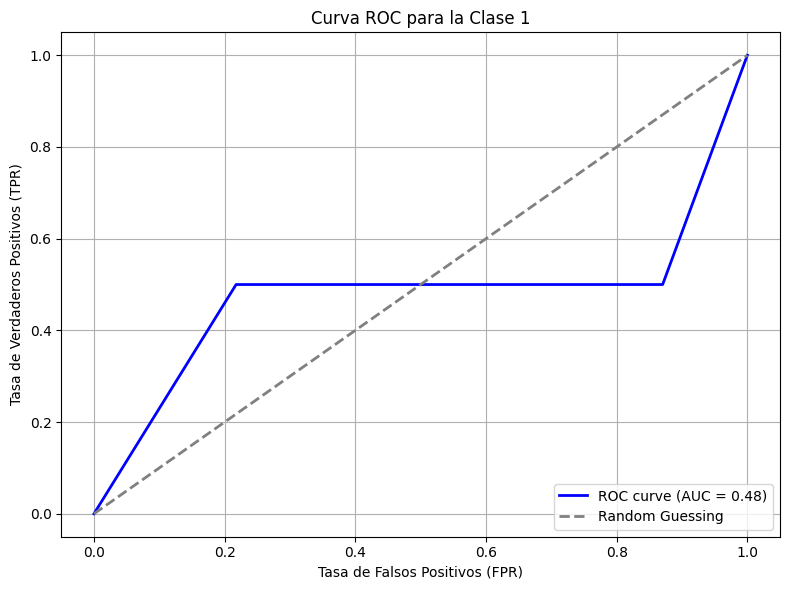

In [4863]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error,
    roc_curve, auc, roc_auc_score
)
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Configurar los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Paso 2: Regresión con RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
grid_search_reg = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='r2', n_jobs=-1, error_score='raise')
grid_search_reg.fit(X_train, y_train)

print("Best Parameters for Regression:", grid_search_reg.best_params_)

# Evaluación del modelo de regresión
best_regressor = grid_search_reg.best_estimator_
y_pred_reg = best_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)

print(f"MSE (Regresión): {mse:.4f}")
print(f"R² (Regresión): {r2:.4f}")
print(f"MAE (Regresión): {mae:.4f}")

# Paso 3: Clasificación con RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_clf = GridSearchCV(rf_classifier, param_grid, cv=2, scoring='roc_auc_ovr', n_jobs=-1, error_score='raise')
grid_search_clf.fit(X_train, y_train)

print("Best Parameters for Classification:", grid_search_clf.best_params_)

# Evaluación del modelo de clasificación
best_classifier = grid_search_clf.best_estimator_

# Paso 4: ROC y AUC para una clase general
# Define una clase general (por ejemplo, clase 1)
class_general = 1  # Cambia esto según la clase de interés
y_test_binary = (y_test == class_general).astype(int)  # Convertir etiquetas a binario
y_proba = best_classifier.predict_proba(X_test)[:, best_classifier.classes_ == class_general].flatten()

# Calcular ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC (Clase {class_general}): {roc_auc:.2f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2, label='Random Guessing')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title(f'Curva ROC para la Clase {class_general}')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

### EVALUACIÓN CRUZADA

In [4864]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocesar datos
categorical_columns = X.select_dtypes(include=["object"]).columns
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns)],
    remainder="passthrough"
)
X_processed = preprocessor.fit_transform(X)

# Validación cruzada
rf_classifier = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_classifier, X_processed, y, cv=cv, scoring="accuracy")

print("Media de accuracy:", scores.mean())
print("Desviación estándar:", scores.std())
print("Scores individuales:", scores)


C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Media de accuracy: 0.4292309643597007
Desviación estándar: 0.021864885077896058
Scores individuales: [0.46330275 0.4266055  0.39449541 0.42857143 0.43317972]


### Modelo No Supervisado 1: KMeans

C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Daniel Bolaños\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


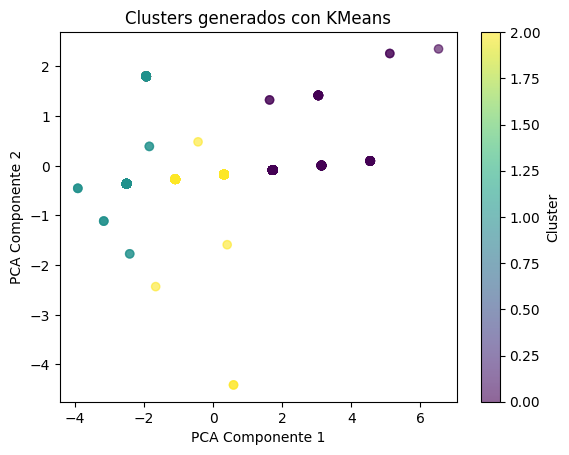

In [4865]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Clustering con KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualización de clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.6)
plt.title("Clusters generados con KMeans")
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.colorbar(label="Cluster")
plt.show()


### Modelo No Supervisado 2: DBSCAN

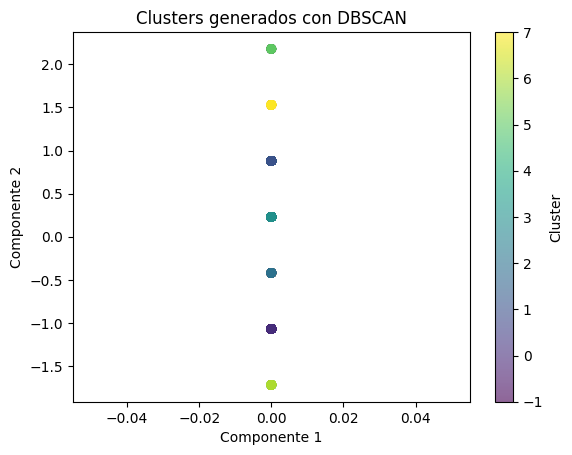

In [4866]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# Clustering con DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Visualización de clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="viridis", alpha=0.6)
plt.title("Clusters generados con DBSCAN")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="Cluster")
plt.show()


### TARGET BINARIO

In [4867]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Crear un target binario basado en un criterio
y_binary = (df["impact_indicator_value"] > 1).astype(int)  # Ejemplo: impacto mayor a 1

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_binary, test_size=0.2, random_state=42)

# Modelo
rf_binary = RandomForestClassifier(random_state=42)
rf_binary.fit(X_train, y_train)

print("Score en test:", rf_binary.score(X_test, y_test))


Score en test: 0.7706422018348624


# Bloque 6: Visualización de resultados
1. Graficamos las predicciones del modelo frente a los valores reales para evaluar visualmente el desempeño.
2. Mostramos la importancia de las características según el modelo entrenado.
3. Graficamos los residuos (diferencia entre predicciones y valores reales) para identificar patrones en los errores.


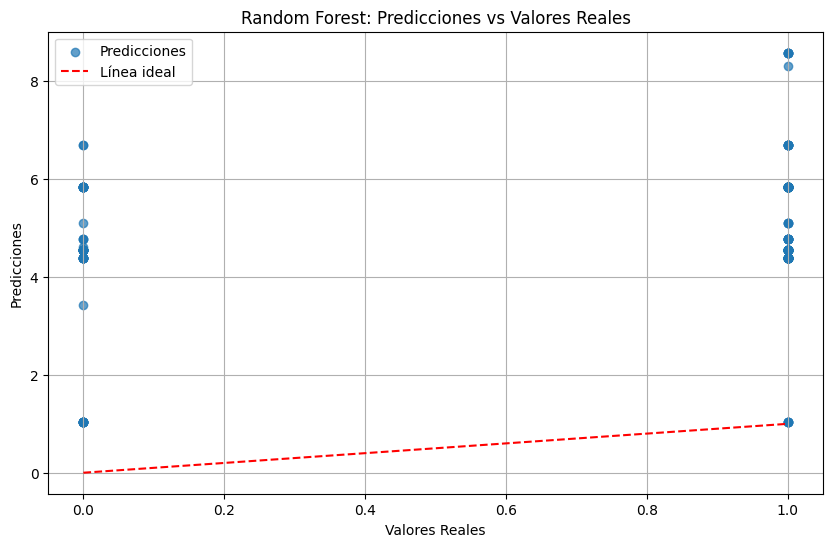

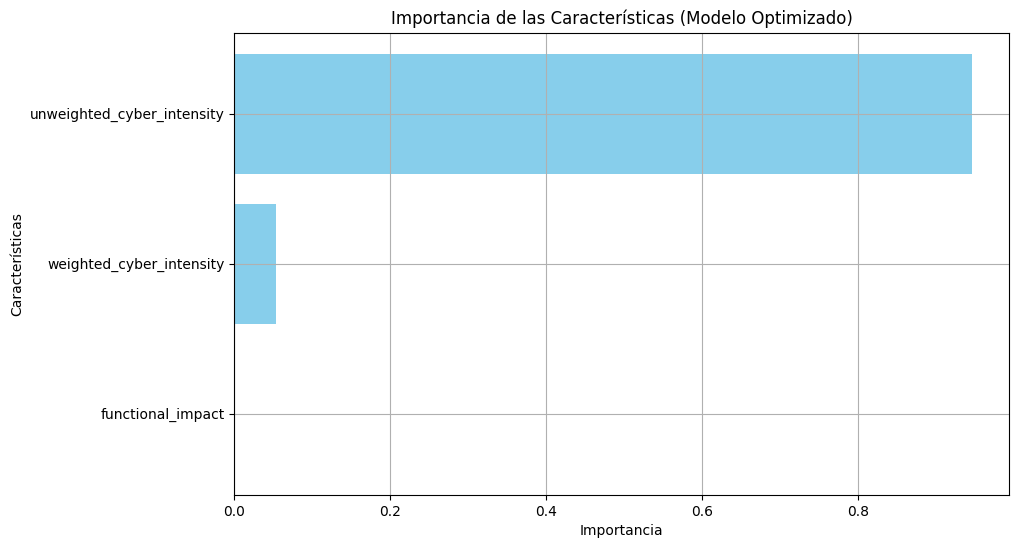

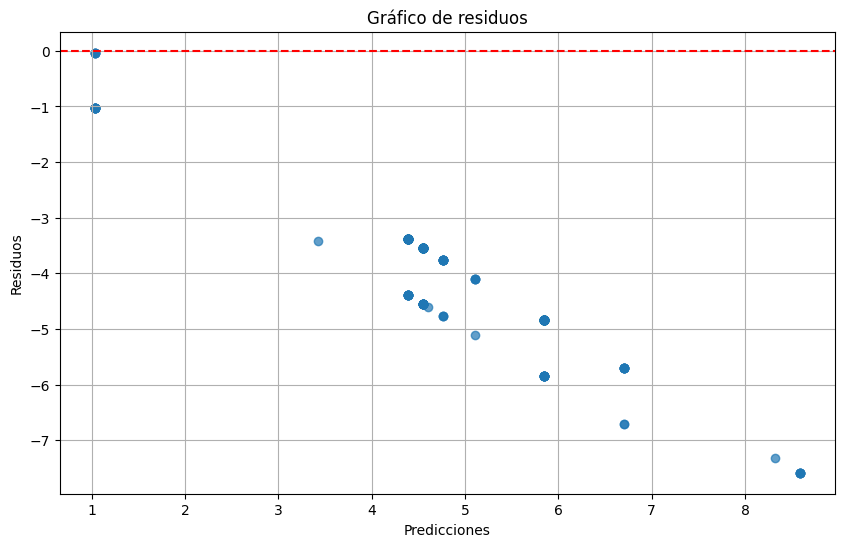

In [4868]:
# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea ideal')
plt.title('Random Forest: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid()
plt.show()

# Importancia de características
importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_columns, importances, color='skyblue')
plt.title('Importancia de las Características (Modelo Optimizado)')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

# Gráfico de residuos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid()
plt.show()


# Bloque 7: Análisis
1. Generar un boxplot para analizar la dispersión y detectar posibles outliers en una de las variables numéricas.
2. Crear un gráfico de frecuencias para visualizar la distribución de las categorías de incidentes.
3. Usar un histograma para observar la distribución de una característica numérica clave.


La columna 'start_date' no está disponible en el dataset.


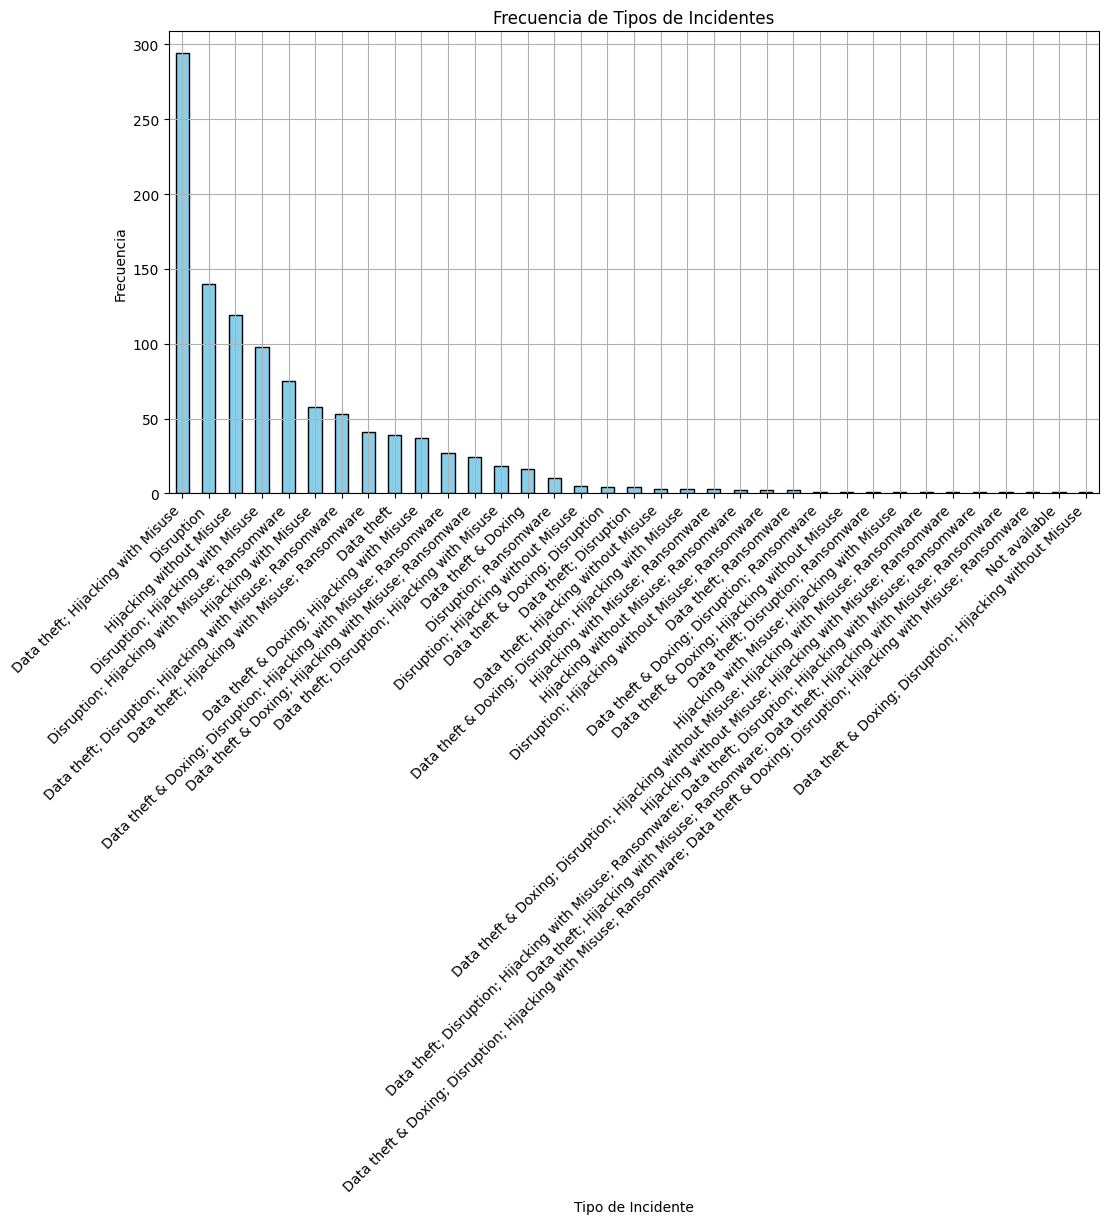

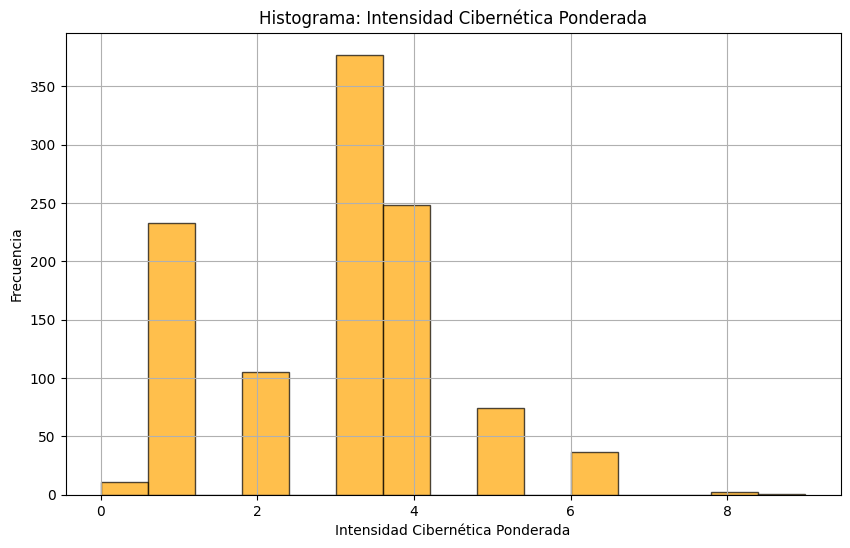

In [4869]:
# Verificar si existe la columna 'start_date' y convertir a datetime si es necesario
if 'start_date' in data_cleaned.columns:
    data_cleaned['start_date'] = pd.to_datetime(data_cleaned['start_date'], errors='coerce')
    data_cleaned['year'] = data_cleaned['start_date'].dt.year  # Extraer el año

    # Contar la frecuencia de ataques por año
    attacks_per_year = data_cleaned['year'].value_counts().sort_index()

    # Graficar la frecuencia de ataques por año
    plt.figure(figsize=(12, 6))
    attacks_per_year.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title('Frecuencia de Ataques por Año')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de Ataques')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("La columna 'start_date' no está disponible en el dataset.")


# Gráfico de frecuencias para los tipos de incidentes
incident_counts = data_cleaned['incident_type'].value_counts()
plt.figure(figsize=(12, 6))
incident_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de Tipos de Incidentes')
plt.xlabel('Tipo de Incidente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

# Histograma para la variable 'weighted_cyber_intensity'
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['weighted_cyber_intensity'].dropna(), bins=15, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histograma: Intensidad Cibernética Ponderada')
plt.xlabel('Intensidad Cibernética Ponderada')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


# Bloque 8: Representación gráfica de métricas de evaluación
1. Crear un gráfico de barras para comparar las métricas MSE, R² y MAE obtenidas durante la evaluación del modelo.
2. Visualizar gráficamente las métricas ayuda a entender mejor el rendimiento del modelo.


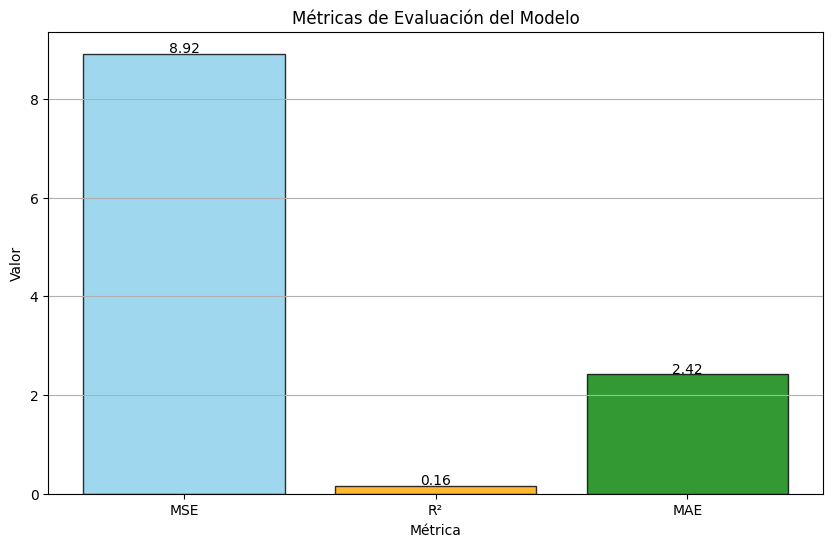

In [4870]:
# Métricas de evaluación
metrics = {'MSE': mse, 'R²': r2, 'MAE': mae}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Gráfico de barras para las métricas
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['skyblue', 'orange', 'green'], edgecolor='black', alpha=0.8)
plt.title('Métricas de Evaluación del Modelo')
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.grid(axis='y')
for i, value in enumerate(metric_values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)
plt.show()


# OTROS GRAFICOS

### Interpretación del Heatmap: Ciberataques por Región y Mes

#### **1. Puntos clave del gráfico:**
- **Regiones principales:**
  - **Desconocido:** Tiene el mayor número de ciberataques en general, especialmente en enero (145 casos). Esto podría sugerir una falta de categorización precisa o que los ataques no se atribuyen a una región específica.
  - **Europa:** Los ciberataques son constantes a lo largo del año, con picos menores en enero (69) y un descenso notable en julio (6).
  - **Asia:** Tiene un nivel de ciberataques más estable, con valores relativamente altos en enero (75), marzo (19), y diciembre (19).
  - **África:** Es la región menos impactada según el registro, con ciberataques esporádicos y un máximo de 4 en enero y febrero.

- **Meses con más ciberataques:**
  - **Enero:** Es el mes con más ciberataques en todas las regiones, lo que podría deberse a tendencias estacionales o vulnerabilidades tecnológicas después de períodos festivos.
  - **Febrero y diciembre:** También muestran picos, aunque menores, lo que puede estar relacionado con actividades específicas (campañas dirigidas o ataques a infraestructuras críticas).

#### **2. Implicaciones prácticas:**
- **Enero como mes crítico:**
  - Las organizaciones deben reforzar medidas de seguridad a inicios del año.
  - Planificar simulacros de ataque y auditorías de sistemas en diciembre para prevenir incidentes en enero.

- **Mayor atención a regiones específicas:**
  - **Europa y Asia** presentan patrones constantes, lo que sugiere que las empresas en estas regiones deberían implementar controles continuos a lo largo del año.
  - La categoría **Desconocido** necesita una revisión: Es posible que los datos no estén categorizados correctamente o que los ataques transfronterizos sean difíciles de atribuir.

- **Bajos ataques en África:**
  - Esto puede reflejar una menor digitalización, un menor número de incidentes reportados, o un sesgo en los datos recopilados.

#### **3. Estrategias basadas en el gráfico:**
- **Fortalecer la vigilancia y prevención en los meses clave (enero, febrero, diciembre).**
- **Mejorar la atribución de ataques:** Investigar y categorizar mejor los ciberataques actualmente en "Desconocido".
- **Fomentar reportes en regiones menos representadas (África):** Esto podría ayudar a entender mejor los riesgos en esas áreas y no subestimarlos.

---
Este análisis resalta la importancia de los patrones temporales y regionales en los ciberataques para tomar decisiones estratégicas de prevención y mitigación.


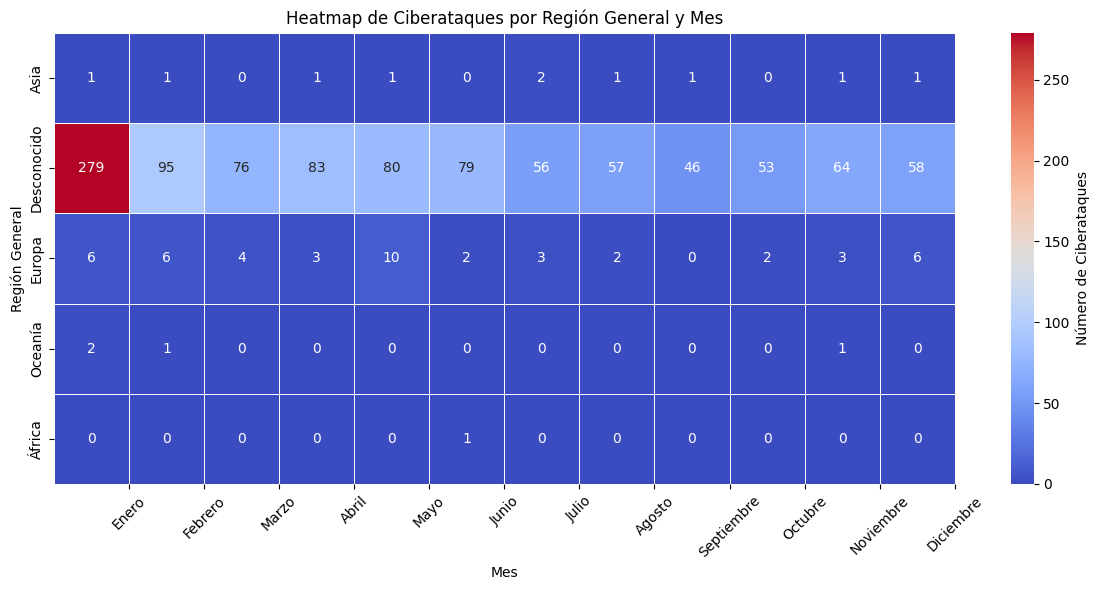

In [4871]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario para mapear continentes a nombres en español (si necesario)
continent_mapping = {
    "africa": "África",
    "asia": "Asia",
    "europe": "Europa",
    "north_america": "América del Norte",
    "oceania": "Oceanía",
    "south_america": "América del Sur",
    "unknown": "Desconocido"
}

# Asegúrate de usar el dataframe limpio y eliminar columnas duplicadas
data_cleaned = df.loc[:, ~df.columns.duplicated()].copy()

# Paso 1: Crear la columna 'region_general' basada en la columna 'continent'
if 'continent' in data_cleaned.columns:
    data_cleaned['region_general'] = data_cleaned['continent'].str.lower().map(continent_mapping).fillna("Desconocido")
else:
    print("La columna 'continent' no está disponible. Se asignará 'Desconocido' a toda la columna 'region_general'.")
    data_cleaned['region_general'] = "Desconocido"

# Paso 2: Convertir 'start_year', 'start_month' y 'start_day' en una columna de fecha
if {'start_year', 'start_month', 'start_day'}.issubset(data_cleaned.columns):
    data_cleaned['start_date'] = pd.to_datetime(
        data_cleaned[['start_year', 'start_month', 'start_day']].astype(str).agg('-'.join, axis=1),
        errors='coerce'
    )
else:
    print("Faltan columnas necesarias para crear 'start_date'.")
    data_cleaned['start_date'] = pd.NaT

# Paso 3: Crear la columna 'month' a partir de la fecha
data_cleaned['month'] = data_cleaned['start_date'].dt.month

# Paso 4: Contar los ciberataques por región general y mes
region_month_counts = data_cleaned.groupby(['region_general', 'month']).size().unstack(fill_value=0)

# Paso 5: Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    region_month_counts,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    linewidths=.5,
    cbar_kws={'label': 'Número de Ciberataques'}
)
plt.title('Heatmap de Ciberataques por Región General y Mes')
plt.xlabel('Mes')
plt.ylabel('Región General')
plt.xticks(
    ticks=range(1, 13),
    labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    rotation=45
)
plt.tight_layout()
plt.show()


In [4872]:
# Contar ataques por país
if 'receiver_country' in data_cleaned.columns:
    country_counts = data_cleaned['receiver_country'].value_counts().head(10)  # Top 10 países

    # Gráfico de barras para países más afectados
    plt.figure(figsize=(12, 6))
    country_counts.plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title('Top 10 Países Más Afectados por Ciberataques')
    plt.xlabel('País')
    plt.ylabel('Cantidad de Ataques')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("La columna 'receiver_country' no está disponible en el dataset.")


La columna 'receiver_country' no está disponible en el dataset.


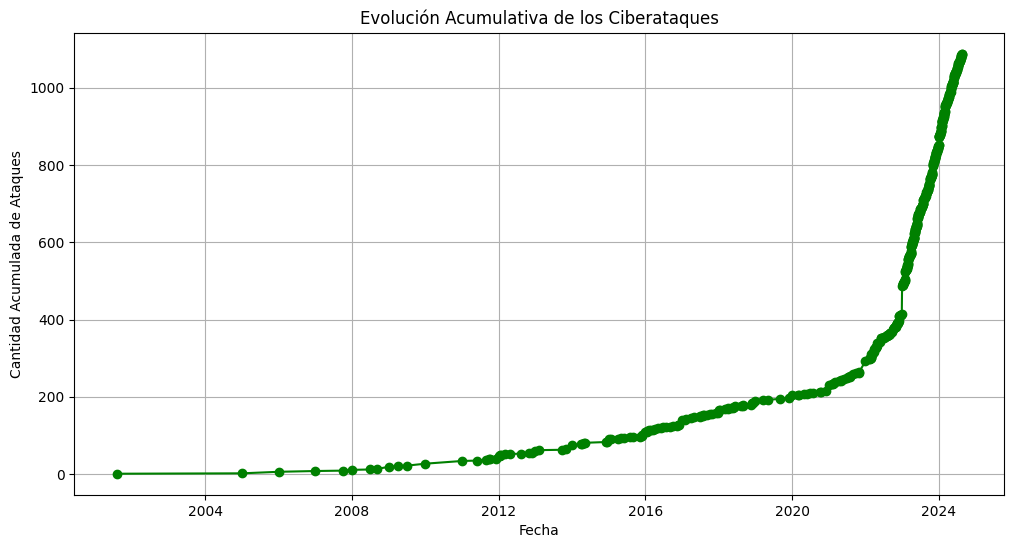

In [4873]:
if 'start_date' in data_cleaned.columns:
    attacks_timeline = data_cleaned['start_date'].dropna().value_counts().sort_index()
    cumulative_attacks = attacks_timeline.cumsum()

    # Gráfico de línea acumulativa
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_attacks.index, cumulative_attacks, marker='o', linestyle='-', color='green')
    plt.title('Evolución Acumulativa de los Ciberataques')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad Acumulada de Ataques')
    plt.grid()
    plt.show()
else:
    print("La columna 'start_date' no está disponible en el dataset.")


C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\2895688253.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


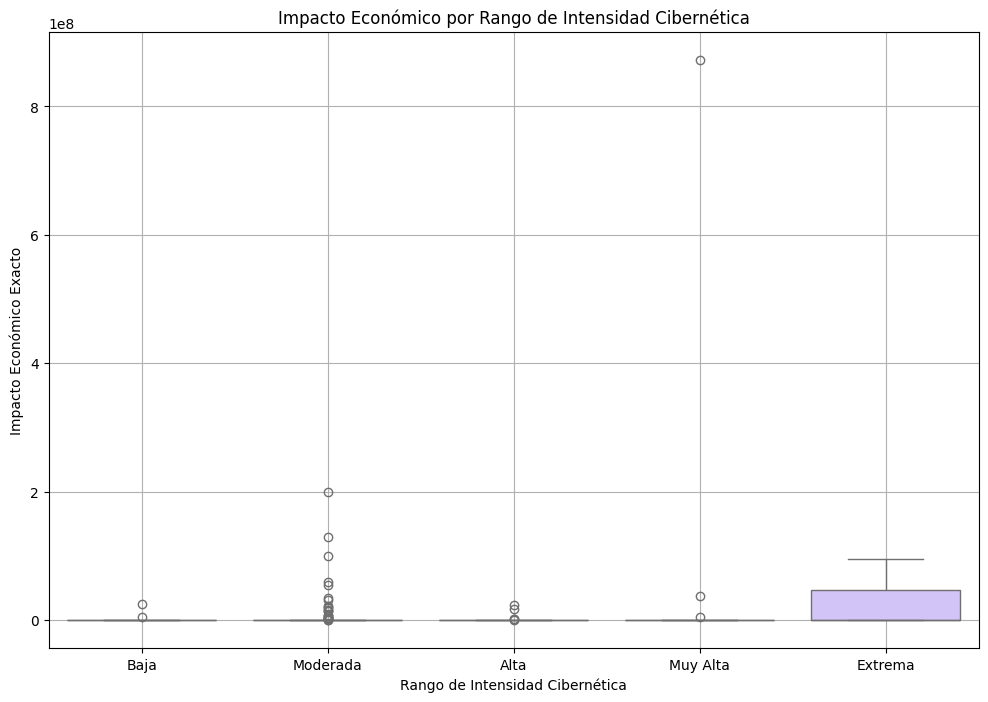

In [4874]:
if 'economic_impact_exact_value' in data_cleaned.columns and 'weighted_cyber_intensity' in data_cleaned.columns:
    # Crear rangos para la intensidad cibernética
    data_cleaned['intensity_bins'] = pd.cut(
        data_cleaned['weighted_cyber_intensity'], bins=5, labels=['Baja', 'Moderada', 'Alta', 'Muy Alta', 'Extrema']
    )
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(
        x='intensity_bins', 
        y='economic_impact_exact_value', 
        data=data_cleaned, 
        palette='pastel'
    )
    plt.title('Impacto Económico por Rango de Intensidad Cibernética')
    plt.xlabel('Rango de Intensidad Cibernética')
    plt.ylabel('Impacto Económico Exacto')
    plt.grid()
    plt.show()
else:
    print("Las columnas necesarias no están disponibles en el dataset.")


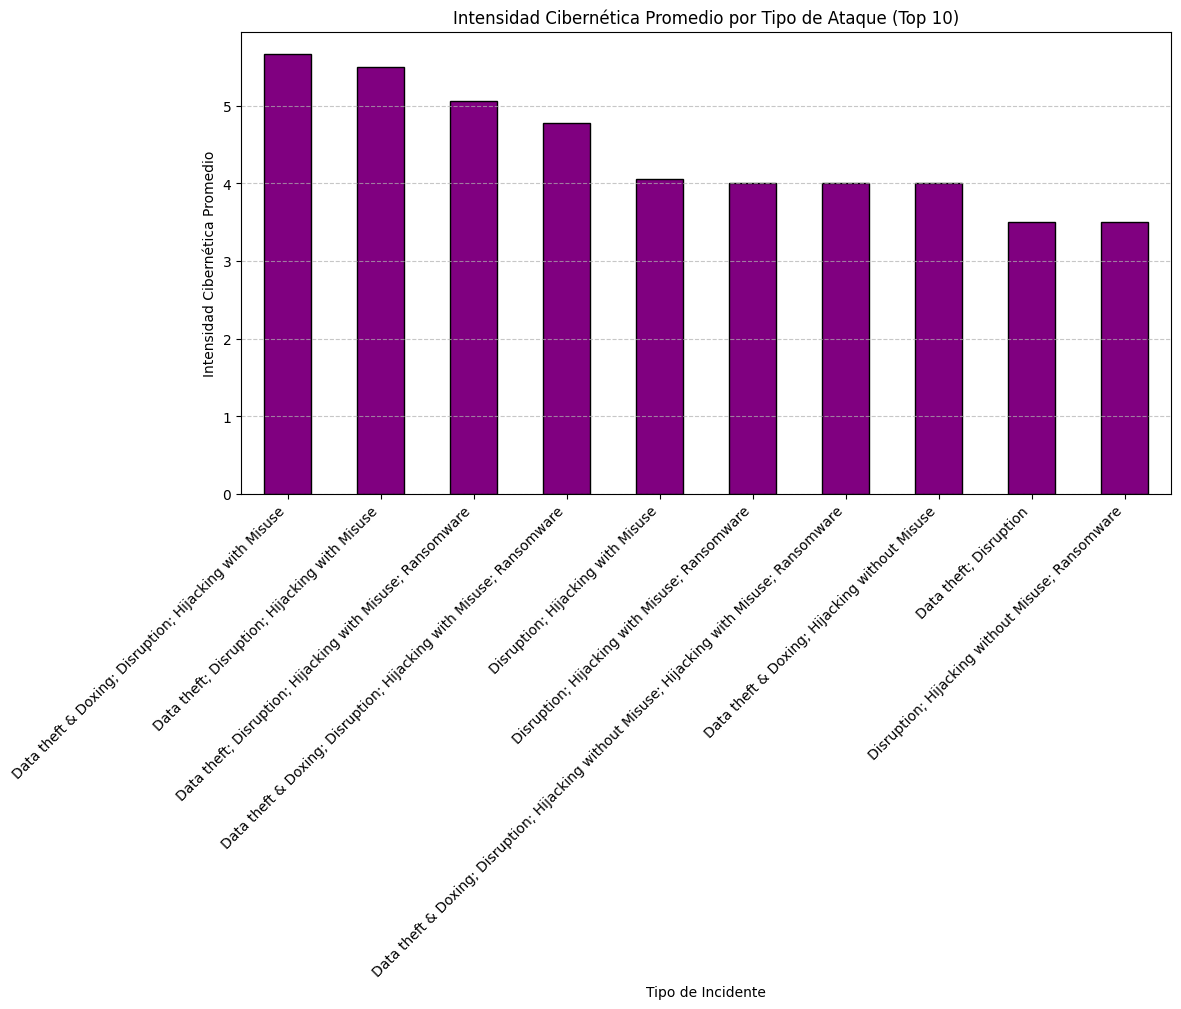

In [4875]:
if 'incident_type' in data_cleaned.columns and 'weighted_cyber_intensity' in data_cleaned.columns:
    avg_intensity_by_type = data_cleaned.groupby('incident_type')['weighted_cyber_intensity'].mean().sort_values(ascending=False).head(10)

    # Gráfico de barras para intensidad promedio por tipo de ataque
    plt.figure(figsize=(12, 6))
    avg_intensity_by_type.plot(kind='bar', color='purple', edgecolor='black')
    plt.title('Intensidad Cibernética Promedio por Tipo de Ataque (Top 10)')
    plt.xlabel('Tipo de Incidente')
    plt.ylabel('Intensidad Cibernética Promedio')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Las columnas necesarias no están disponibles en el dataset.")


## Frecuencia de Ciberataques por Mes y Año

Este bloque genera gráficos de barras para mostrar la frecuencia de ciberataques por mes, separando los datos por los años: 2020, 2021, 2022, 2023 y 2024. 

### Pasos Clave:
1. **Conversión de la columna 'start_date'**:
   - Se verifica que la columna `start_date` esté en formato `datetime`. Si no, se convierte utilizando `pd.to_datetime`.

2. **Filtrado por años específicos**:
   - Se seleccionan los ciberataques ocurridos en los años 2020, 2021, 2022, 2023 y 2024 mediante la extracción del año de la columna `start_date`.

3. **Cálculo de ciberataques por mes**:
   - Para cada año, se crea una nueva columna `month` que extrae el mes de la fecha de inicio del ciberataque.
   - Se cuentan los ciberataques por mes utilizando `value_counts()` y se ordenan los resultados.

4. **Generación de gráficos de barras**:
   - Cada gráfico representa un año y muestra los meses en el eje X y la cantidad de ciberataques en el eje Y.
   - Se estilizan los gráficos con colores, etiquetas descriptivas y cuadrículas para facilitar la lectura.

### Uso del Gráfico:
- Este análisis ayuda a identificar patrones estacionales en los ciberataques.
- Podrás ver en qué meses se producen más incidentes para planificar medidas de **prevención y respuesta**.

### Notas:
- Si no hay datos para un año específico, se imprime un mensaje indicando que no se encontraron ciberataques.


C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\557823992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['start_date'].dt.month


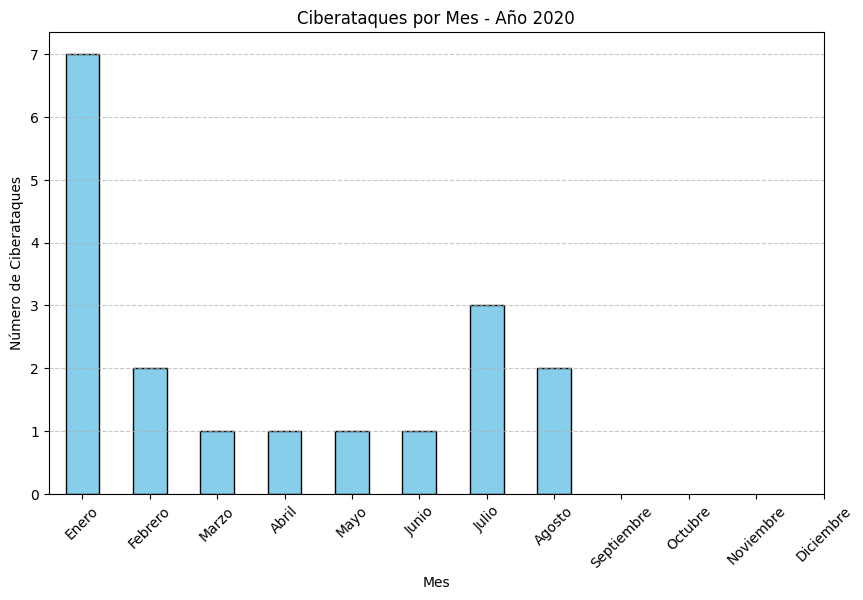

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\557823992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['start_date'].dt.month


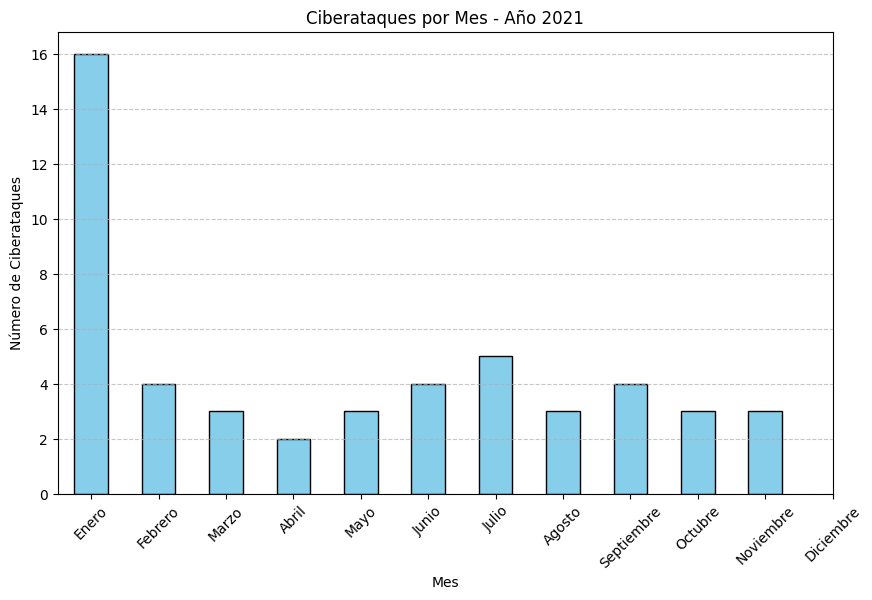

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\557823992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['start_date'].dt.month


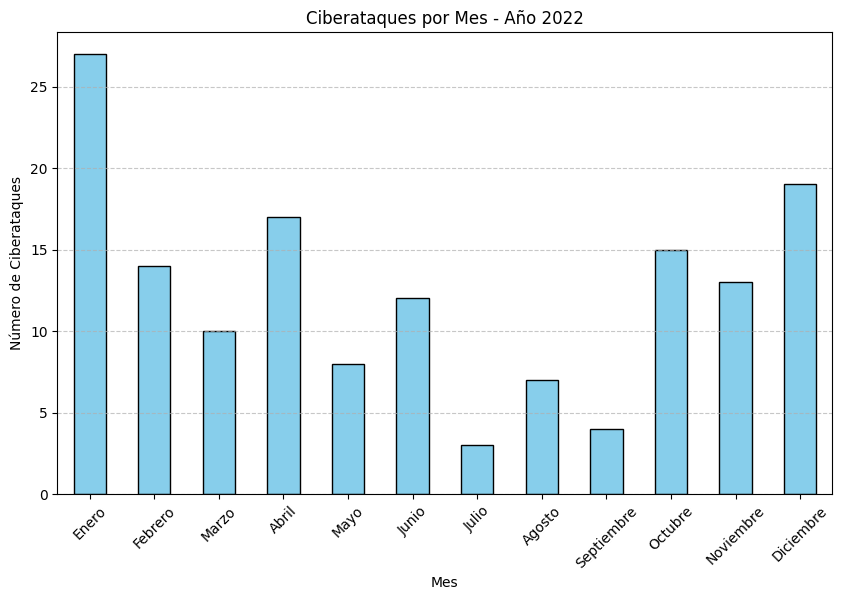

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\557823992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['start_date'].dt.month


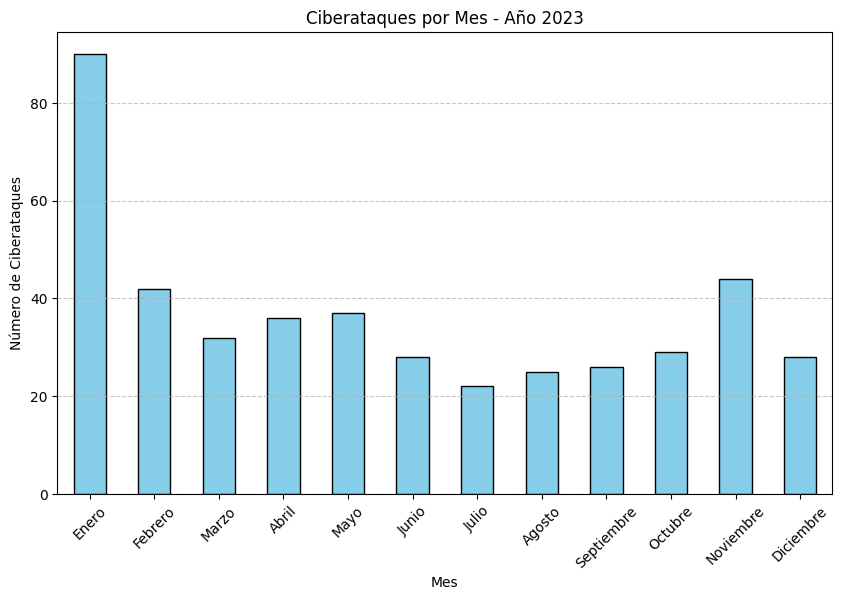

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\557823992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month'] = data_filtered['start_date'].dt.month


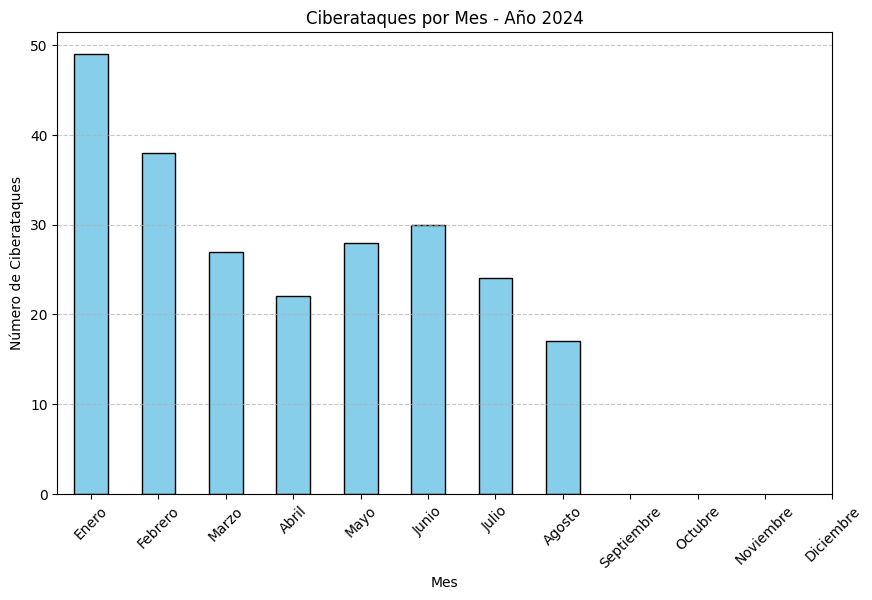

In [4876]:
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'start_date' sea de tipo datetime
if not pd.api.types.is_datetime64_any_dtype(data_cleaned['start_date']):
    data_cleaned['start_date'] = pd.to_datetime(data_cleaned['start_date'], errors='coerce')

# Filtrar los datos por año
years_to_plot = [2020, 2021, 2022, 2023, 2024]

# Iterar sobre los años y generar un gráfico por cada uno
for year in years_to_plot:
    # Filtrar los ciberataques para el año actual
    data_filtered = data_cleaned[data_cleaned['start_date'].dt.year == year]
    
    if not data_filtered.empty:  # Verificar si hay datos para el año actual
        # Contar los ciberataques por mes
        data_filtered['month'] = data_filtered['start_date'].dt.month
        monthly_counts = data_filtered['month'].value_counts().sort_index()

        # Crear el gráfico
        plt.figure(figsize=(10, 6))
        monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Ciberataques por Mes - Año {year}')
        plt.xlabel('Mes')
        plt.ylabel('Número de Ciberataques')
        plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print(f"No se encontraron ciberataques para el año {year}.")


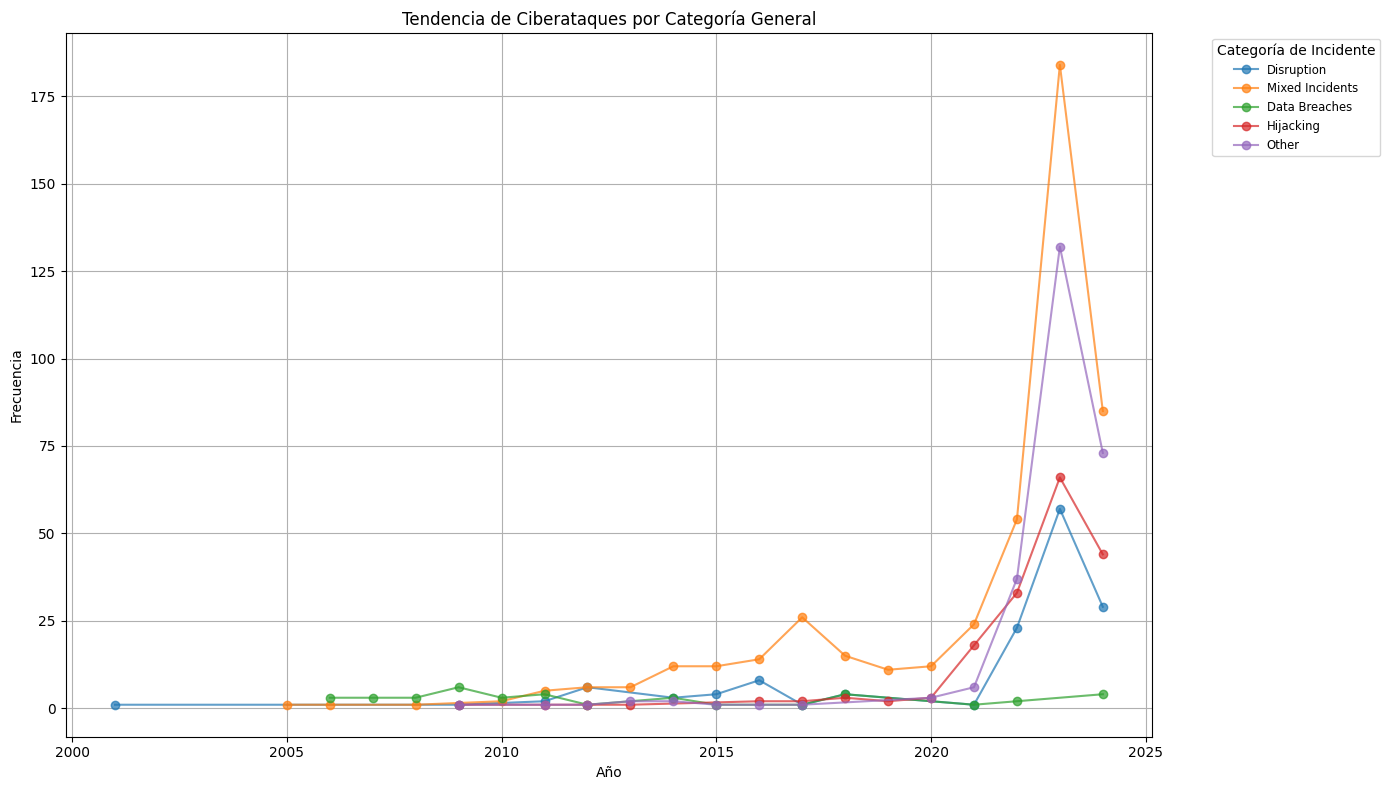

In [4877]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un mapeo manual para agrupar tipos de incidentes
incident_mapping = {
    'Data theft': 'Data Breaches',
    'Disruption': 'Disruption',
    'Hijacking with Misuse': 'Hijacking',
    'Hijacking without Misuse': 'Hijacking',
    'Disruption; Hijacking with Misuse': 'Mixed Incidents',
    'Disruption; Hijacking with Misuse; Ransomware': 'Mixed Incidents',
    'Data theft; Disruption': 'Mixed Incidents',
    'Data theft; Hijacking with Misuse': 'Mixed Incidents',
    'Unknown': 'Unknown'
}

# Asegurarte de que 'start_date' existe y tiene un formato válido
if 'start_date' not in data_cleaned.columns:
    print("La columna 'start_date' no existe. Por favor, verifica tu dataset.")
else:
    # Crear la columna 'start_date_year' si no existe
    data_cleaned['start_date_year'] = data_cleaned['start_date'].dt.year

# Aplicar el mapeo a la columna 'incident_type'
if 'incident_type' in data_cleaned.columns:
    data_cleaned['incident_category'] = data_cleaned['incident_type'].map(incident_mapping).fillna('Other')
else:
    print("La columna 'incident_type' no existe en el dataset.")

# Agrupar los datos por año y categoría de incidente
if {'start_date_year', 'incident_category'}.issubset(data_cleaned.columns):
    data_grouped = data_cleaned.groupby(['start_date_year', 'incident_category']).size().reset_index(name='incident_count')

    # Gráfico de tendencias para las categorías generales
    plt.figure(figsize=(14, 8))

    # Graficar cada categoría
    for category in data_grouped['incident_category'].unique():
        yearly_data = data_grouped[data_grouped['incident_category'] == category]
        plt.plot(yearly_data['start_date_year'], yearly_data['incident_count'], label=category, alpha=0.7, marker='o')

    plt.title('Tendencia de Ciberataques por Categoría General')
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.legend(title='Categoría de Incidente', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("Faltan columnas necesarias para agrupar los datos.")


Valores únicos después del mapeo:
['Disruption' 'Theft + Hijacking Misuse' 'Data theft'
 'Data theft; Disruption; Hijacking with Misuse'
 'Hijacking without Misuse' 'Disruption; Hijacking without Misuse'
 'Data theft; Hijacking without Misuse'
 'Disruption; Hijacking with Misuse' 'Data theft & Doxing'
 'Theft + Doxing + Disruption'
 'Data theft & Doxing; Hijacking with Misuse' 'Hijacking with Misuse'
 'Data theft; Disruption' 'Disruption; Ransomware'
 'Data theft & Doxing; Disruption; Ransomware'
 'Disruption; Hijacking with Misuse; Ransomware'
 'Data theft; Disruption; Hijacking with Misuse; Ransomware'
 'Data theft; Hijacking with Misuse; Ransomware'
 'Data theft & Doxing; Hijacking without Misuse'
 'Data theft; Disruption; Ransomware'
 'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware'
 'Data theft & Doxing; Disruption; Hijacking without Misuse; Hijacking with Misuse; Ransomware'
 'Hijacking without Misuse; Ransomware'
 'Data theft & Doxing; Hijacking with Misuse; 

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\4148889519.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(pareto_data.index, rotation=45, ha='right', fontsize=10)
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_14344\4148889519.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


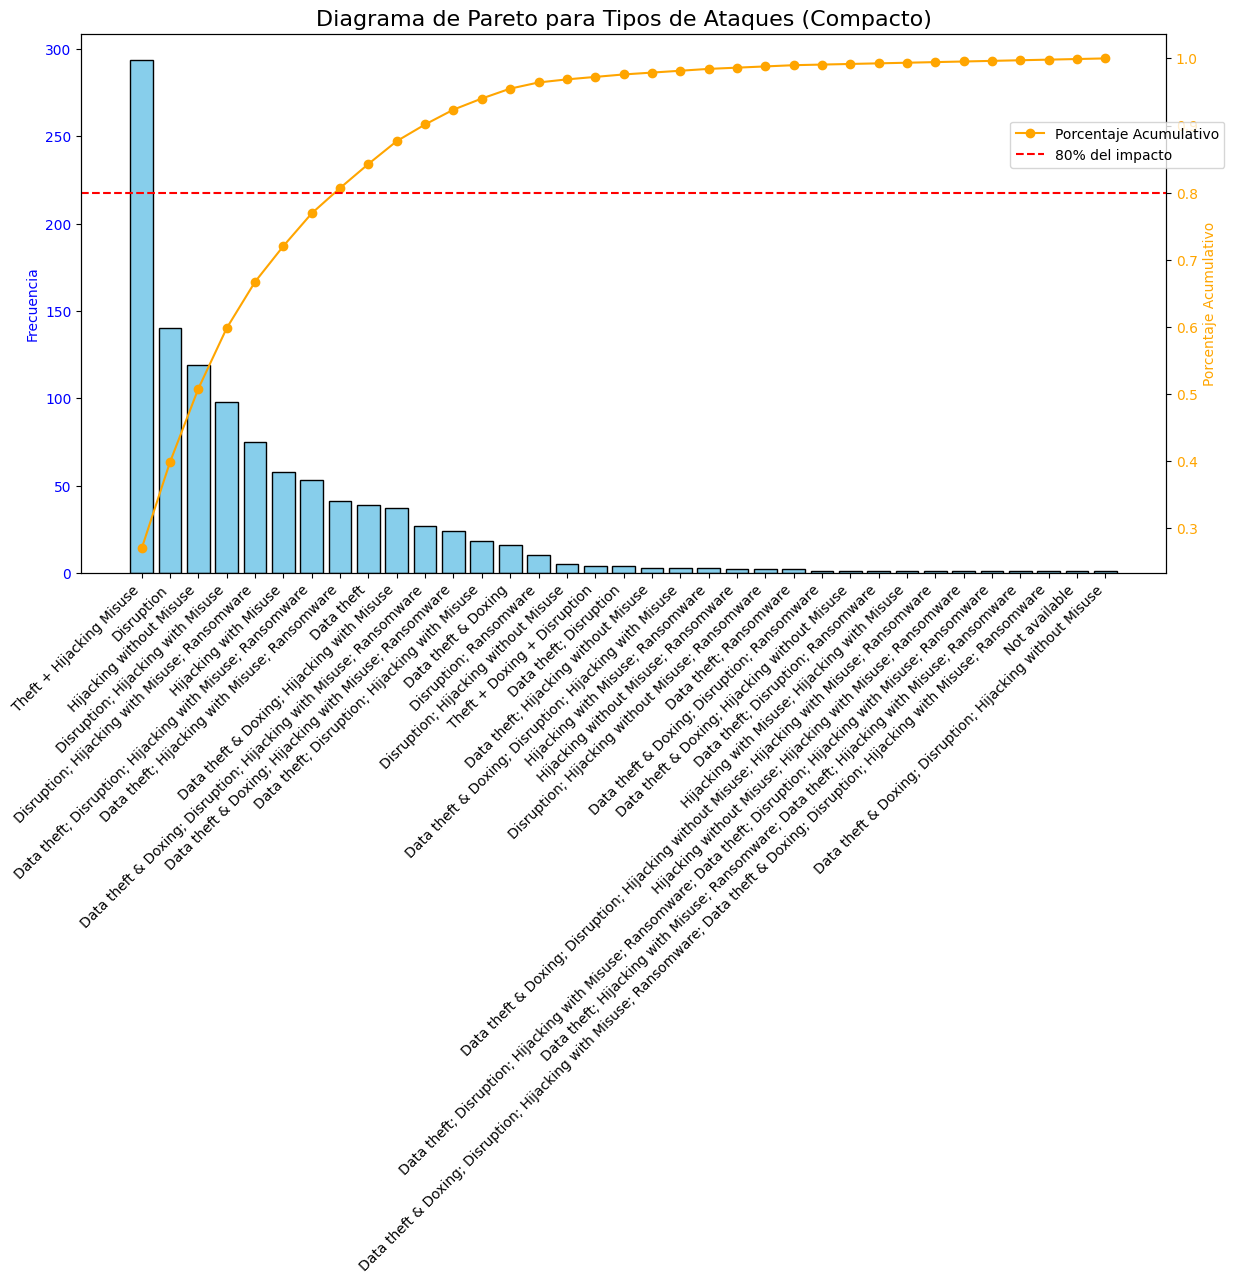

In [4878]:
# Compactar los nombres largos nuevamente
compact_mapping = {
    'Data theft; Hijacking with Misuse': 'Theft + Hijacking Misuse',
    'Data theft & Doxing; Disruption': 'Theft + Doxing + Disruption',
    # Añadir más mapeos según sea necesario
}

# Aplicar el mapeo para acortar los nombres
data_cleaned['incident_type'] = data_cleaned['incident_type'].replace(compact_mapping)

# Verificar valores únicos después del mapeo
print("Valores únicos después del mapeo:")
print(data_cleaned['incident_type'].unique())

# Volver a generar el gráfico de Pareto
pareto_data = data_cleaned['incident_type'].value_counts()
pareto_percentage = pareto_data.cumsum() / pareto_data.sum()

fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de barras
ax1.bar(pareto_data.index, pareto_data, color='skyblue', edgecolor='black')
ax1.set_ylabel('Frecuencia', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Diagrama de Pareto para Tipos de Ataques (Compacto)', fontsize=16)

# Gráfico de línea para el porcentaje acumulativo
ax2 = ax1.twinx()
ax2.plot(pareto_data.index, pareto_percentage, color='orange', marker='o', linestyle='-', label='Porcentaje Acumulativo')
ax2.axhline(y=0.8, color='red', linestyle='--', label='80% del impacto')
ax2.set_ylabel('Porcentaje Acumulativo', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Configuración de leyendas y etiquetas
ax1.set_xticklabels(pareto_data.index, rotation=45, ha='right', fontsize=10)
ax2.legend(loc='upper left', bbox_to_anchor=(0.85, 0.85))

plt.tight_layout()
plt.show()


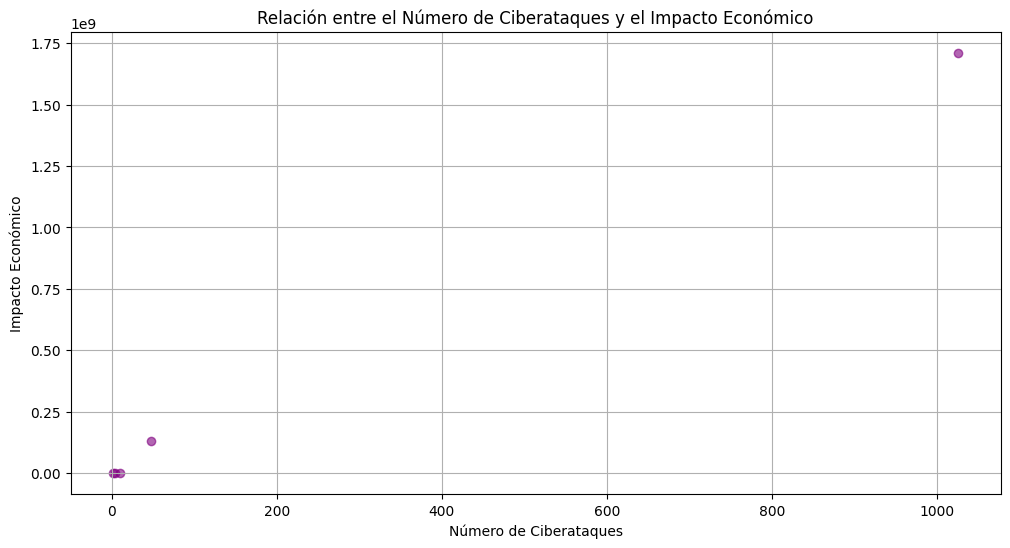

In [4879]:
# Verificar si existen columnas alternativas para agrupar por región
if 'region_general' in data_cleaned.columns and 'economic_impact_exact_value' in data_cleaned.columns:
    attack_counts_per_region = data_cleaned.groupby('region_general').size()
    economic_impact_per_region = data_cleaned.groupby('region_general')['economic_impact_exact_value'].sum()

    # Graficar la relación
    plt.figure(figsize=(12, 6))
    plt.scatter(attack_counts_per_region, economic_impact_per_region, color='purple', alpha=0.6)
    plt.title('Relación entre el Número de Ciberataques y el Impacto Económico')
    plt.xlabel('Número de Ciberataques')
    plt.ylabel('Impacto Económico')
    plt.grid()
    plt.show()
else:
    print("Las columnas 'region_general' o 'economic_impact_exact_value' no están disponibles.")


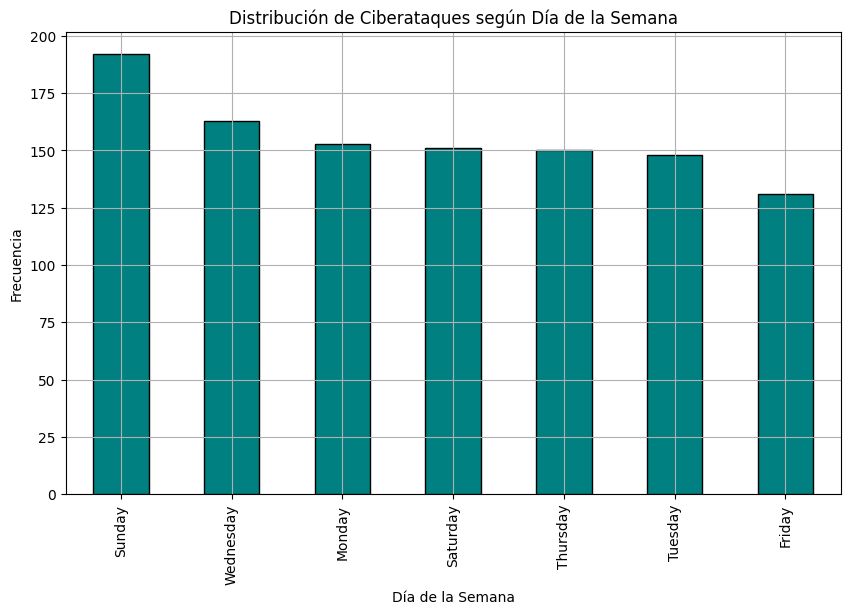

In [4880]:
data_cleaned['day_of_week'] = data_cleaned['start_date'].dt.day_name()

day_counts = data_cleaned['day_of_week'].value_counts()
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Distribución de Ciberataques según Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


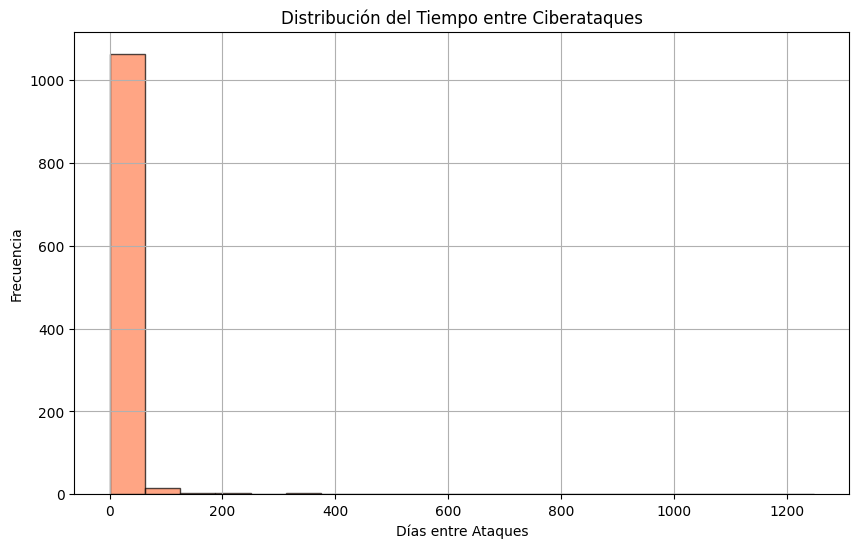

In [4881]:
data_cleaned = data_cleaned.sort_values('start_date')
data_cleaned['time_between_attacks'] = data_cleaned['start_date'].diff().dt.days

plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['time_between_attacks'].dropna(), bins=20, color='coral', edgecolor='black', alpha=0.7)
plt.title('Distribución del Tiempo entre Ciberataques')
plt.xlabel('Días entre Ataques')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


In [4882]:
# Guardar el dataset limpio en un archivo CSV
output_file_path = "./data/EUROREPO_cleaned.csv"
data_cleaned.to_csv(output_file_path, index=False, encoding='utf-8')
print(f"El dataset limpio se ha guardado en: {output_file_path}")


El dataset limpio se ha guardado en: ./data/EUROREPO_cleaned.csv
